<h5>Ece Koç - 201805007</h5> 
<h5>Emircan Karagöz - 191805019</h5>

<h1>First Part</h1>

<h3>Import Packages</h3>

In [1]:
import scispacy
import spacy
#Core models
import en_core_sci_sm
import en_core_sci_md
#NER specific models
import en_ner_bc5cdr_md
#Tools for extracting & displaying data
from spacy import displacy
import pandas as pd

<h3>Load Data</h3>

In [2]:
import pandas as pd
mtsample_df=pd.read_csv("mtsamples.csv")

In [3]:
print(mtsample_df.shape)

(4999, 6)


In [4]:
print(mtsample_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None


<h3>Test the models with sample data</h3>

In [5]:
# Pick specific transcription to use (row 3, column "transcription") and test the scispacy NER model
text = mtsample_df.loc[10, "transcription"]

print(text)

PREOPERATIVE DIAGNOSIS: , Morbid obesity. ,POSTOPERATIVE DIAGNOSIS: , Morbid obesity. ,PROCEDURE:,  Laparoscopic Roux-en-Y gastric bypass, antecolic, antegastric with 25-mm EEA anastamosis, esophagogastroduodenoscopy. ,ANESTHESIA: , General with endotracheal intubation. ,INDICATIONS FOR PROCEDURE: , This is a 50-year-old male who has been overweight for many years and has tried multiple different weight loss diets and programs.  The patient has now begun to have comorbidities related to the obesity.  The patient has attended our bariatric seminar and met with our dietician and psychologist.  The patient has read through our comprehensive handout and understands the risks and benefits of bypass surgery as evidenced by the signing of our consent form.,PROCEDURE IN DETAIL: , The risks and benefits were explained to the patient.  Consent was obtained.  The patient was taken to the operating room and placed supine on the operating room table.  General anesthesia was administered with endotr

<h3>Load specific model: en_core_sci_sm and pass 'text' through</h3>

In [6]:
nlp_sm = en_core_sci_sm.load()
doc = nlp_sm(text)
#Display resulting entity extraction
displacy_image = displacy.render(doc, jupyter=True,style='ent')

<h3>Load the specific model: en_core_sci_md and pass 'text' through</h3>

In [7]:
nlp_md = en_core_sci_md.load()
doc = nlp_md(text)
#Display resulting entity extraction
displacy_image = displacy.render(doc, jupyter=True,style='ent')

<h3>Load specific model: import en_ner_bc5cdr_md and pass 'text' through</h3>

In [8]:
nlp_bc = en_ner_bc5cdr_md.load()
doc = nlp_bc(text)
#Display resulting entity extraction
displacy_image = displacy.render(doc, jupyter=True,style='ent')

<h3>Display the entity</h3>

In [9]:
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
Morbid obesity 26 40 DISEASE
Morbid obesity 70 84 DISEASE
weight loss 400 411 DISEASE
Marcaine 1256 1264 CHEMICAL


In [10]:
mtsample_df.dropna(subset=['transcription'], inplace=True) 
mtsample_df_subset = mtsample_df.sample(n=100, random_state=42) 
mtsample_df_subset.info() 
mtsample_df_subset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 3162 to 3581
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   description        100 non-null    object
 2   medical_specialty  100 non-null    object
 3   sample_name        100 non-null    object
 4   transcription      100 non-null    object
 5   keywords           78 non-null     object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


Unnamed: 0                                        description  \
3162        3162   Markedly elevated PT INR despite stopping Cou...   
1981        1981   Intercostal block from fourth to tenth interc...   
1361        1361   The patient is a 65-year-old female who under...   
3008        3008   Construction of right upper arm hemodialysis ...   
4943        4943   Bronchoscopy with brush biopsies.  Persistent...   

                   medical_specialty                          sample_name  \
3162           Hematology - Oncology              Hematology Consult - 1    
1981                 Pain Management               Intercostal block - 1    
1361   SOAP / Chart / Progress Notes                Lobectomy - Followup    
3008                      Nephrology   Hemodialysis Fistula Construction    
4943      Cardiovascular / Pulmonary                    Bronchoscopy - 8    

                                          transcription  \
3162  HISTORY OF PRESENT ILLNESS:,  The patient is w...   
1981  PREPROCEDURE DIAGNOSIS:,  Chest pain secondary...   
1361  HISTORY OF PRESENT ILLNESS: , The patient is a...   
3008  PREOPERATIVE DIAGNOSIS: , End-stage renal dise...   
4943  PREOPERATIVE DIAGNOSIS: , Persistent pneumonia...   

                                               keywords  
3162                                                NaN  
1981  pain management, xylocaine, marcaine, intercos...  
1361  soap / chart / progress notes, non-small cell ...  
3008  nephrology, end-stage renal disease, av dialys...  
4943  cardiovascular / pulmonary, persistent pneumon...

In [11]:
from spacy.matcher import Matcher

In [12]:
pattern = [{'ENT_TYPE':'CHEMICAL'}, {'LIKE_NUM': True}, {'IS_ASCII': True}]
matcher = Matcher(nlp_bc.vocab)
matcher.add("DRUG_DOSE", [pattern])

In [13]:
ner_named_entities = []
ner_category_labels = []

for transcription in mtsample_df_subset['transcription']:
    doc = nlp_bc(transcription)
    matches = matcher(doc)
    for match_id, start, end in matches:
        string_id = nlp_bc.vocab.strings[match_id]  # get string representation
        span = doc[start:end]  # the matched span adding drugs doses
        print(span.text, start, end, string_id,)
        
        ner_named_entities.append(span.text)
        ner_category_labels.append(string_id)
        #Add disease and drugs
        for ent in doc.ents:
            print(ent.text, ent.start_char, ent.end_char, ent.label_)
            ner_named_entities.append(ent.text)
            ner_category_labels.append(ent.label_)

ner_model_df = pd.DataFrame({'ner_named_entity': ner_named_entities, 'ner_category_label': ner_category_labels})

Xylocaine 20 mL 129 132 DRUG_DOSE
Chest pain 26 36 DISEASE
Chest pain 122 132 DISEASE
intercostal block 318 335 DISEASE
chest pain 388 398 DISEASE
Xylocaine 730 739 CHEMICAL
Marcaine 750 758 CHEMICAL
contusion 987 996 DISEASE
respiratory distress 1076 1096 DISEASE
pain 1150 1154 DISEASE
Marcaine 0.25% 133 136 DRUG_DOSE
Chest pain 26 36 DISEASE
Chest pain 122 132 DISEASE
intercostal block 318 335 DISEASE
chest pain 388 398 DISEASE
Xylocaine 730 739 CHEMICAL
Marcaine 750 758 CHEMICAL
contusion 987 996 DISEASE
respiratory distress 1076 1096 DISEASE
pain 1150 1154 DISEASE
Aspirin 81 mg 204 207 DRUG_DOSE
non-small cell lung cancer 114 140 DISEASE
barium 322 328 CHEMICAL
hiatal hernia 373 386 DISEASE
odynophagia 647 658 DISEASE
tenderness 829 839 DISEASE
DVT 918 921 DISEASE
weight loss 952 963 DISEASE
anorexia 965 973 DISEASE
fevers 975 981 DISEASE
chills 983 989 DISEASE
headaches 991 1000 DISEASE
aches 1006 1011 DISEASE
pains 1015 1020 DISEASE
cough 1022 1027 DISEASE
hemoptysis 1029 1039 DI

<h1>Second Part</h1>

<h2>First Phase (First Paragraph)</h2>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE

In [15]:
# A method to get unique words(vocabulary) and sentence count in a list of text

def get_sentence_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences=sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words=word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] +1
                else:
                    vocab[word] =1 
    word_count = len(vocab.keys())
    return sent_count,word_count

In [16]:
clinical_text_df = pd.read_csv("mtsamples.csv")

print(clinical_text_df.columns)
clinical_text_df.head(5)

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

In [17]:
clinical_text_df = clinical_text_df[clinical_text_df['transcription'].notna()]
sent_count,word_count= get_sentence_word_count(clinical_text_df['transcription'].tolist())
print("Number of sentences in transcriptions column: "+ str(sent_count))
print("Number of unique words in transcriptions column: "+str(word_count))


data_categories  = clinical_text_df.groupby(clinical_text_df['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

Number of sentences in transcriptions column: 140235
Number of unique words in transcriptions column: 35805
===========Original Categories =======================
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 371
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 96
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 224
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 155
Cat:26  Office Notes : 50
Cat:27  Ophthalmology : 83
Cat:28  Orthoped

<h3>We removed the transcriptions having category labels less than 50</h3>

In [18]:
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  Discharge Summary : 108
Cat:4  ENT - Otolaryngology : 96
Cat:5  Emergency Room Reports : 75
Cat:6  Gastroenterology : 224
Cat:7  General Medicine : 259
Cat:8  Hematology - Oncology : 90
Cat:9  Nephrology : 81
Cat:10  Neurology : 223
Cat:11  Neurosurgery : 94
Cat:12  Obstetrics / Gynecology : 155
Cat:13  Ophthalmology : 83
Cat:14  Orthopedic : 355
Cat:15  Pain Management : 61
Cat:16  Pediatrics - Neonatal : 70
Cat:17  Psychiatry / Psychology : 53
Cat:18  Radiology : 273
Cat:19  SOAP / Chart / Progress Notes : 166
Cat:20  Surgery : 1088
Cat:21  Urology : 156
============ Reduced Categories ======================


<h3>Plot the categories</h3>

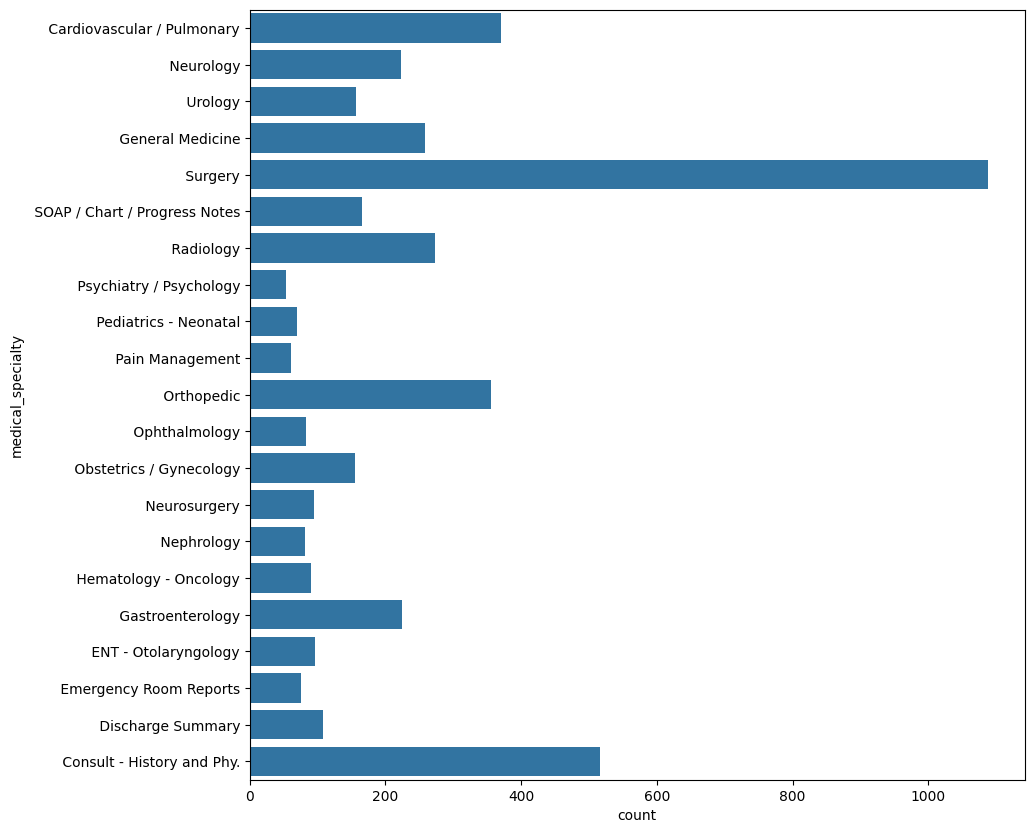

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = filtered_data_categories )
plt.show()

In [20]:
# We are interested only in the 'transcription' and 'medical_specialty' columns in the dataset

data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
data.shape

(4597, 2)

In [21]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+data.iloc[125]['transcription']+'\n')
print('Sample Transcription 3:'+data.iloc[1000]['transcription'])

Sample Transcription 1:CC:, Confusion and slurred speech.,HX , (primarily obtained from boyfriend): This 31 y/o RHF experienced a "flu-like illness 6-8 weeks prior to presentation. 3-4 weeks prior to presentation, she was found "passed out" in bed, and when awoken appeared confused, and lethargic. She apparently recovered within 24 hours. For two weeks prior to presentation she demonstrated emotional lability, uncharacteristic of her ( outbursts of anger and inappropriate laughter). She left a stove on.,She began slurring her speech 2 days prior to admission. On the day of presentation she developed right facial weakness and began stumbling to the right. She denied any associated headache, nausea, vomiting, fever, chills, neck stiffness or visual change. There was no history of illicit drug/ETOH use or head trauma.,PMH:, Migraine Headache.,FHX: , Unremarkable.,SHX: ,Divorced. Lives with boyfriend. 3 children alive and well. Denied tobacco/illicit drug use. Rarely consumes ETOH.,ROS:, I

<h3>Cleaning the data</h3>

In [22]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist) 

In [23]:
data['transcription'] = data['transcription'].apply(lemmatize_text)
data['transcription'] = data['transcription'].apply(clean_text)

In [24]:
print('Sample Transcription 1:'+data.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+data.iloc[125]['transcription']+'\n')
print('Sample Transcription 3:'+data.iloc[1000]['transcription'])

Sample Transcription 1:cc   confusion and slurred speech  hx   primarily obtained from boyfriend   this  yo rhf experienced a  flulike illness  week prior to presentation  obgyn exam including cervical biopsy  and abdominalpelvic ct scanning revealed stage iv squamous cell cancer of the cervix 

Sample Transcription 2:admitting diagnoses    this is scheduled for the week after discharge potentially by dr g  and the patient will discus the exact time later this week 

Sample Transcription 3:preoperative diagnoses   phimosis and adhesions  postoperative diagnoses   phimosis and adhesions  procedures performed   circumcision and release of ventral chordee  anesthesia   local mac  estimated blood loss   minimal  fluids   crystalloid  plan wa for removal of the dressing tomorrow 


<h3>Feature Extraction (Converting text data into a numerical form)</h3>

<h4>TF-IDF:</h4>

In [25]:
tfidfVectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = tfidfVectorizer.fit_transform(data['transcription'].tolist())
tfidf_feature_names = sorted(tfidfVectorizer.get_feature_names_out())
print(tfidf_feature_names)

['abc', 'abcd', 'abdomen', 'abdomen pelvis', 'abdominal', 'abdominal pain', 'abnormal', 'abscess', 'activity', 'acute', 'additional', 'adenocarcinoma', 'adequate', 'administered', 'admission', 'admitted', 'admitting', 'africanamerican', 'age', 'ago', 'airway', 'alcohol', 'anemia', 'anesthesia', 'anesthesia care', 'anesthesia general', 'anesthesia general endotracheal', 'anesthesia local', 'anesthetic', 'angina', 'angiography', 'ankle', 'anterior', 'antibiotic', 'aortic', 'apnea', 'apparent', 'appendicitis', 'applied', 'appointment', 'appropriate', 'approximately', 'area', 'arm', 'artery', 'artery disease', 'arthritis', 'arthroplasty', 'asked', 'aspect', 'aspiration', 'assessment', 'associated', 'atrial', 'atrial fibrillation', 'awakened', 'axial', 'axial ct', 'axial ct image', 'axis', 'baby', 'base', 'benefit', 'benign', 'better', 'bid', 'bilateral', 'bilaterally', 'biopsy', 'bladder', 'bleeding', 'block', 'blood', 'blood loss', 'blood loss cc', 'blood loss minimal', 'blood loss ml', '

<h4>Bag-of-Words (CountVectorizer):</h4>

In [26]:
# CountVectorizer (Bag-of-Words)
countVectorizer = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3), max_df=0.75, max_features=1000)
bow_matrix = countVectorizer.fit_transform(data['transcription'].tolist())
bow_feature_names = sorted(countVectorizer.get_feature_names_out())
print(bow_feature_names)

['abc', 'abcd', 'abdomen', 'abdomen pelvis', 'abdominal', 'abdominal pain', 'abnormal', 'abscess', 'activity', 'acute', 'additional', 'adenocarcinoma', 'adequate', 'administered', 'admission', 'admitted', 'admitting', 'africanamerican', 'age', 'ago', 'airway', 'alcohol', 'anemia', 'anesthesia', 'anesthesia care', 'anesthesia general', 'anesthesia general endotracheal', 'anesthesia local', 'anesthetic', 'angina', 'angiography', 'ankle', 'anterior', 'antibiotic', 'aortic', 'apnea', 'apparent', 'appendicitis', 'applied', 'appointment', 'appropriate', 'approximately', 'area', 'arm', 'artery', 'artery disease', 'arthritis', 'arthroplasty', 'asked', 'aspect', 'aspiration', 'assessment', 'associated', 'atrial', 'atrial fibrillation', 'awakened', 'axial', 'axial ct', 'axial ct image', 'axis', 'baby', 'base', 'benefit', 'benign', 'better', 'bid', 'bilateral', 'bilaterally', 'biopsy', 'bladder', 'bleeding', 'block', 'blood', 'blood loss', 'blood loss cc', 'blood loss minimal', 'blood loss ml', '

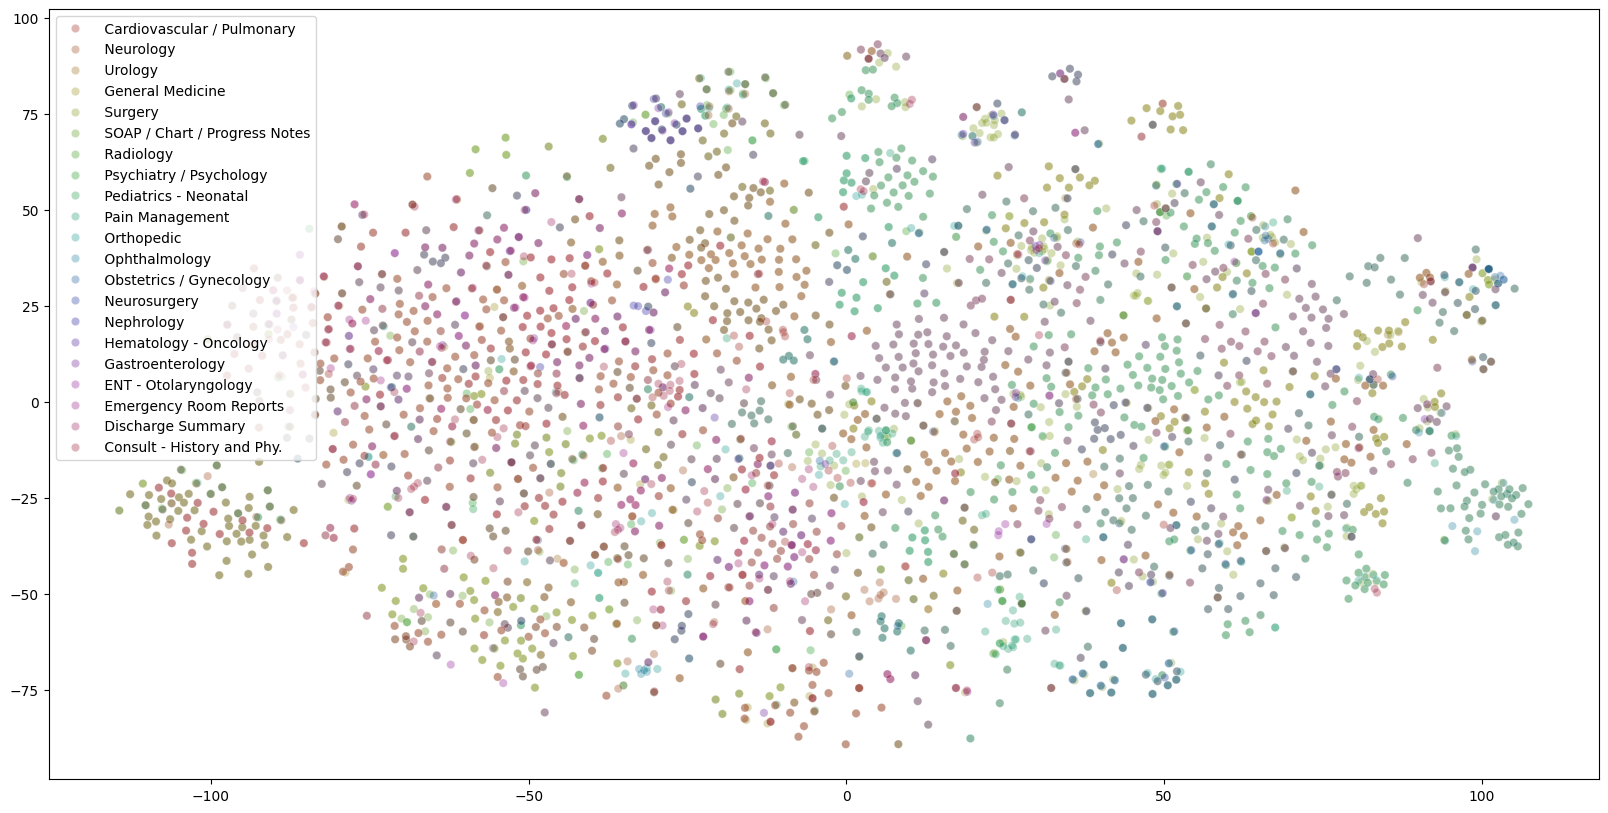

In [27]:
import gc
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
tfIdfArray = np.asarray(tfIdfMatrix)
tfIdf_labels = data['medical_specialty'].tolist()
tsne_results_tfIdf = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfArray)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(21, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results_tfIdf[:,0], y=tsne_results_tfIdf[:,1],
    hue=tfIdf_labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

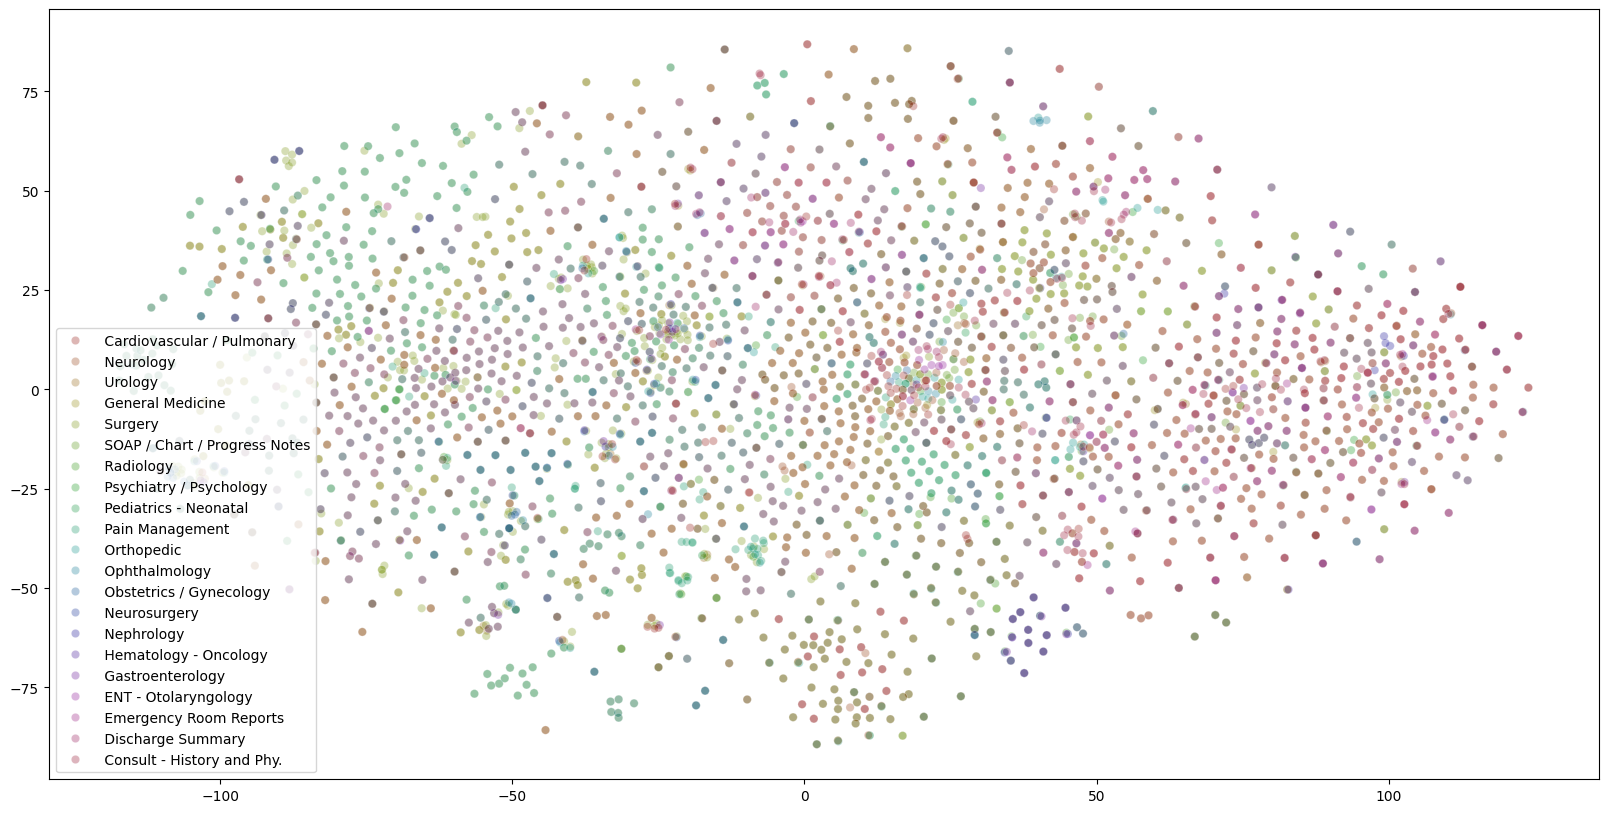

In [28]:
gc.collect()
bowMatrix = bow_matrix.todense()
bowArray = np.asarray(bowMatrix)
bow_labels = data['medical_specialty'].tolist()
tsne_results_bow = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(bowArray)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(21, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results_bow[:,0], y=tsne_results_bow[:,1],
    hue=bow_labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

<h3>PCA (Principal Component Analysis)</h3>

<span>Reducing the size of the TF-IDF and Bow matrix</span> <br/>
<span>TF-IDF ve BOW matrisinin boyutunu azaltma</span>

In [29]:
gc.collect()
pca = PCA(n_components=0.95)

**For** **TF-IDF:**

In [30]:
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels_tfIdfMat = data['medical_specialty'].tolist()
category_list_tfIdf = data.medical_specialty.unique()

**For** **BOW:**

In [31]:
bow_reduced = pca.fit_transform(bow_matrix.toarray())
labels_bow = data['medical_specialty'].tolist()
category_list_bow = data.medical_specialty.unique()

<h3>Implement Algorithms & Architecture</h3>

In [32]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, LSTM, GRU, Dense, GlobalMaxPooling1D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score

<h4>With TF-IDF:</h4>

In [33]:
X_train_tfIdf, X_test_tfIdf, y_train_tfIdf, y_test_tfIdf = train_test_split(tfIdfMat_reduced, labels_tfIdfMat, stratify=labels_tfIdfMat,random_state=1)   
print('Train_Set_Size:'+str(X_train_tfIdf.shape))
print('Test_Set_Size:'+str(X_test_tfIdf.shape))

Train_Set_Size:(3447, 587)
Test_Set_Size:(1150, 587)


<h5>Ensemble Learning</h5>

In [34]:
def create_cnn_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def create_lstm_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = LSTM(50, return_sequences=True)(x)
    x = LSTM(50)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_gru_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = GRU(50, return_sequences=True)(x)
    x = GRU(50)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def create_ensemble_tfIdf(input_shape, vocab_size, embedding_dim, num_classes):
    cnn = create_cnn_tfIdf(input_shape, vocab_size, embedding_dim)
    lstm = create_lstm_tfIdf(input_shape, vocab_size, embedding_dim)
    gru = create_gru_tfIdf(input_shape, vocab_size, embedding_dim)

    concatenated = concatenate([cnn.output, lstm.output, gru.output])
    x = Dense(100, activation='relu')(concatenated)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[cnn.input, lstm.input, gru.input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_shape = X_train_tfIdf.shape[1]
num_classes = len(category_list_tfIdf)
vocab_size = len(category_list_tfIdf)
embedding_dim = 50

# Creating model
model_ensemble_tfIdf = create_ensemble_tfIdf(input_shape, vocab_size, embedding_dim, num_classes)
model_ensemble_tfIdf.summary()

# LabelEncoder:
label_encoder = LabelEncoder()
y_train_encoded_ensemble_tfIdf = label_encoder.fit_transform(y_train_tfIdf)
y_test_encoded_ensemble_tfIdf = label_encoder.transform(y_test_tfIdf)

# Train model
history_ensemble_tfIdf = model_ensemble_tfIdf.fit([X_train_tfIdf, X_train_tfIdf, X_train_tfIdf], y_train_encoded_ensemble_tfIdf, epochs=1, batch_size=32)

# Predict
y_pred_ensemble_tfIdf = model_ensemble_tfIdf.predict([X_test_tfIdf, X_test_tfIdf, X_test_tfIdf])
y_pred_ensemble_tfIdf = np.argmax(y_pred_ensemble_tfIdf, axis=1)

print(classification_report(y_test_encoded_ensemble_tfIdf, y_pred_ensemble_tfIdf, target_names=category_list_tfIdf, zero_division=1))

accuracy_ensemble_tfIdf = accuracy_score(y_test_encoded_ensemble_tfIdf, y_pred_ensemble_tfIdf)
print("Accuracy:", accuracy_ensemble_tfIdf)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 587)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 587, 50)              1050      ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 587)]                0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 587)]                0         []                            
                                                                                            

<h5>1. LogisticRegression</h5>

In [36]:
tfIdf_lr_model = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train_tfIdf, y_train_tfIdf)
y_pred_lr_tfIdf= tfIdf_lr_model.predict(X_test_tfIdf)
print(classification_report(y_test_tfIdf, y_pred_lr_tfIdf, labels=category_list_tfIdf, zero_division=1))

accuracy_lr_tfIdf = accuracy_score(y_test_tfIdf, y_pred_lr_tfIdf)
print("Accuracy:", accuracy_lr_tfIdf)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.34      0.30      0.32        93
                     Neurology       0.40      0.21      0.28        56
                       Urology       0.33      0.10      0.16        39
              General Medicine       0.22      0.09      0.13        65
                       Surgery       0.45      0.78      0.57       272
 SOAP / Chart / Progress Notes       0.35      0.31      0.33        42
                     Radiology       0.35      0.35      0.35        68
       Psychiatry / Psychology       1.00      0.00      0.00        13
         Pediatrics - Neonatal       1.00      0.00      0.00        17
               Pain Management       1.00      0.20      0.33        15
                    Orthopedic       0.44      0.26      0.33        89
                 Ophthalmology       0.50      0.19      0.28        21
       Obstetrics / Gynecology       0.10      0.03      0.04  

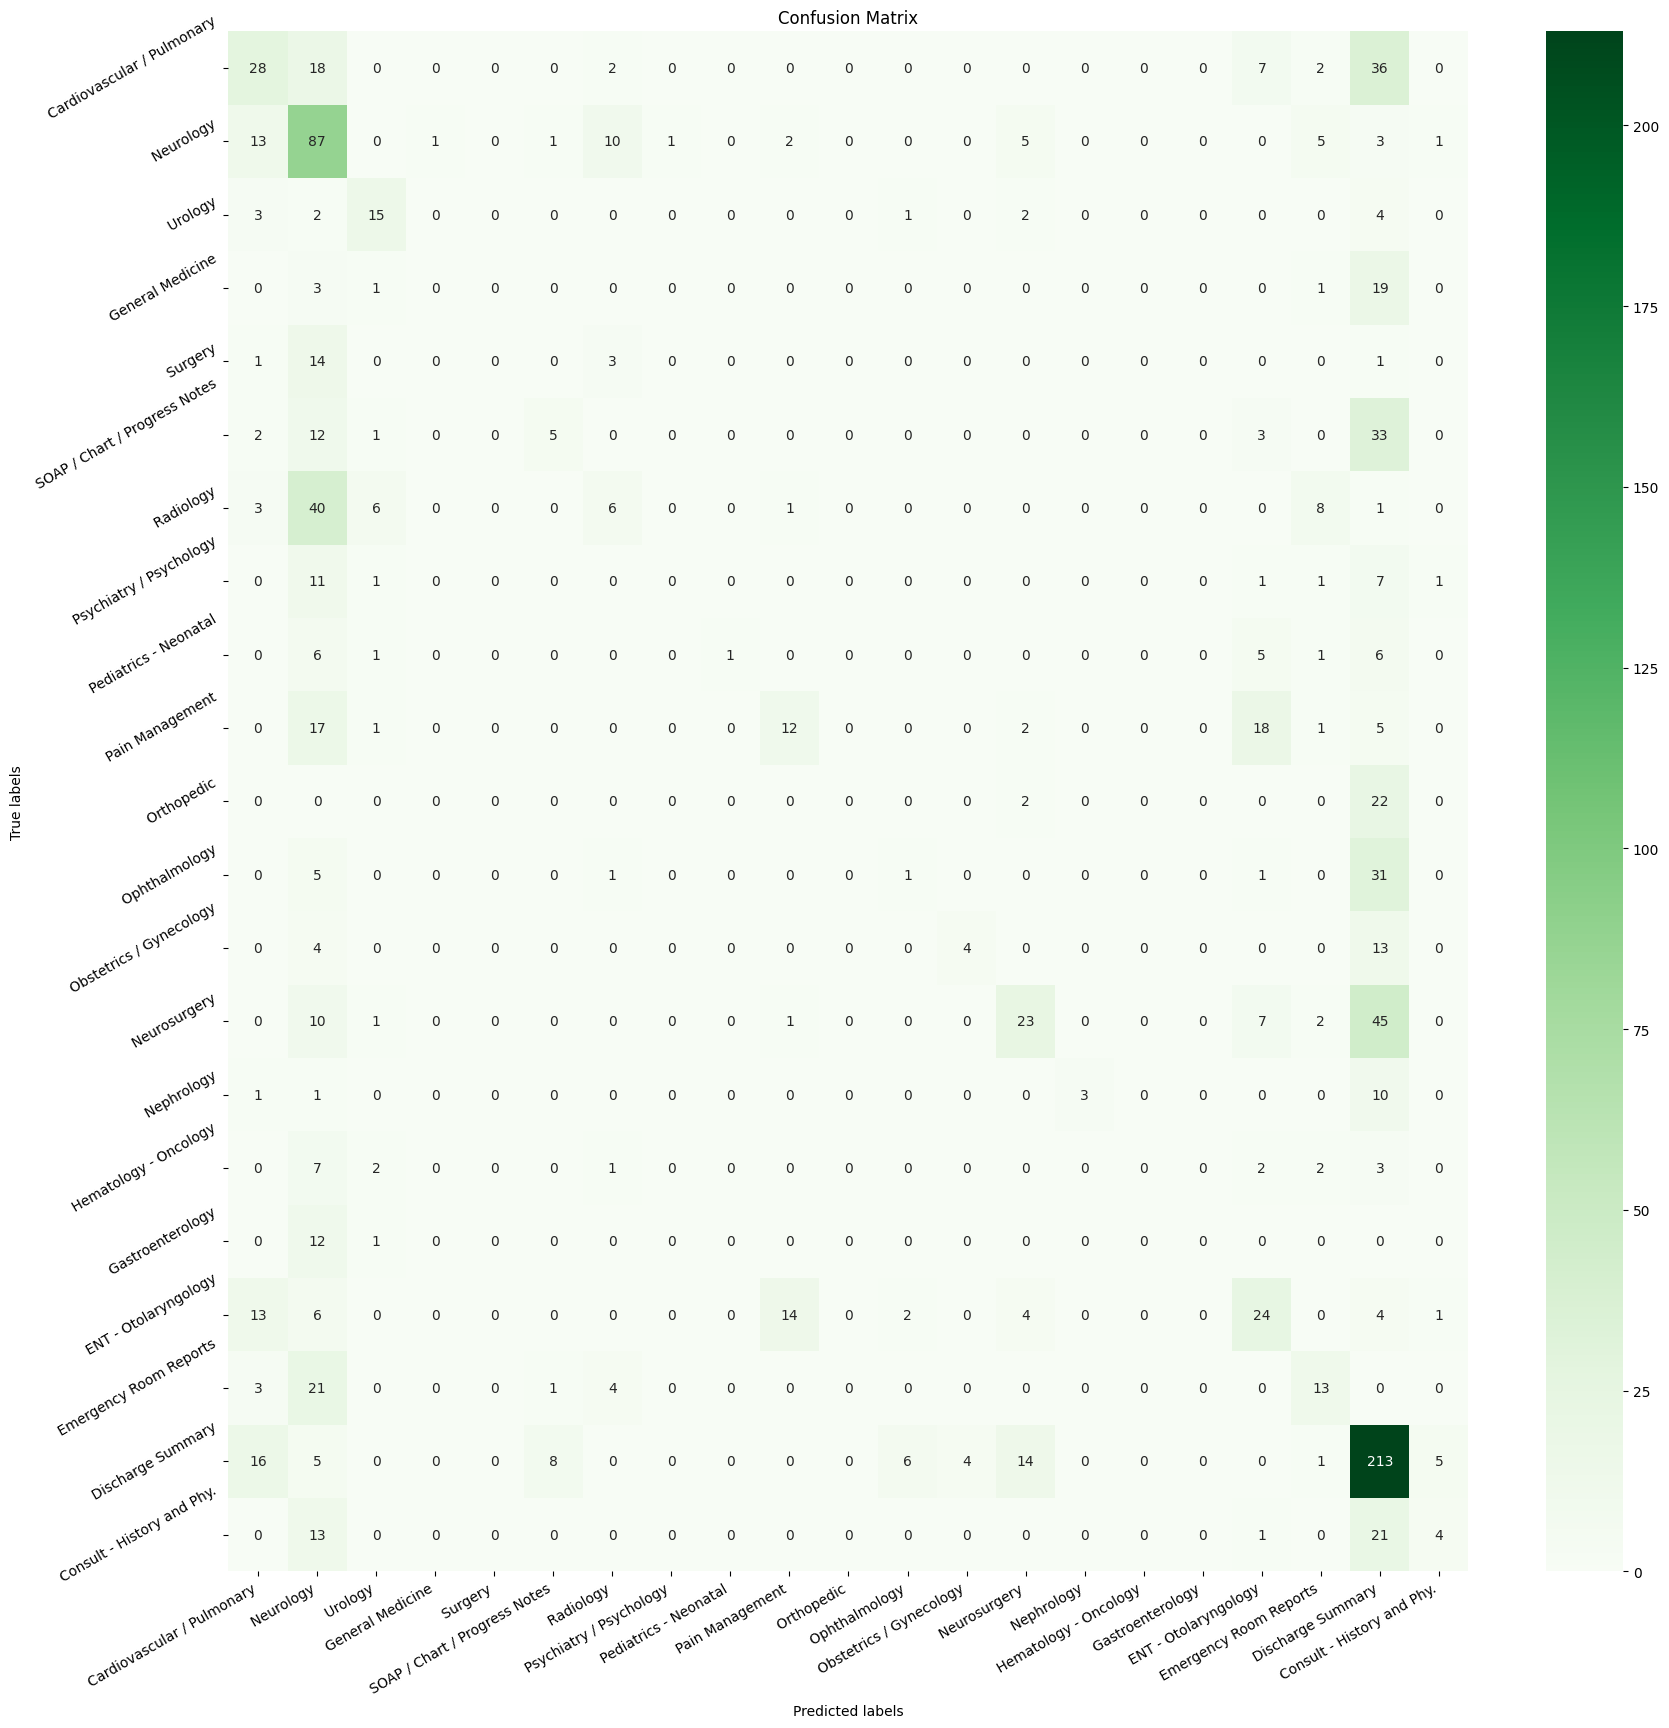

In [37]:
labels_cm_tfIdf_lg = category_list_tfIdf
cm = confusion_matrix(y_test_tfIdf, y_pred_lr_tfIdf)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_lg); ax.yaxis.set_ticklabels(labels_cm_tfIdf_lg);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>2. Random Forest</h5>

In [38]:
tfIdf_rf_model = RandomForestClassifier(random_state=1)
tfIdf_rf_model.fit(X_train_tfIdf, y_train_tfIdf)
y_pred_rf_tfIdf = tfIdf_rf_model.predict(X_test_tfIdf)
print(classification_report(y_test_tfIdf, y_pred_rf_tfIdf))

accuracy_rf_tfIdf = accuracy_score(y_test_tfIdf, y_pred_rf_tfIdf)
print("Accuracy:", accuracy_rf_tfIdf)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.07      0.05      0.06        93
    Consult - History and Phy.       0.14      0.20      0.16       129
             Discharge Summary       0.21      0.15      0.17        27
          ENT - Otolaryngology       0.00      0.00      0.00        24
        Emergency Room Reports       0.00      0.00      0.00        19
              Gastroenterology       0.00      0.00      0.00        56
              General Medicine       0.03      0.03      0.03        65
         Hematology - Oncology       0.00      0.00      0.00        22
                    Nephrology       0.00      0.00      0.00        20
                     Neurology       0.00      0.00      0.00        56
                  Neurosurgery       0.00      0.00      0.00        24
       Obstetrics / Gynecology       0.03      0.03      0.03        39
                 Ophthalmology       0.00      0.00      0.00  

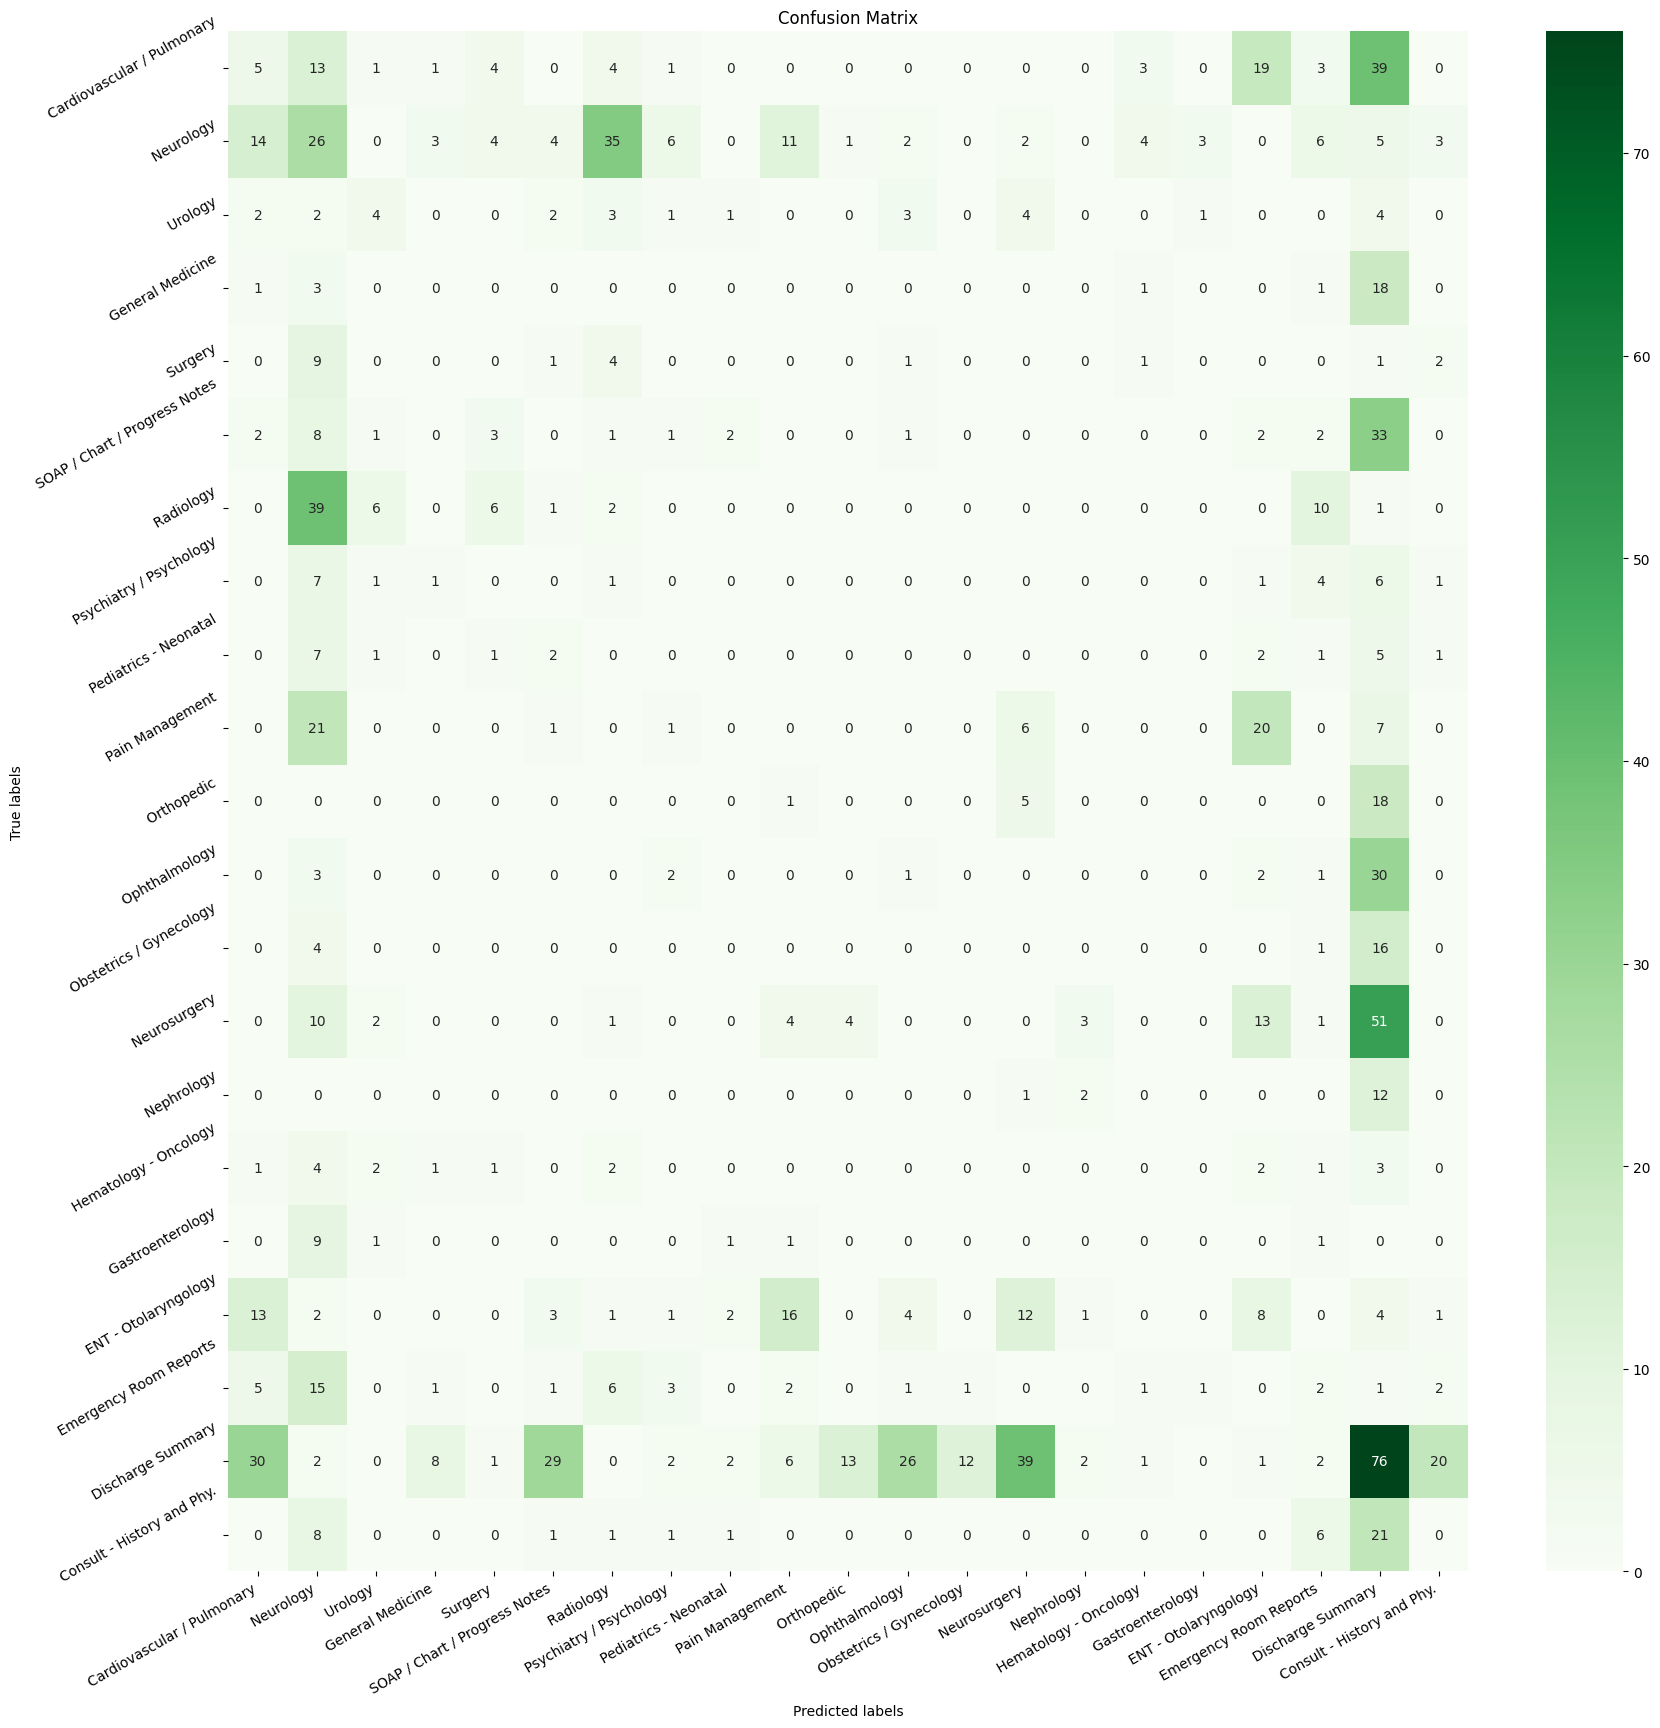

In [39]:
labels_cm_tfIdf_rf = category_list_tfIdf
cm = confusion_matrix(y_test_tfIdf, y_pred_rf_tfIdf)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_rf); ax.yaxis.set_ticklabels(labels_cm_tfIdf_rf);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>3. XGBoost:</h5>

In [40]:
from sklearn.preprocessing import LabelEncoder

tfIdf_xgb_model = xgb.XGBClassifier(random_state=1)
label_encoder = LabelEncoder()

# Sınıf etiketlerini sayısal değerlere dönüştürme
y_train_encoded = label_encoder.fit_transform(y_train_tfIdf)
tfIdf_xgb_model.fit(X_train_tfIdf, y_train_encoded)

y_test_encoded = label_encoder.transform(y_test_tfIdf)
y_pred_xgb_tfIdf = tfIdf_xgb_model.predict(X_test_tfIdf)

print(classification_report(y_test_encoded, y_pred_xgb_tfIdf))

accuracy_xgb_tfIdf = accuracy_score(y_test_encoded, y_pred_xgb_tfIdf)
print("Accuracy:", accuracy_xgb_tfIdf)

              precision    recall  f1-score   support

           0       0.12      0.10      0.11        93
           1       0.14      0.18      0.16       129
           2       0.26      0.22      0.24        27
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        56
           6       0.06      0.06      0.06        65
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        24
          11       0.05      0.05      0.05        39
          12       0.06      0.05      0.05        21
          13       0.01      0.01      0.01        89
          14       0.57      0.27      0.36        15
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        13
          17       0.15    

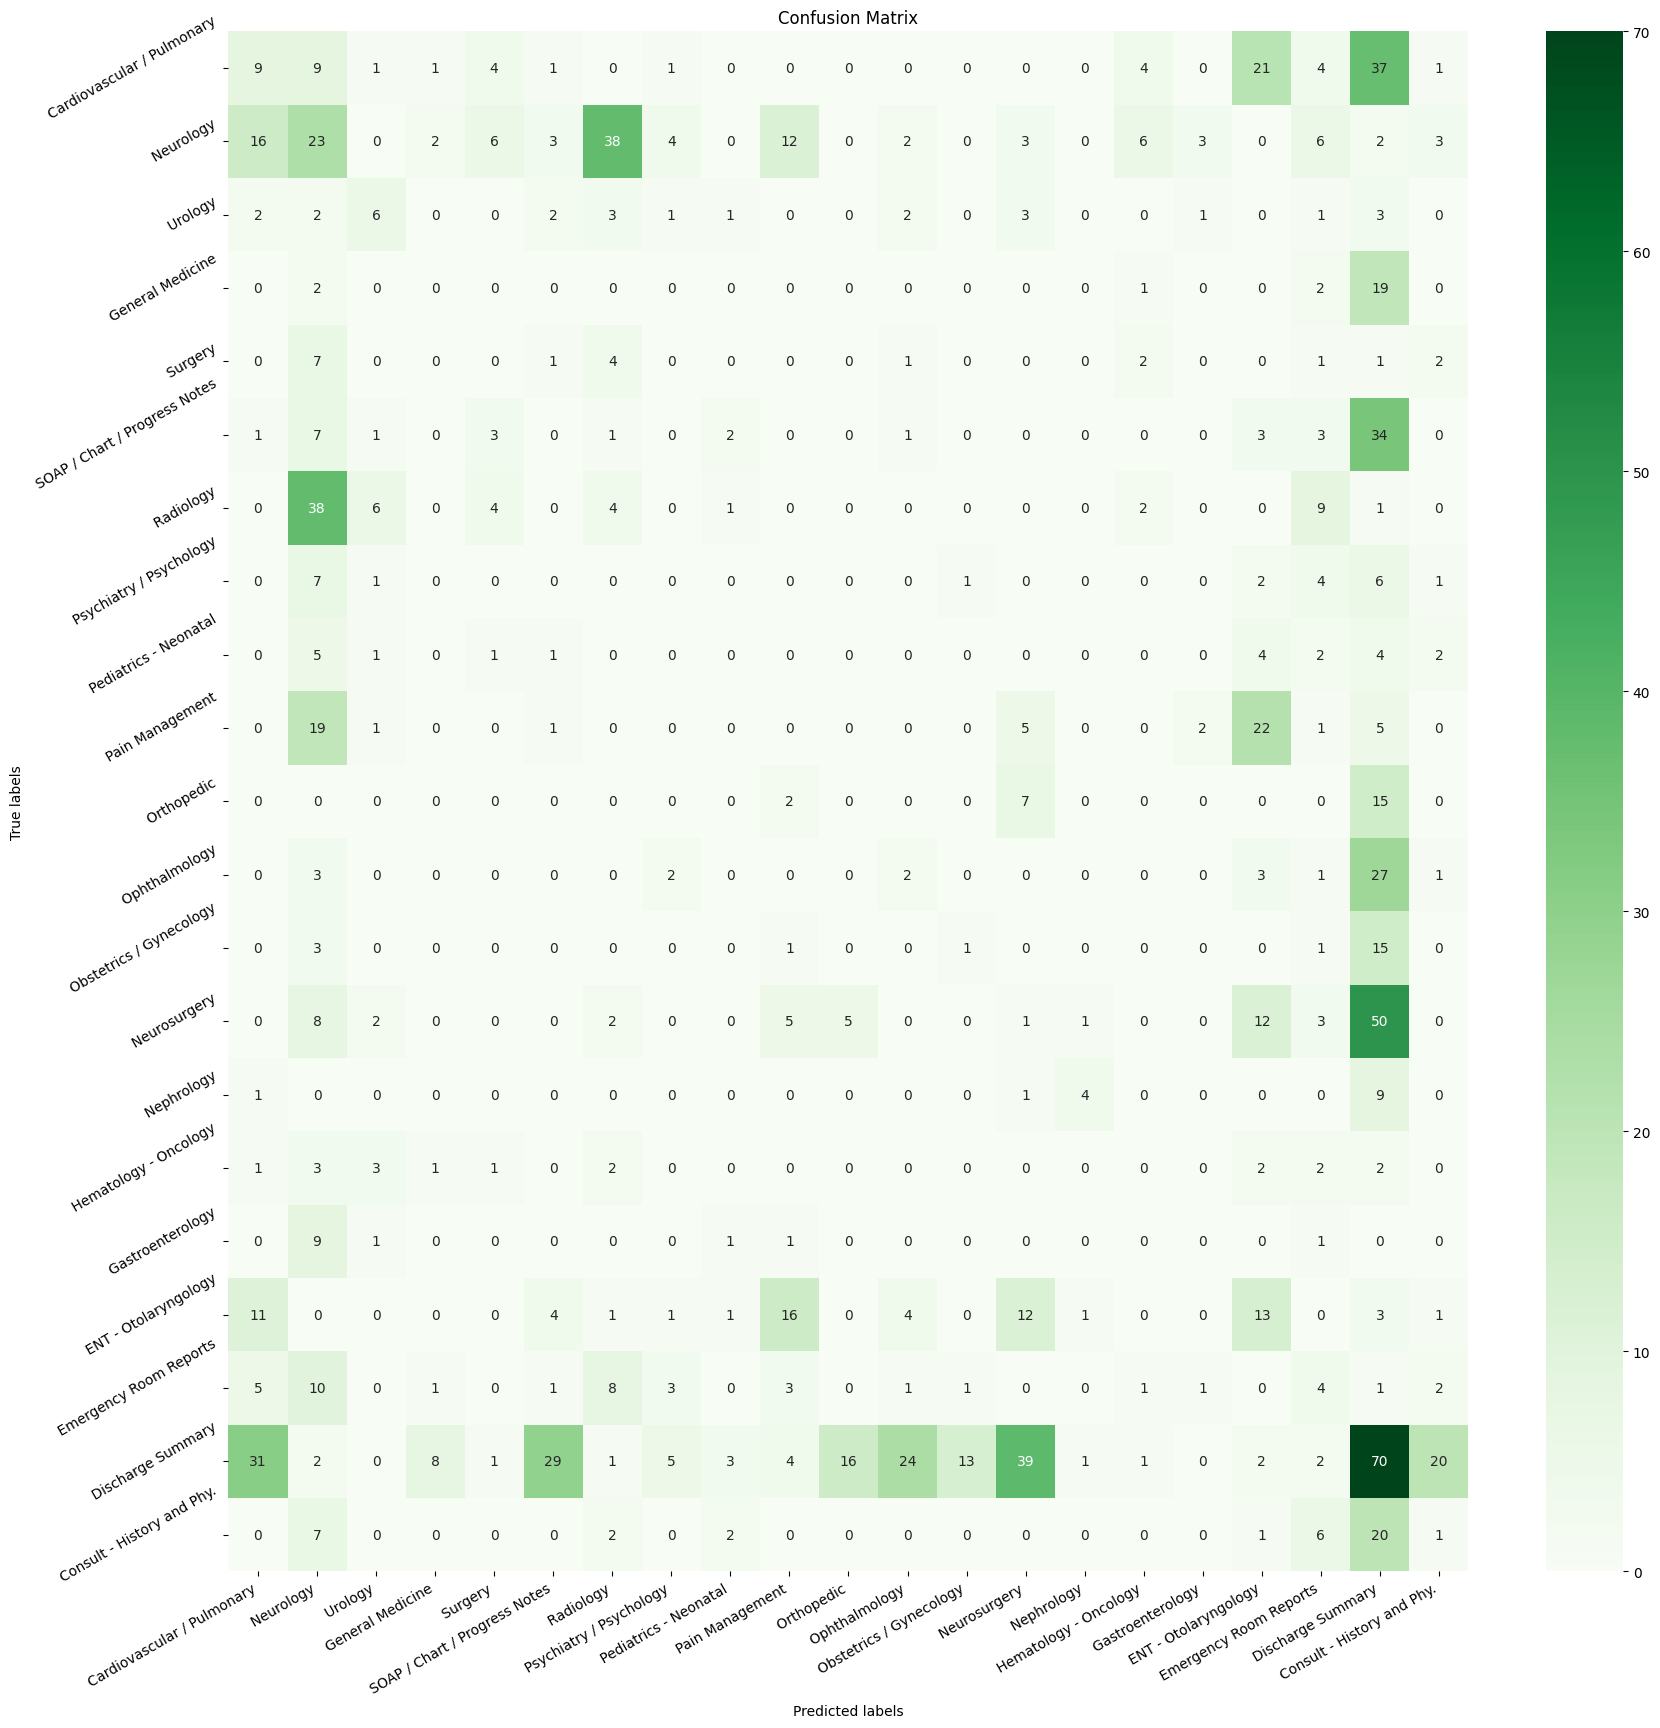

In [41]:
labels_cm_tfIdf_xgb = category_list_tfIdf
cm = confusion_matrix(y_test_encoded, y_pred_xgb_tfIdf)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_xgb); ax.yaxis.set_ticklabels(labels_cm_tfIdf_xgb);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>4. LightGBM:</h5>

In [42]:
tfIdf_lgb_model = lgb.LGBMClassifier(random_state=1)
tfIdf_lgb_model.fit(X_train_tfIdf, y_train_tfIdf)
y_pred_lgb_tfIdf = tfIdf_lgb_model.predict(X_test_tfIdf)
print(classification_report(y_test_tfIdf, y_pred_lgb_tfIdf))

accuracy_lgb_tfIdf = accuracy_score(y_test_tfIdf, y_pred_lgb_tfIdf)
print("Accuracy:", accuracy_lgb_tfIdf)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149685
[LightGBM] [Info] Number of data points in the train set: 3447, number of used features: 587
[LightGBM] [Info] Start training from score -2.517638
[LightGBM] [Info] Start training from score -2.186835
[LightGBM] [Info] Start training from score -3.750810
[LightGBM] [Info] Start training from score -3.868593
[LightGBM] [Info] Start training from score -4.119908
[LightGBM] [Info] Start training from score -3.021296
[LightGBM] [Info] Start training from score -2.877401
[LightGBM] [Info] Start training from score -3.925752
[LightGBM] [Info] Start training from score -4.034386
[LightGBM] [Info] Start training from score -3.027266
[LightGBM] [Info] Start training from score -3.896764
[LightGBM] [Info] Start training from score -3.391669
[LightGBM] [Info] Start training from score -4.018125
[LightG

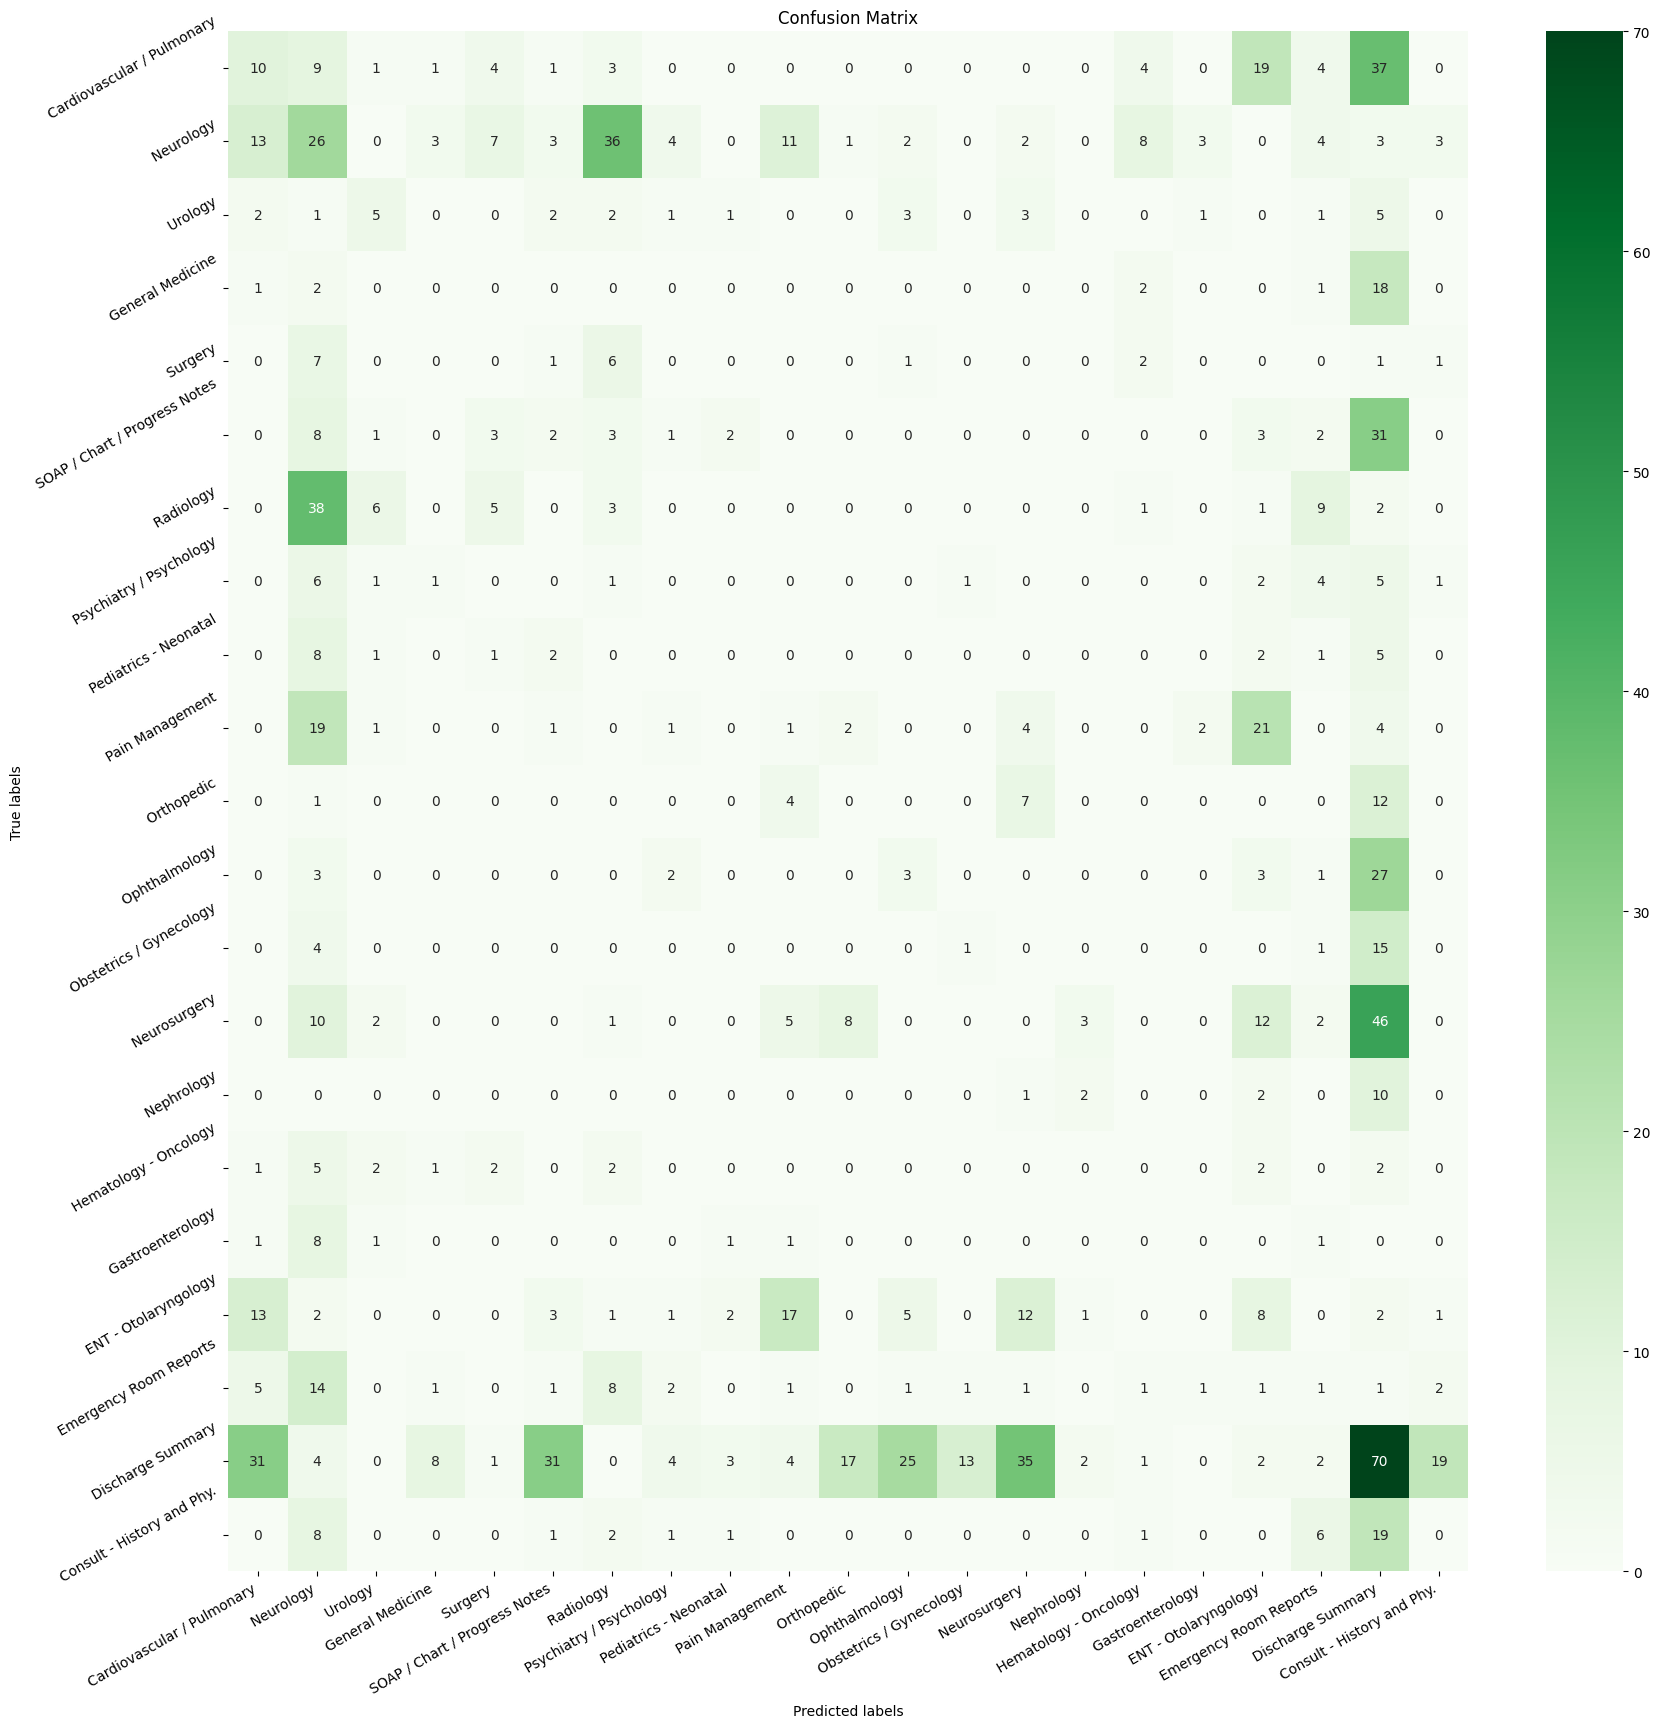

In [43]:
labels_cm_tfIdf_lgbm = category_list_tfIdf
cm = confusion_matrix(y_test_tfIdf, y_pred_lgb_tfIdf)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_lgbm); ax.yaxis.set_ticklabels(labels_cm_tfIdf_lgbm);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>5. Multinomial NB:</h5>

In [44]:
X_train_nb_tfIdf, X_test_nb_tfIdf, y_train_nb_tfIdf, y_test_nb_tfIdf = train_test_split(tfIdfMat.toarray(), labels_tfIdfMat, stratify=labels_tfIdfMat, random_state=1)

tfIdf_nb_model = MultinomialNB()
tfIdf_nb_model.fit(X_train_nb_tfIdf, y_train_nb_tfIdf)
y_pred_nb_tfIdf = tfIdf_nb_model.predict(X_test_nb_tfIdf)
print(classification_report(y_test_nb_tfIdf, y_pred_nb_tfIdf, zero_division=1))

accuracy_nb_tfIdf = accuracy_score(y_test_nb_tfIdf, y_pred_nb_tfIdf)
print("Accuracy:", accuracy_nb_tfIdf)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.42      0.26      0.32        93
    Consult - History and Phy.       0.30      0.87      0.44       129
             Discharge Summary       0.40      0.30      0.34        27
          ENT - Otolaryngology       1.00      0.00      0.00        24
        Emergency Room Reports       1.00      0.00      0.00        19
              Gastroenterology       0.30      0.05      0.09        56
              General Medicine       0.33      0.06      0.10        65
         Hematology - Oncology       1.00      0.00      0.00        22
                    Nephrology       1.00      0.00      0.00        20
                     Neurology       0.37      0.18      0.24        56
                  Neurosurgery       1.00      0.00      0.00        24
       Obstetrics / Gynecology       0.11      0.03      0.04        39
                 Ophthalmology       0.56      0.24      0.33  

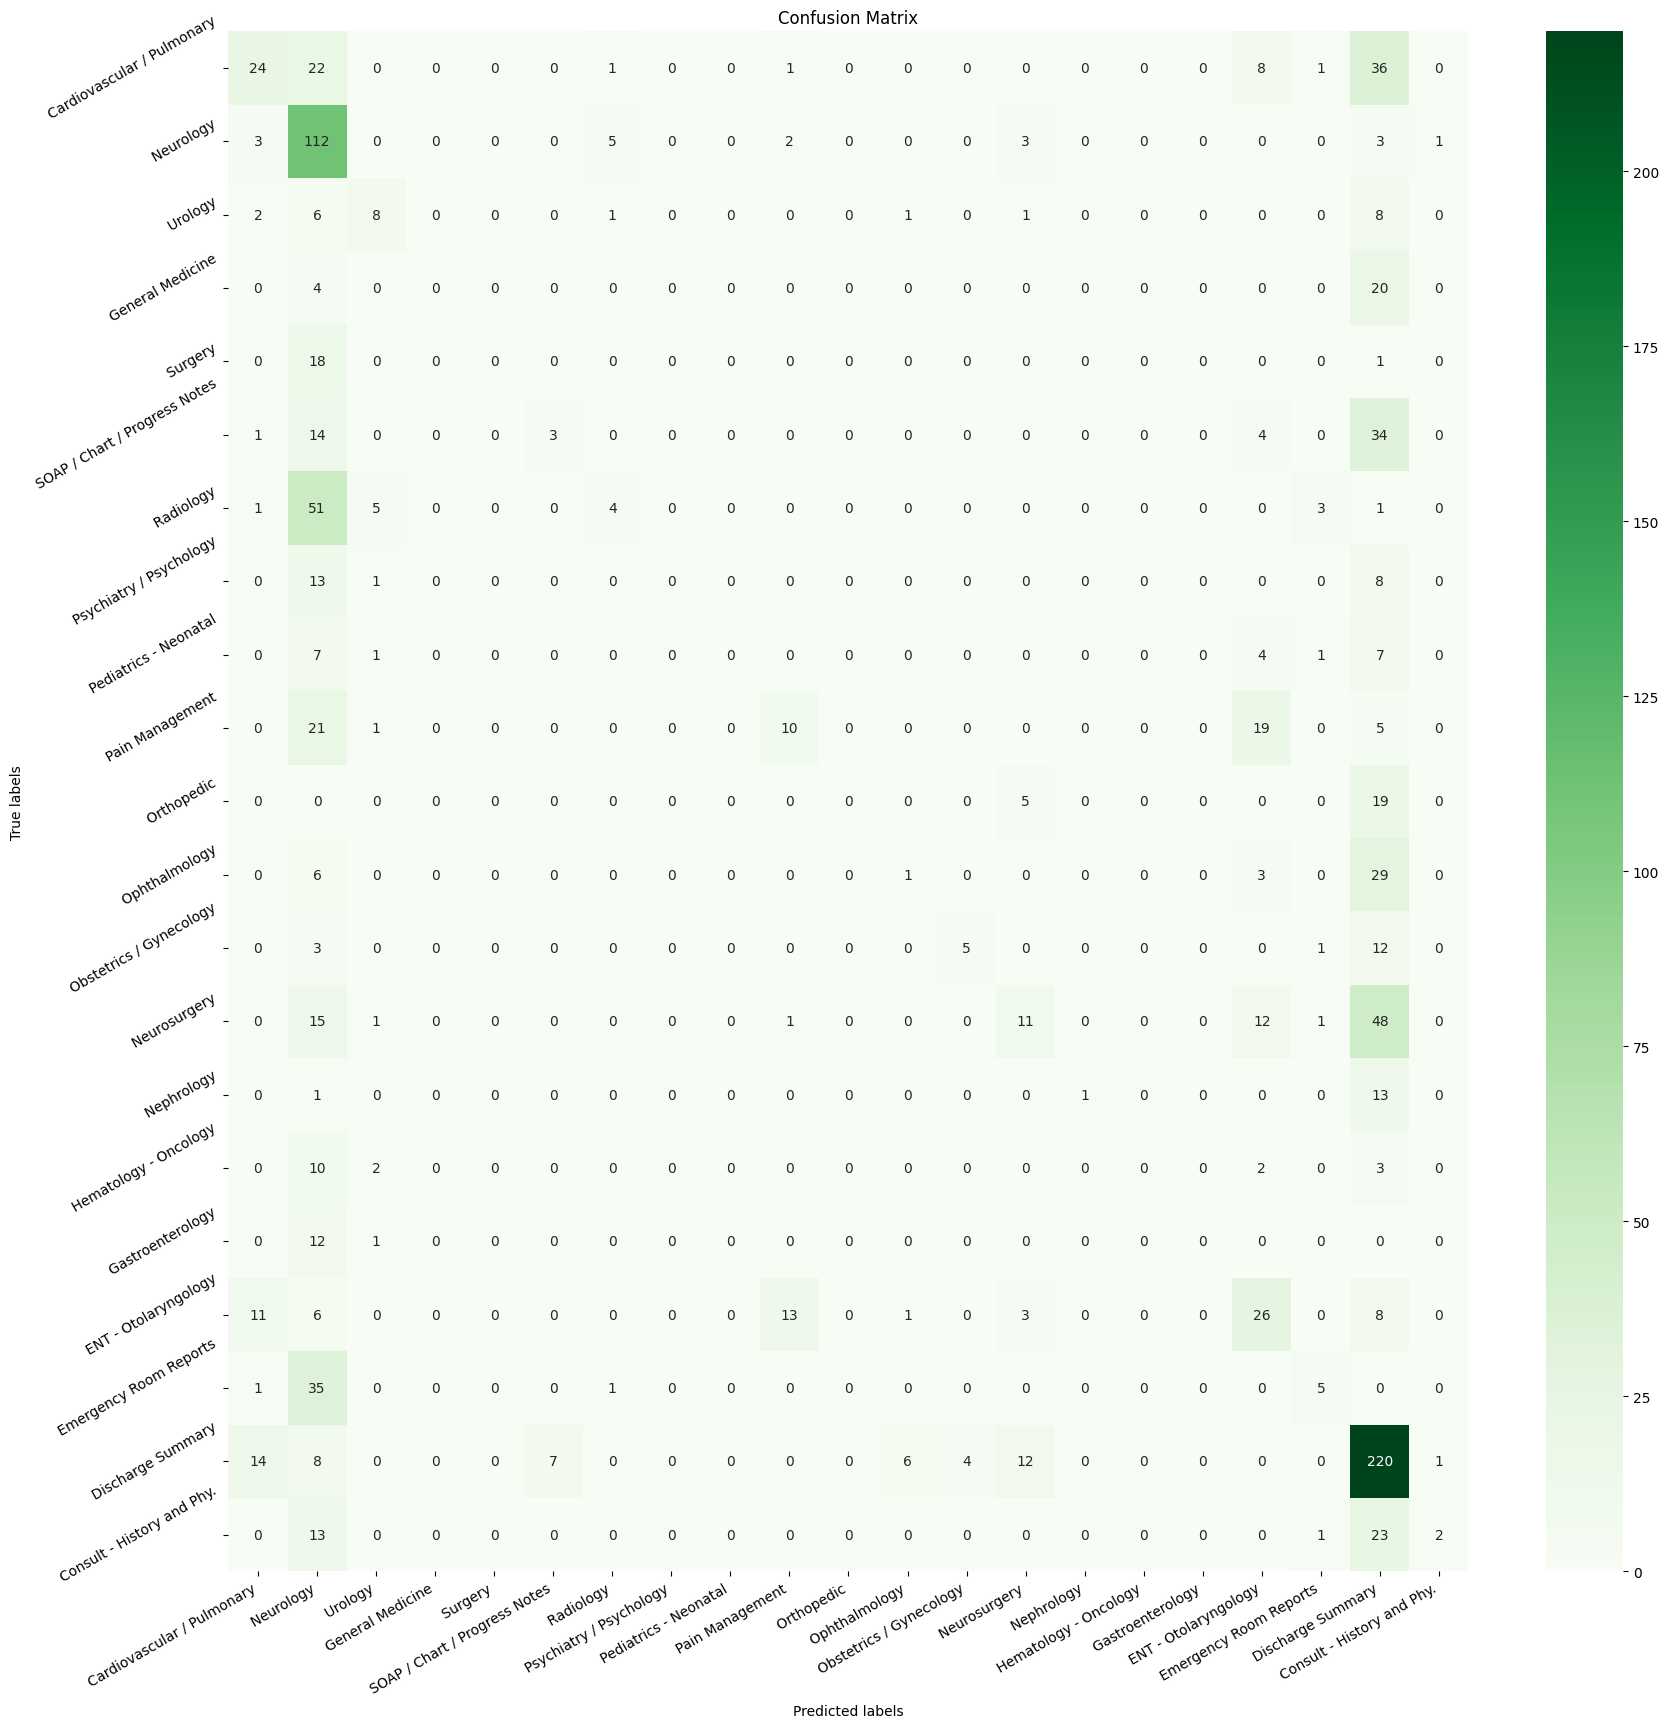

In [45]:
labels_cm_tfIdf_nb = category_list_tfIdf
cm = confusion_matrix(y_test_nb_tfIdf, y_pred_nb_tfIdf)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_nb); ax.yaxis.set_ticklabels(labels_cm_tfIdf_nb);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h4>With BOW:</h5>

In [46]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_reduced, labels_bow, stratify=labels_bow,random_state=1)   
print('Train_Set_Size:'+str(X_train_bow.shape))
print('Test_Set_Size:'+str(X_test_bow.shape))

Train_Set_Size:(3447, 470)
Test_Set_Size:(1150, 470)


<h5>Ensemble Learning</h5>

In [47]:
def create_cnn_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_lstm_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_gru_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

# Ensemble modeli oluşturma
def create_ensemble_bow(input_shape, num_classes):
    cnn = create_cnn_bow(input_shape, num_classes)
    lstm = create_lstm_bow(input_shape, num_classes)
    gru = create_gru_bow(input_shape, num_classes)

    concatenated = concatenate([cnn.output, lstm.output, gru.output])
    x = Dense(100, activation='relu')(concatenated)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[cnn.input, lstm.input, gru.input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
input_shape = X_train_bow.shape[1]
num_classes = len(category_list_bow)

# Creating model
model_ensemble_bow = create_ensemble_bow(input_shape, num_classes)
model_ensemble_bow.summary()

# LabelEncoder:
label_encoder = LabelEncoder()
y_train_encoded_ensemble_bow = label_encoder.fit_transform(y_train_bow)
y_test_encoded_ensemble_bow = label_encoder.transform(y_test_bow)

# Train model
history_ensemble_bow = model_ensemble_bow.fit([X_train_bow, X_train_bow, X_train_bow], y_train_encoded_ensemble_bow, epochs=1, batch_size=32)

# Predict
y_pred_ensemble_bow = model_ensemble_bow.predict([X_test_bow, X_test_bow, X_test_bow])
y_pred_ensemble_bow = np.argmax(y_pred_ensemble_bow, axis=1)

print(classification_report(y_test_encoded_ensemble_bow, y_pred_ensemble_bow, target_names=category_list_bow, zero_division=1))


accuracy_ensemble_bow = accuracy_score(y_test_encoded_ensemble_bow, y_pred_ensemble_bow)
print("Accuracy:", accuracy_ensemble_bow)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 470)]                0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 64)                   30144     ['input_4[0][0]']             
                                                                                                  
 input_5 (InputLayer)        [(None, 470)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 470)]                0         []                            
                                                                                            

<h5>1. LogisticRegression</h5>

In [49]:
bow_lr_model = LogisticRegression(penalty= 'l1', solver= 'liblinear', random_state=1).fit(X_train_bow, y_train_bow)
y_pred_lr_bow= bow_lr_model.predict(X_test_bow)
print(classification_report(y_test_bow, y_pred_lr_bow, labels=category_list_bow, zero_division=1))

accuracy_lr_bow = accuracy_score(y_test_bow, y_pred_lr_bow)
print("Accuracy:", accuracy_lr_bow)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.24      0.22      0.23        93
                     Neurology       0.30      0.29      0.29        56
                       Urology       0.28      0.23      0.25        39
              General Medicine       0.15      0.11      0.12        65
                       Surgery       0.37      0.52      0.43       272
 SOAP / Chart / Progress Notes       0.20      0.29      0.24        42
                     Radiology       0.21      0.24      0.22        68
       Psychiatry / Psychology       0.00      0.00      1.00        13
         Pediatrics - Neonatal       0.00      0.00      1.00        17
               Pain Management       0.57      0.53      0.55        15
                    Orthopedic       0.13      0.07      0.09        89
                 Ophthalmology       0.11      0.05      0.07        21
       Obstetrics / Gynecology       0.04      0.03      0.03  

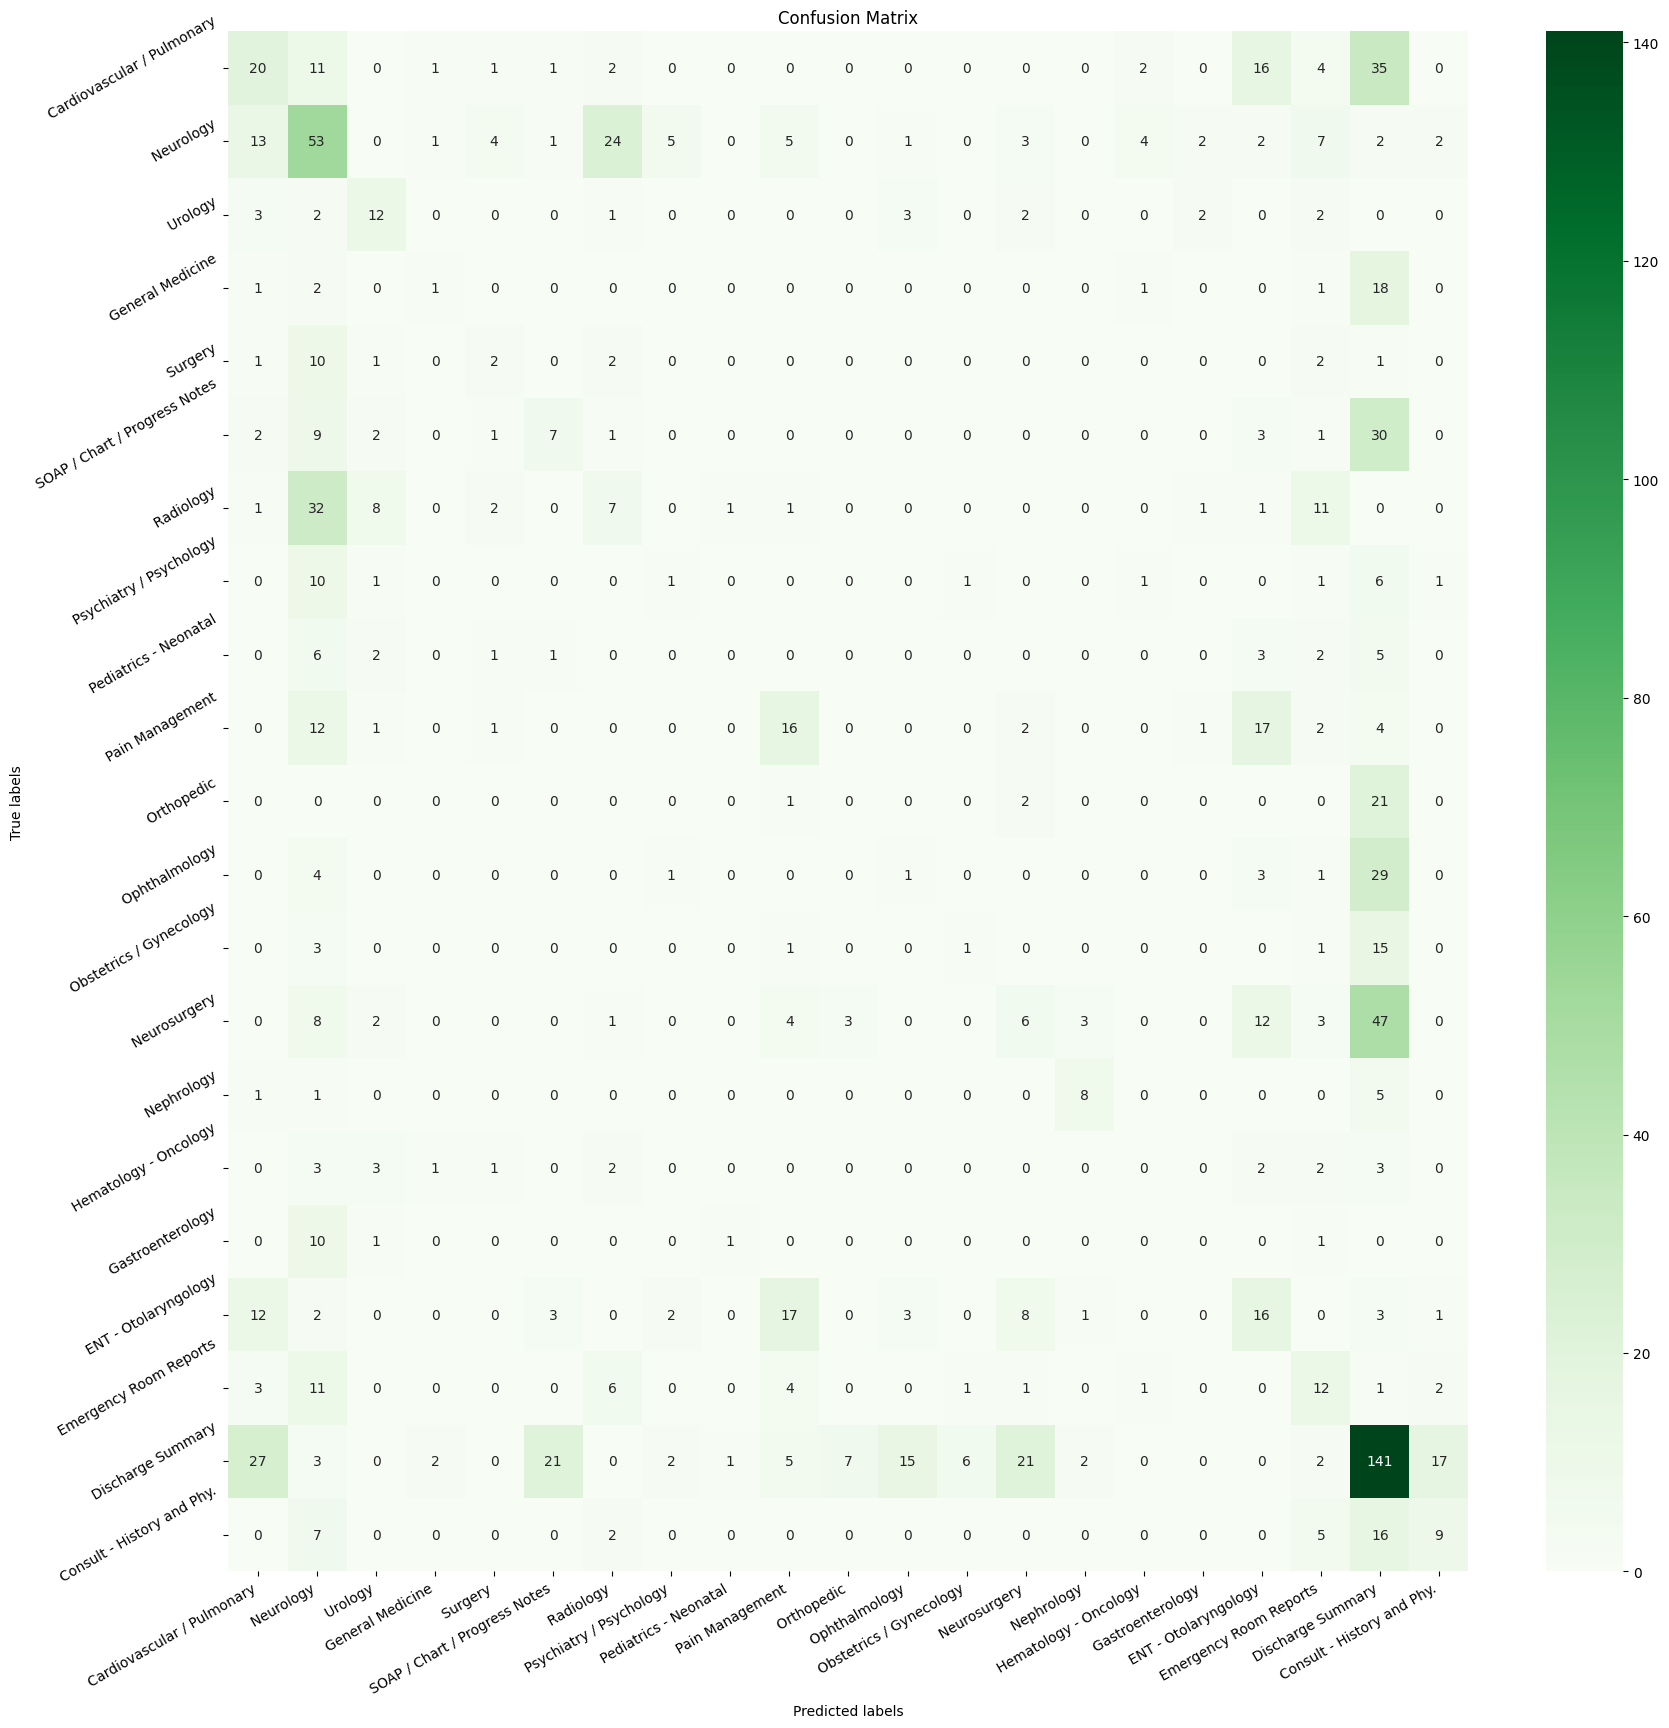

In [50]:
labels_cm_bow_lg = category_list_bow
cm = confusion_matrix(y_test_bow, y_pred_lr_bow)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_lg); ax.yaxis.set_ticklabels(labels_cm_bow_lg);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>2. Random Forest</h5>

In [51]:
bow_rf_model = RandomForestClassifier(random_state=1)
bow_rf_model.fit(X_train_bow, y_train_bow)
y_pred_rf_bow = bow_rf_model.predict(X_test_bow)
print(classification_report(y_test_bow, y_pred_rf_bow))

accuracy_rf_bow = accuracy_score(y_test_bow, y_pred_rf_bow)
print("Accuracy:", accuracy_rf_bow)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.04      0.03      0.04        93
    Consult - History and Phy.       0.14      0.19      0.16       129
             Discharge Summary       0.22      0.15      0.18        27
          ENT - Otolaryngology       0.00      0.00      0.00        24
        Emergency Room Reports       0.00      0.00      0.00        19
              Gastroenterology       0.00      0.00      0.00        56
              General Medicine       0.07      0.08      0.08        65
         Hematology - Oncology       0.00      0.00      0.00        22
                    Nephrology       0.00      0.00      0.00        20
                     Neurology       0.02      0.02      0.02        56
                  Neurosurgery       0.00      0.00      0.00        24
       Obstetrics / Gynecology       0.03      0.03      0.03        39
                 Ophthalmology       0.00      0.00      0.00  

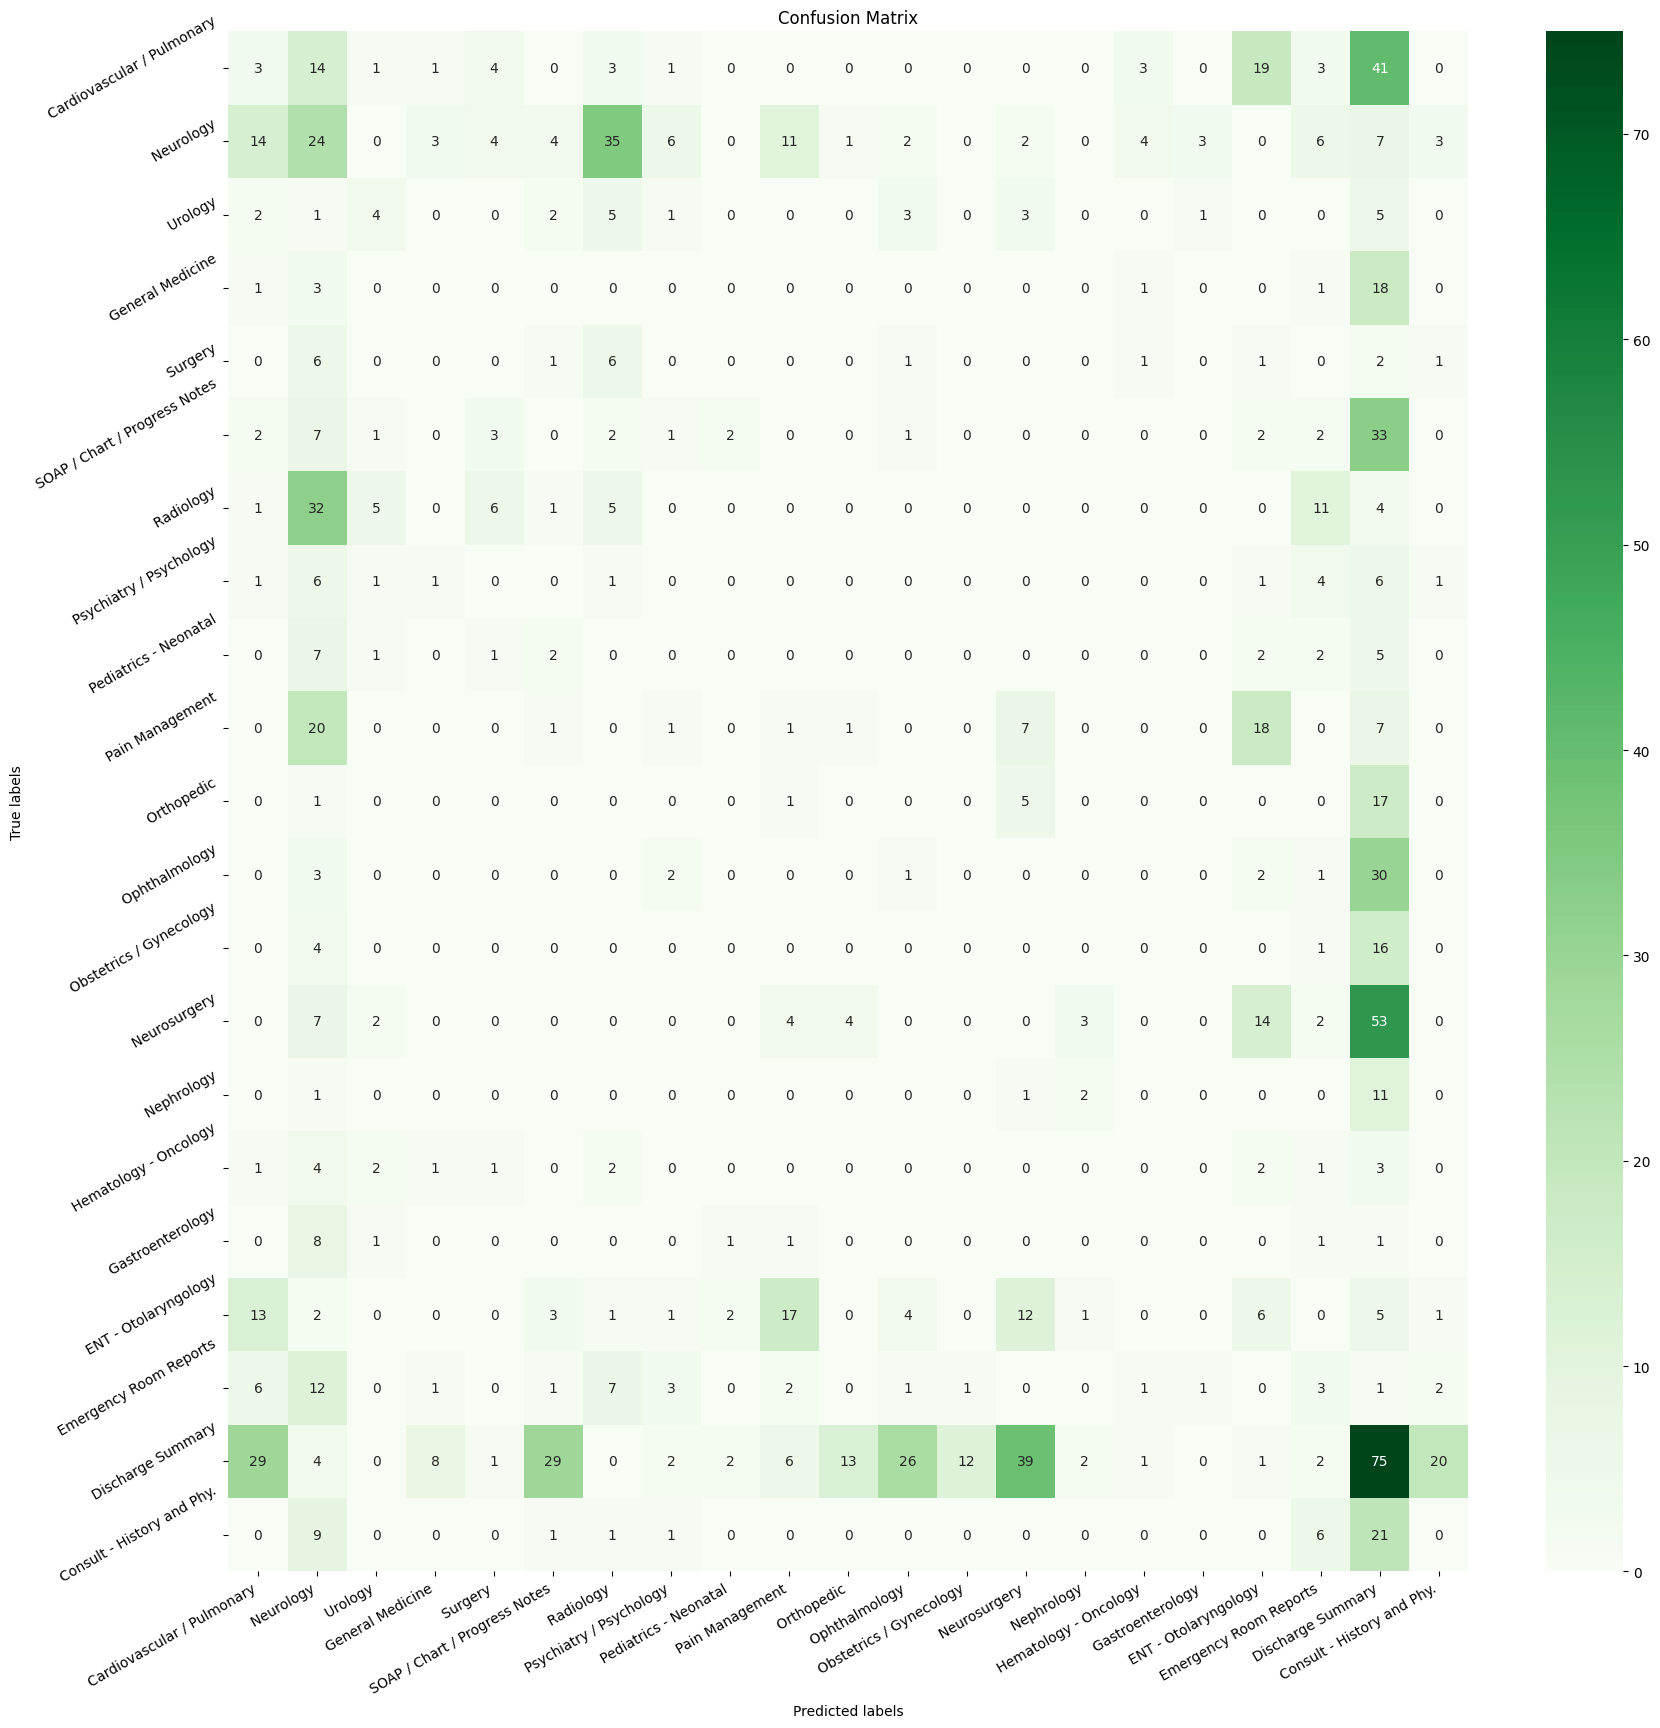

In [52]:
labels_cm_bow_rf = category_list_bow
cm = confusion_matrix(y_test_bow, y_pred_rf_bow)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_rf); ax.yaxis.set_ticklabels(labels_cm_bow_rf);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>3. XGBoost</h5>

In [53]:
from sklearn.preprocessing import LabelEncoder

bow_xgb_model = xgb.XGBClassifier(random_state=1)
label_encoder = LabelEncoder()

# Sınıf etiketlerini sayısal değerlere dönüştürme
y_train_encoded = label_encoder.fit_transform(y_train_bow)
bow_xgb_model.fit(X_train_bow, y_train_encoded)

y_test_encoded = label_encoder.transform(y_test_bow)
y_pred_xgb_bow = bow_xgb_model.predict(X_test_bow)

print(classification_report(y_test_encoded, y_pred_xgb_bow))

accuracy_xgb_bow = accuracy_score(y_test_encoded, y_pred_xgb_bow)
print("Accuracy:", accuracy_xgb_bow)

              precision    recall  f1-score   support

           0       0.03      0.02      0.02        93
           1       0.15      0.22      0.18       129
           2       0.26      0.22      0.24        27
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        19
           5       0.02      0.02      0.02        56
           6       0.07      0.06      0.07        65
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        20
           9       0.02      0.02      0.02        56
          10       0.00      0.00      0.00        24
          11       0.05      0.05      0.05        39
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        89
          14       0.50      0.27      0.35        15
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        13
          17       0.11    

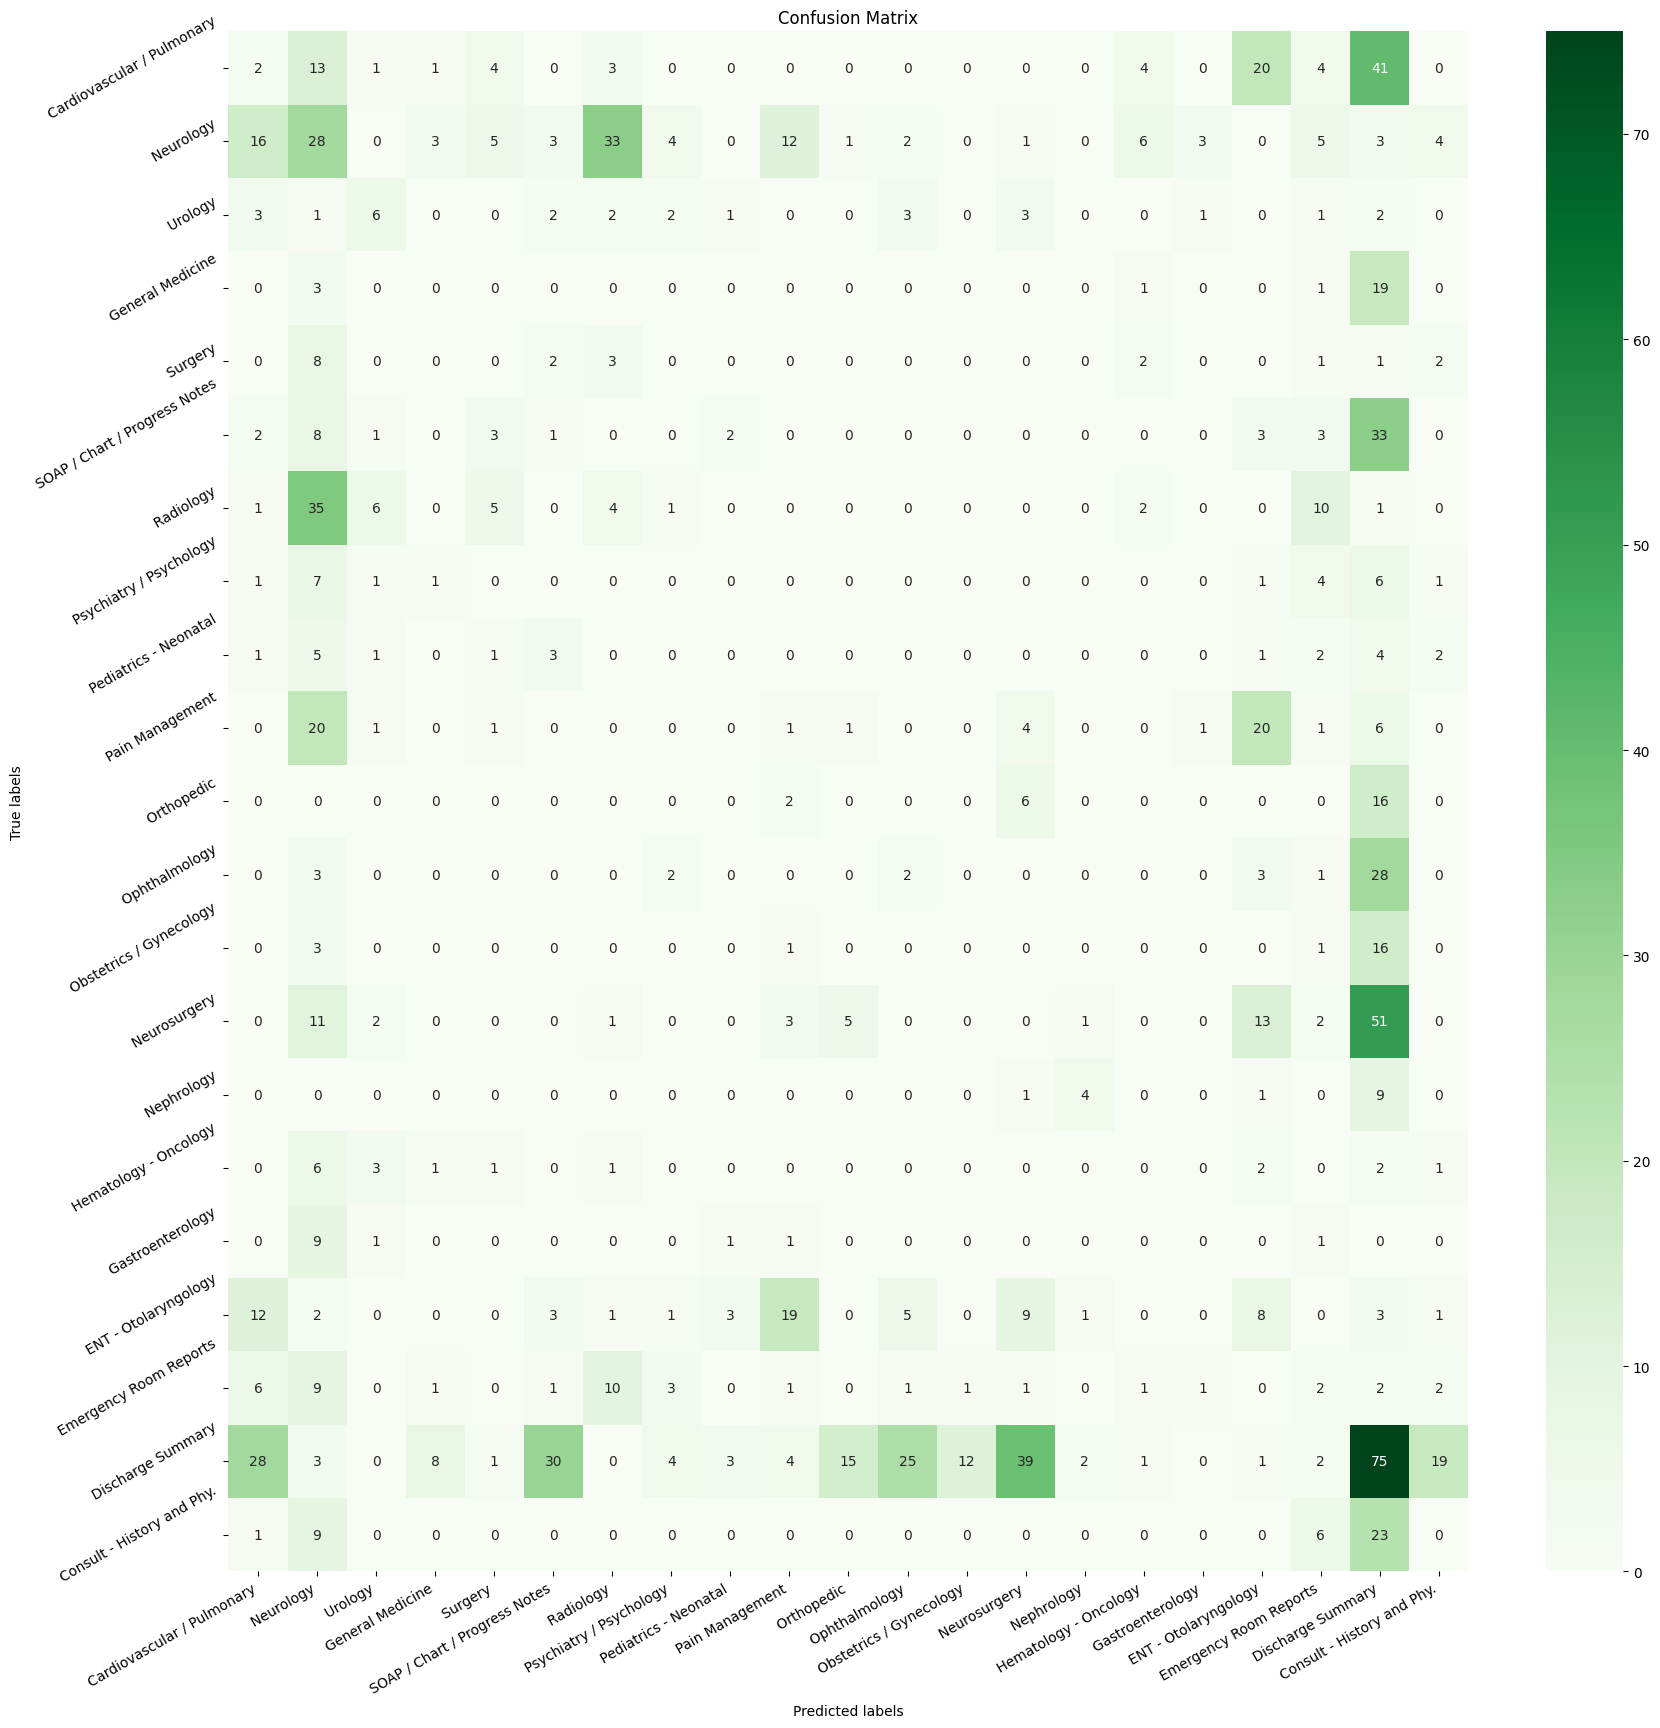

In [54]:
labels_cm_bow_xgb = category_list_bow
cm = confusion_matrix(y_test_encoded, y_pred_xgb_bow)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_xgb); ax.yaxis.set_ticklabels(labels_cm_bow_xgb);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>4. LightGBM:</h5>

In [55]:
bow_lgb_model = lgb.LGBMClassifier(random_state=1)
bow_lgb_model.fit(X_train_bow, y_train_bow)
y_pred_lgb_bow = bow_lgb_model.predict(X_test_bow)
print(classification_report(y_test_bow, y_pred_lgb_bow))

accuracy_lgb_bow = accuracy_score(y_test_bow, y_pred_lgb_bow)
print("Accuracy:", accuracy_lgb_bow)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 119850
[LightGBM] [Info] Number of data points in the train set: 3447, number of used features: 470
[LightGBM] [Info] Start training from score -2.517638
[LightGBM] [Info] Start training from score -2.186835
[LightGBM] [Info] Start training from score -3.750810
[LightGBM] [Info] Start training from score -3.868593
[LightGBM] [Info] Start training from score -4.119908
[LightGBM] [Info] Start training from score -3.021296
[LightGBM] [Info] Start training from score -2.877401
[LightGBM] [Info] Start training from score -3.925752
[LightGBM] [Info] Start training from score -4.034386
[LightGBM] [Info] Start training from score -3.027266
[LightGBM] [Info] Start training from score -3.896764
[LightGBM] [Info] Start training from score -3.391669
[LightGBM] [Info] Start training from score -4.018125
[LightG

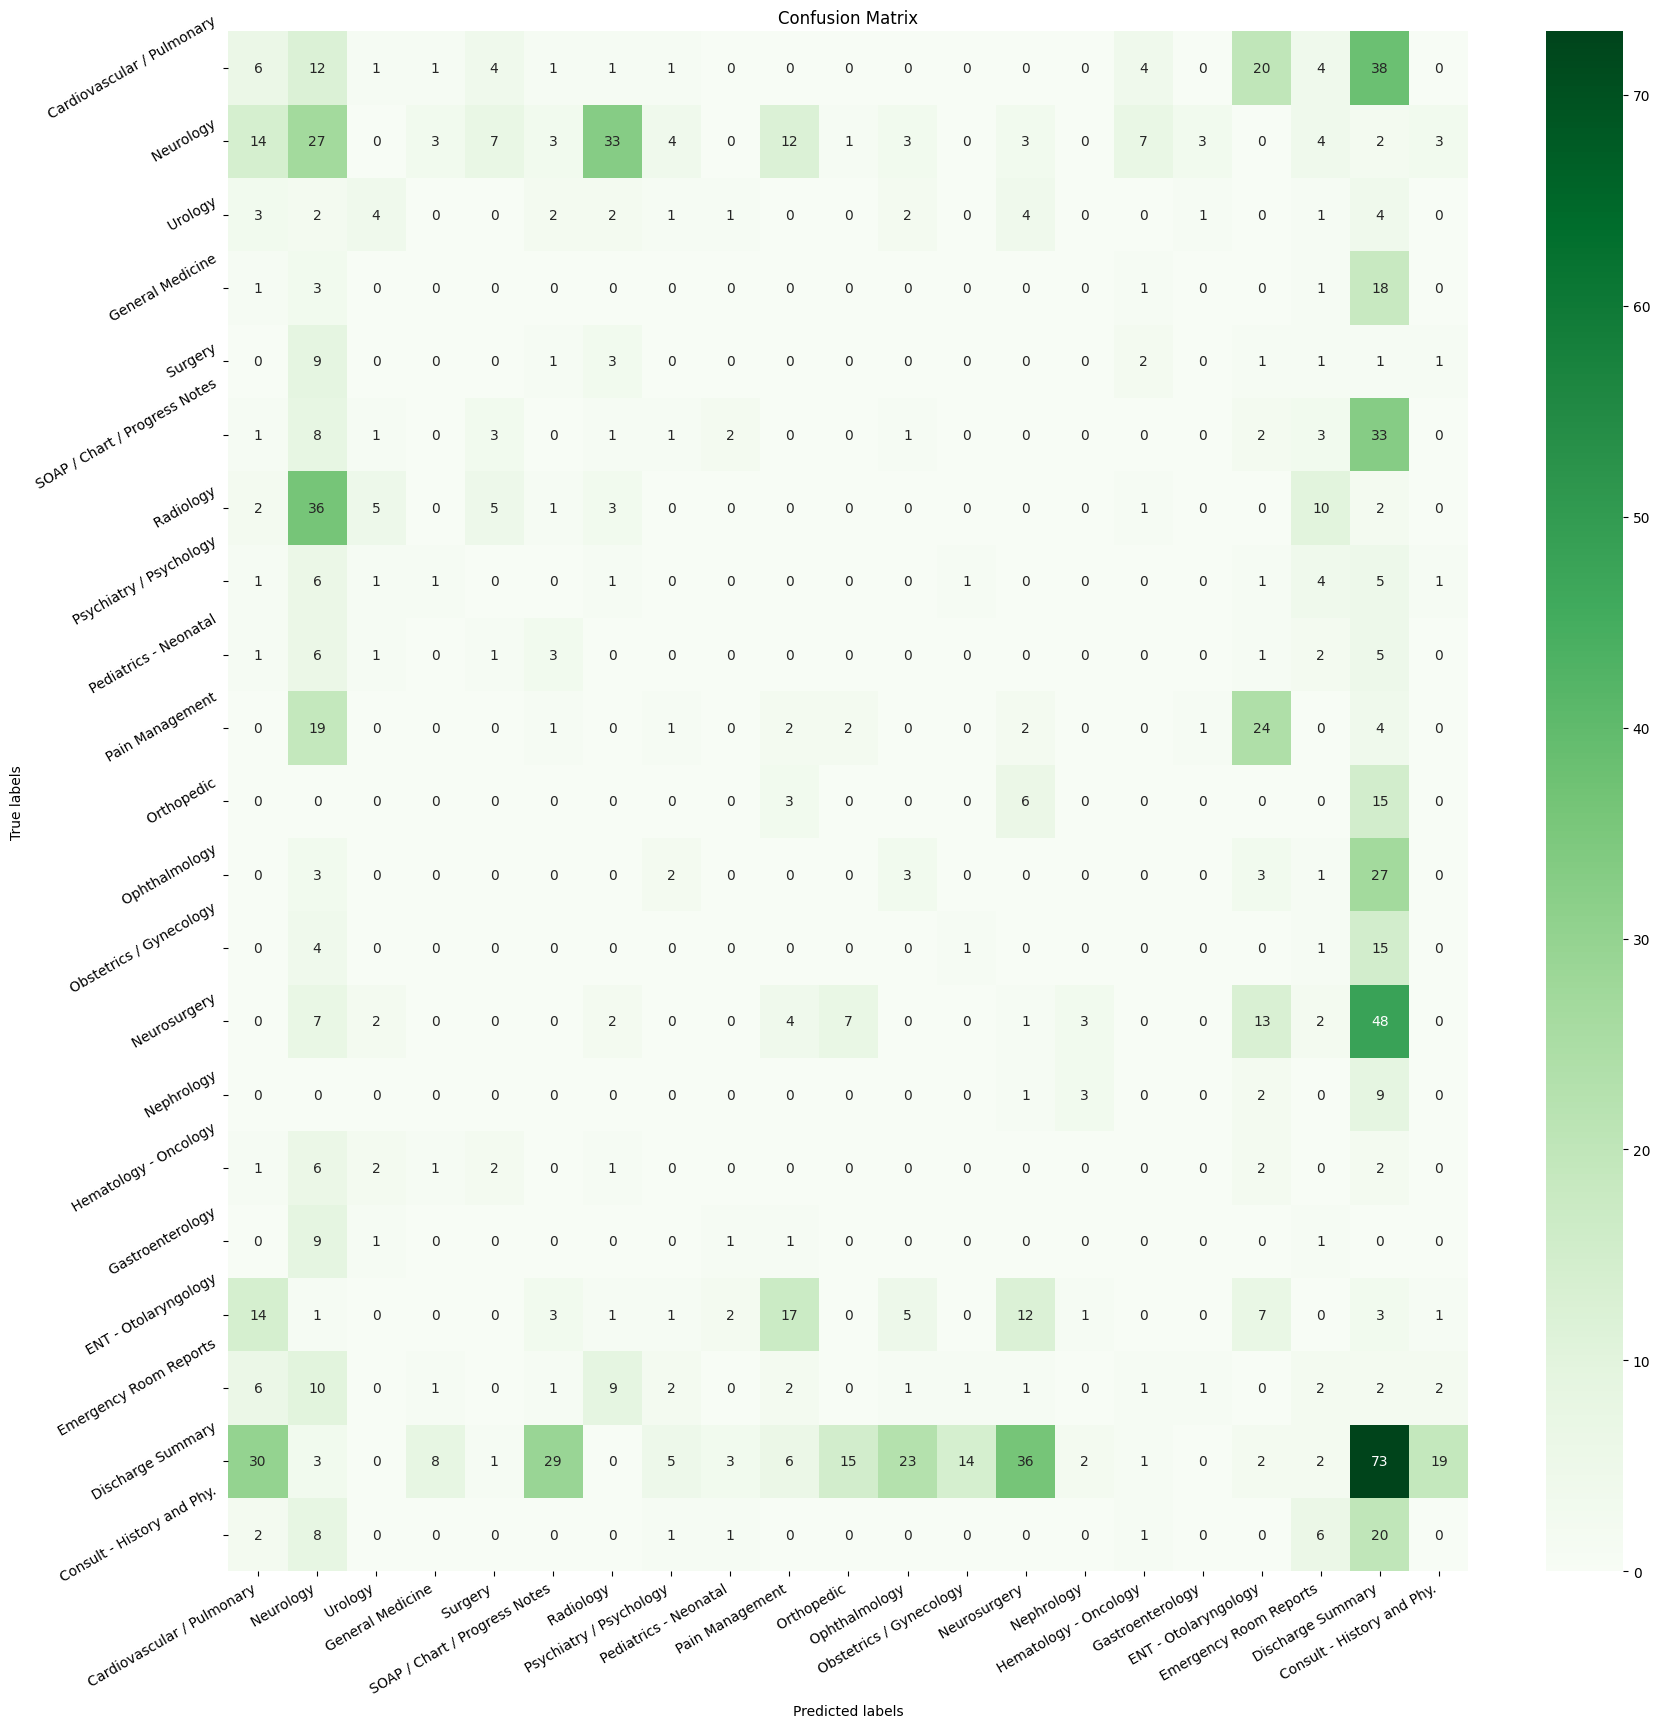

In [56]:
labels_cm_bow_lgbm = category_list_bow
cm = confusion_matrix(y_test_bow, y_pred_lgb_bow)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_lgbm); ax.yaxis.set_ticklabels(labels_cm_bow_lgbm);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>5. Multinomial NB:</h5>

In [57]:
X_train_nb_bow, X_test_nb_bow, y_train_nb_bow, y_test_nb_bow = train_test_split(bow_matrix.toarray(), labels_bow, stratify=labels_bow, random_state=1)

bow_nb_model = MultinomialNB()
bow_nb_model.fit(X_train_nb_bow, y_train_nb_bow)
y_pred_nb_bow = bow_nb_model.predict(X_test_nb_bow)
print(classification_report(y_test_nb_bow, y_pred_nb_bow, zero_division=1))

accuracy_nb_bow = accuracy_score(y_test_nb_bow, y_pred_nb_bow)
print("Accuracy:", accuracy_nb_bow)

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.35      0.25      0.29        93
    Consult - History and Phy.       0.32      0.54      0.40       129
             Discharge Summary       0.46      0.63      0.53        27
          ENT - Otolaryngology       0.54      0.29      0.38        24
        Emergency Room Reports       0.13      0.11      0.12        19
              Gastroenterology       0.37      0.29      0.32        56
              General Medicine       0.13      0.09      0.11        65
         Hematology - Oncology       0.00      0.00      1.00        22
                    Nephrology       0.25      0.05      0.08        20
                     Neurology       0.46      0.38      0.41        56
                  Neurosurgery       0.27      0.50      0.35        24
       Obstetrics / Gynecology       0.21      0.26      0.23        39
                 Ophthalmology       0.48      0.67      0.56  

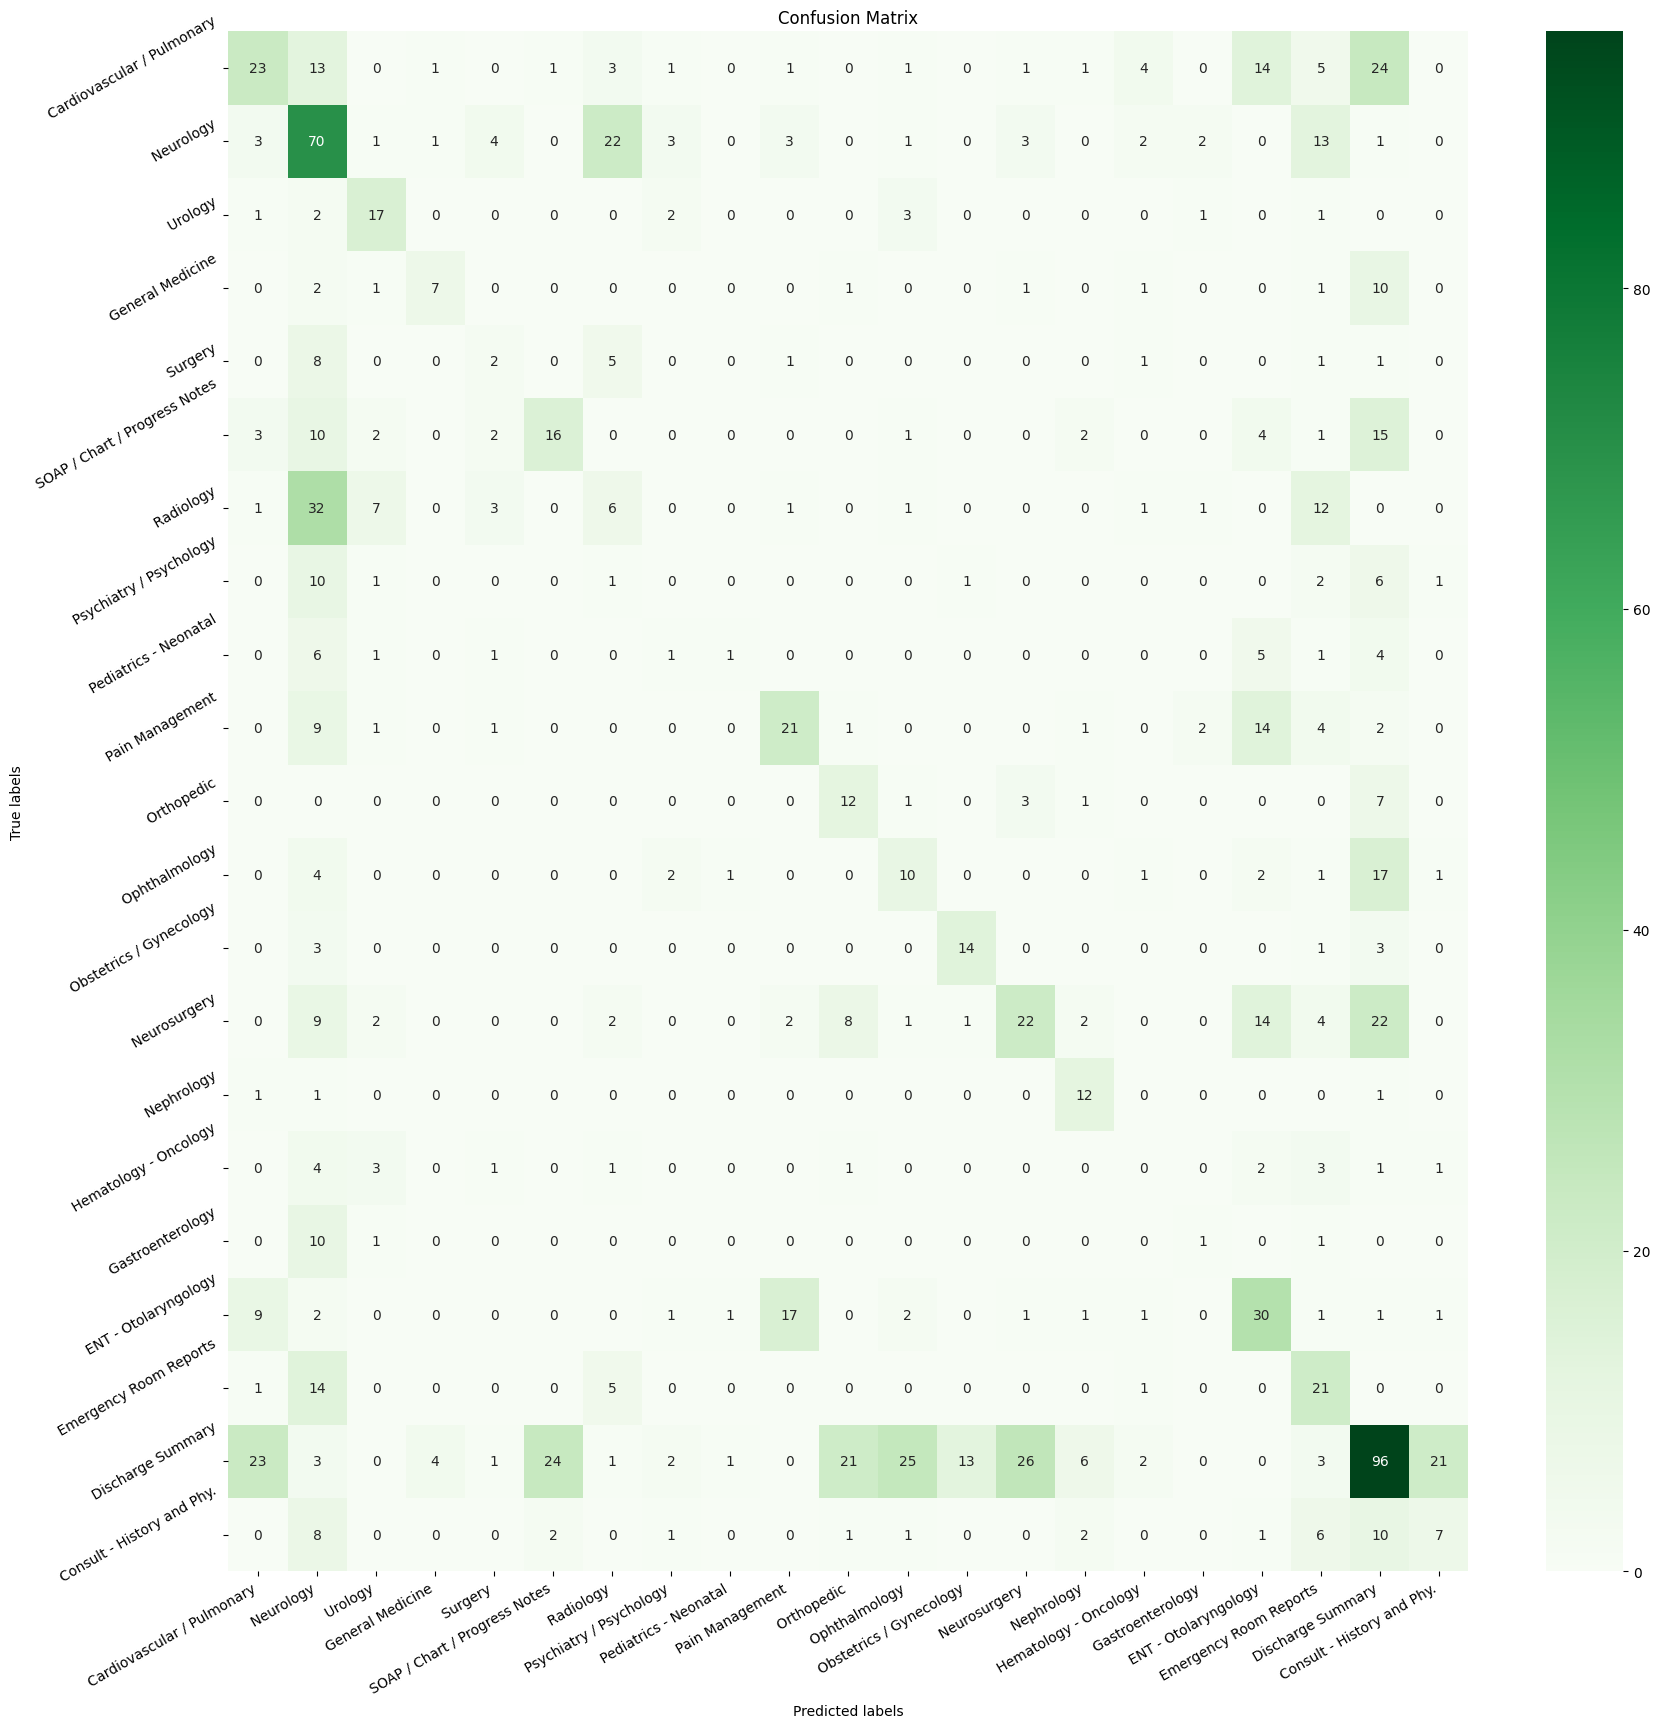

In [58]:
labels_cm_bow_nb = category_list_bow
cm = confusion_matrix(y_test_nb_bow, y_pred_nb_bow)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_nb); ax.yaxis.set_ticklabels(labels_cm_bow_nb);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h2>Second Phase (Second Paragraph)</h2>

<h3>Feature Extraction</h3>

<h4>TF-IDF:</h4>

In [59]:
tfidfVectorizer_2 = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat_2  = tfidfVectorizer_2.fit_transform(ner_model_df['ner_named_entity'].tolist())
tfidf_feature_names_2 = sorted(tfidfVectorizer_2.get_feature_names_out())
print(tfidf_feature_names_2)

['000', '000 epinephrine', '10', '10 mcg', '10 mg', '10 units', '10 units subcutaneous', '100', '100 000', '100 000 epinephrine', '100 mg', '1000', '1000 mg', '125', '125 mg', '141', '145', '145 mg', '150', '150 mg', '1500', '1500 twice', '20', '20 meq', '20 mg', '20 ml', '200', '200 000', '200 000 epinephrine', '240', '240 mg', '25', '25 mg', '300', '300 mg', '375', '375 mg', '40', '40 mg', '450', '450 mg', '50', '50 mg', '600', '600 mg', '75', '75 mg', '800', '800 mg', '81', '81 mg', '90', '90 mg', 'abdominal', 'abdominal pain', 'abductovalgus', 'abilify', 'abilify mg', 'abnormalities', 'abscess', 'abscessed', 'abuse', 'aches', 'acidosis', 'adhd', 'agitation', 'albuterol', 'alcohol', 'allergies', 'allergy', 'ama', 'amoxicillin', 'anastomotic', 'anastomotic stricture', 'anorexia', 'antacid', 'anxiety', 'artery', 'artery disease', 'arthritis', 'asa', 'aspirin', 'aspirin 81', 'aspirin 81 mg', 'aspirin tablet', 'asystole', 'atrial', 'atrial fibrillation', 'atrovent', 'av', 'av dissociati

<h4>Bag-of-Words (CountVectorizer):</h4>

In [61]:
# CountVectorizer (Bag-of-Words)
countVectorizer_2 = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3), max_df=0.75, max_features=1000)
bow_matrix_2 = countVectorizer_2.fit_transform(ner_model_df['ner_named_entity'].tolist())
bow_feature_names_2 = sorted(countVectorizer_2.get_feature_names_out())
print(bow_feature_names_2)

['000', '000 epinephrine', '10', '10 mcg', '10 mg', '10 units', '10 units subcutaneous', '100', '100 000', '100 000 epinephrine', '100 mg', '1000', '1000 mg', '125', '125 mg', '141', '145', '145 mg', '150', '150 mg', '1500', '1500 twice', '20', '20 meq', '20 mg', '20 ml', '200', '200 000', '200 000 epinephrine', '240', '240 mg', '25', '25 mg', '300', '300 mg', '375', '375 mg', '40', '40 mg', '450', '450 mg', '50', '50 mg', '600', '600 mg', '75', '75 mg', '800', '800 mg', '81', '81 mg', '90', '90 mg', 'abdominal', 'abdominal pain', 'abductovalgus', 'abilify', 'abilify mg', 'abnormalities', 'abscess', 'abscessed', 'abuse', 'aches', 'acidosis', 'adhd', 'agitation', 'albuterol', 'alcohol', 'allergies', 'allergy', 'ama', 'amoxicillin', 'anastomotic', 'anastomotic stricture', 'anorexia', 'antacid', 'anxiety', 'artery', 'artery disease', 'arthritis', 'asa', 'aspirin', 'aspirin 81', 'aspirin 81 mg', 'aspirin tablet', 'asystole', 'atrial', 'atrial fibrillation', 'atrovent', 'av', 'av dissociati

<h3>PCA (Principal Component Analysis)</h3>

In [81]:
gc.collect()
pca = PCA(n_components=0.95)

**For** **TF-IDF:**

In [128]:
tfIdfMat_reduced_2 = pca.fit_transform(tfIdfMat_2.toarray())
labels_tfIdfMat_2 = ner_model_df['ner_category_label'].tolist()
category_list_tfIdf_2 = ner_model_df['ner_category_label'].unique()

**For** **BOW:**

In [129]:
bow_reduced_2 = pca.fit_transform(bow_matrix_2.toarray())
labels_bow_2 = ner_model_df['ner_category_label'].tolist()
category_list_bow_2 = ner_model_df['ner_category_label'].unique()

<h3>Implement Algorithms & Architecture</h3>

<h4>With TF-IDF:</h4>

In [92]:
X_train_tfIdf_2, X_test_tfIdf_2, y_train_tfIdf_2, y_test_tfIdf_2 = train_test_split(tfIdfMat_reduced_2, labels_tfIdfMat_2, stratify=labels_tfIdfMat_2, random_state=1)   
print('Train_Set_Size:'+str(X_train_tfIdf_2.shape))
print('Test_Set_Size:'+str(X_test_tfIdf_2.shape))

Train_Set_Size:(1511, 249)
Test_Set_Size:(504, 249)


<h5>Ensemble Learning</h5>

In [93]:
def create_cnn_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def create_lstm_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = LSTM(50, return_sequences=True)(x)
    x = LSTM(50)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_gru_tfIdf(input_shape, vocab_size, embedding_dim):
    input_layer = Input(shape=input_shape)
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_layer)
    x = GRU(50, return_sequences=True)(x)
    x = GRU(50)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def create_ensemble_tfIdf(input_shape, vocab_size, embedding_dim, num_classes):
    cnn = create_cnn_tfIdf(input_shape, vocab_size, embedding_dim)
    lstm = create_lstm_tfIdf(input_shape, vocab_size, embedding_dim)
    gru = create_gru_tfIdf(input_shape, vocab_size, embedding_dim)

    concatenated = concatenate([cnn.output, lstm.output, gru.output])
    x = Dense(100, activation='relu')(concatenated)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[cnn.input, lstm.input, gru.input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_shape = X_train_tfIdf_2.shape[1]
num_classes = len(category_list_tfIdf_2)
vocab_size = len(category_list_tfIdf_2)
embedding_dim = 50

# Creating model
model_ensemble_tfIdf_2 = create_ensemble_tfIdf(input_shape, vocab_size, embedding_dim, num_classes)
model_ensemble_tfIdf_2.summary()

# LabelEncoder:
label_encoder = LabelEncoder()
y_train_encoded_ensemble_tfIdf_2 = label_encoder.fit_transform(y_train_tfIdf_2)
y_test_encoded_ensemble_tfIdf_2 = label_encoder.transform(y_test_tfIdf_2)

# Train model
history_ensemble_tfIdf_2 = model_ensemble_tfIdf_2.fit([X_train_tfIdf_2, X_train_tfIdf_2, X_train_tfIdf_2], y_train_encoded_ensemble_tfIdf_2, epochs=1, batch_size=32)

# Predict
y_pred_ensemble_tfIdf_2 = model_ensemble_tfIdf_2.predict([X_test_tfIdf_2, X_test_tfIdf_2, X_test_tfIdf_2])
y_pred_ensemble_tfIdf_2 = np.argmax(y_pred_ensemble_tfIdf_2, axis=1)

print(classification_report(y_test_encoded_ensemble_tfIdf_2, y_pred_ensemble_tfIdf_2, target_names=category_list_tfIdf_2, zero_division=1))

accuracy_ensemble_tfIdf_2 = accuracy_score(y_test_encoded_ensemble_tfIdf_2, y_pred_ensemble_tfIdf_2)
print("Accuracy:", accuracy_ensemble_tfIdf_2)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 249)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 249, 50)              150       ['input_10[0][0]']            
                                                                                                  
 input_11 (InputLayer)       [(None, 249)]                0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 249)]                0         []                            
                                                                                           

<h5>1. LogisticRegression</h5>

In [99]:
tfIdf_lr_model_2 = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train_tfIdf_2, y_train_tfIdf_2)
y_pred_lr_tfIdf_2 = tfIdf_lr_model_2.predict(X_test_tfIdf_2)
print(classification_report(y_test_tfIdf_2, y_pred_lr_tfIdf_2, labels=category_list_tfIdf_2, zero_division=1))

accuracy_lr_tfIdf_2 = accuracy_score(y_test_tfIdf_2, y_pred_lr_tfIdf_2)
print("Accuracy:", accuracy_lr_tfIdf_2)

              precision    recall  f1-score   support

   DRUG_DOSE       1.00      0.37      0.54        19
     DISEASE       0.96      1.00      0.98       316
    CHEMICAL       0.94      0.93      0.93       169

    accuracy                           0.95       504
   macro avg       0.97      0.77      0.82       504
weighted avg       0.95      0.95      0.95       504

Accuracy: 0.9523809523809523


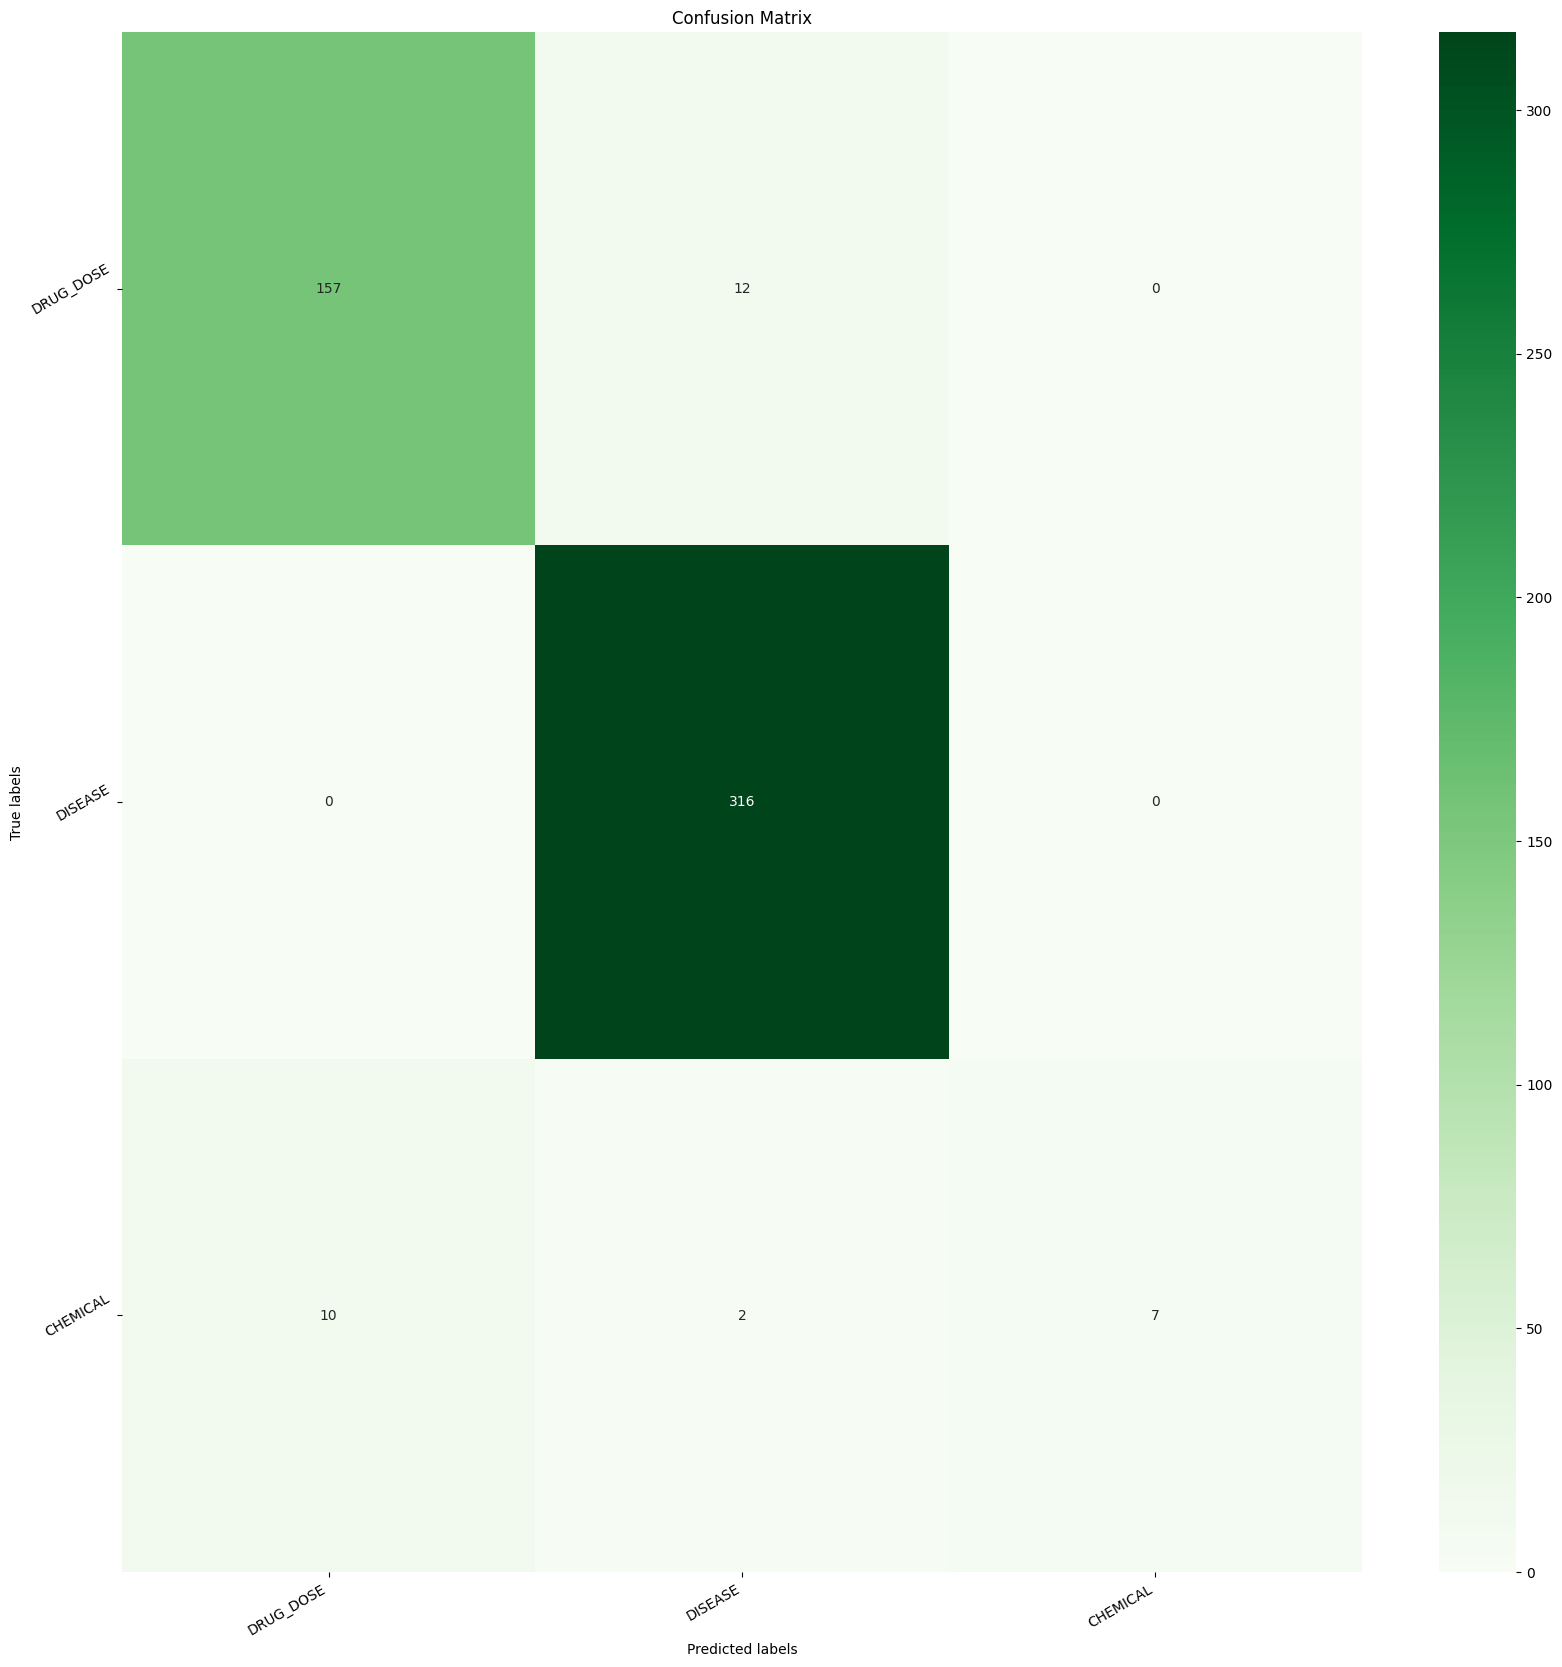

In [100]:
labels_cm_tfIdf_lg_2 = category_list_tfIdf_2
cm = confusion_matrix(y_test_tfIdf_2, y_pred_lr_tfIdf_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_lg_2); ax.yaxis.set_ticklabels(labels_cm_tfIdf_lg_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>2. RandomForest:</h5>

In [101]:
tfIdf_rf_model_2 = RandomForestClassifier(random_state=1)
tfIdf_rf_model_2.fit(X_train_tfIdf_2, y_train_tfIdf_2)
y_pred_rf_tfIdf_2 = tfIdf_rf_model_2.predict(X_test_tfIdf_2)
print(classification_report(y_test_tfIdf_2, y_pred_rf_tfIdf_2))

accuracy_rf_tfIdf_2 = accuracy_score(y_test_tfIdf_2, y_pred_rf_tfIdf_2)
print("Accuracy:", accuracy_rf_tfIdf_2)

              precision    recall  f1-score   support

    CHEMICAL       0.97      0.97      0.97       169
     DISEASE       0.97      1.00      0.99       316
   DRUG_DOSE       1.00      0.53      0.69        19

    accuracy                           0.97       504
   macro avg       0.98      0.83      0.88       504
weighted avg       0.97      0.97      0.97       504

Accuracy: 0.9722222222222222


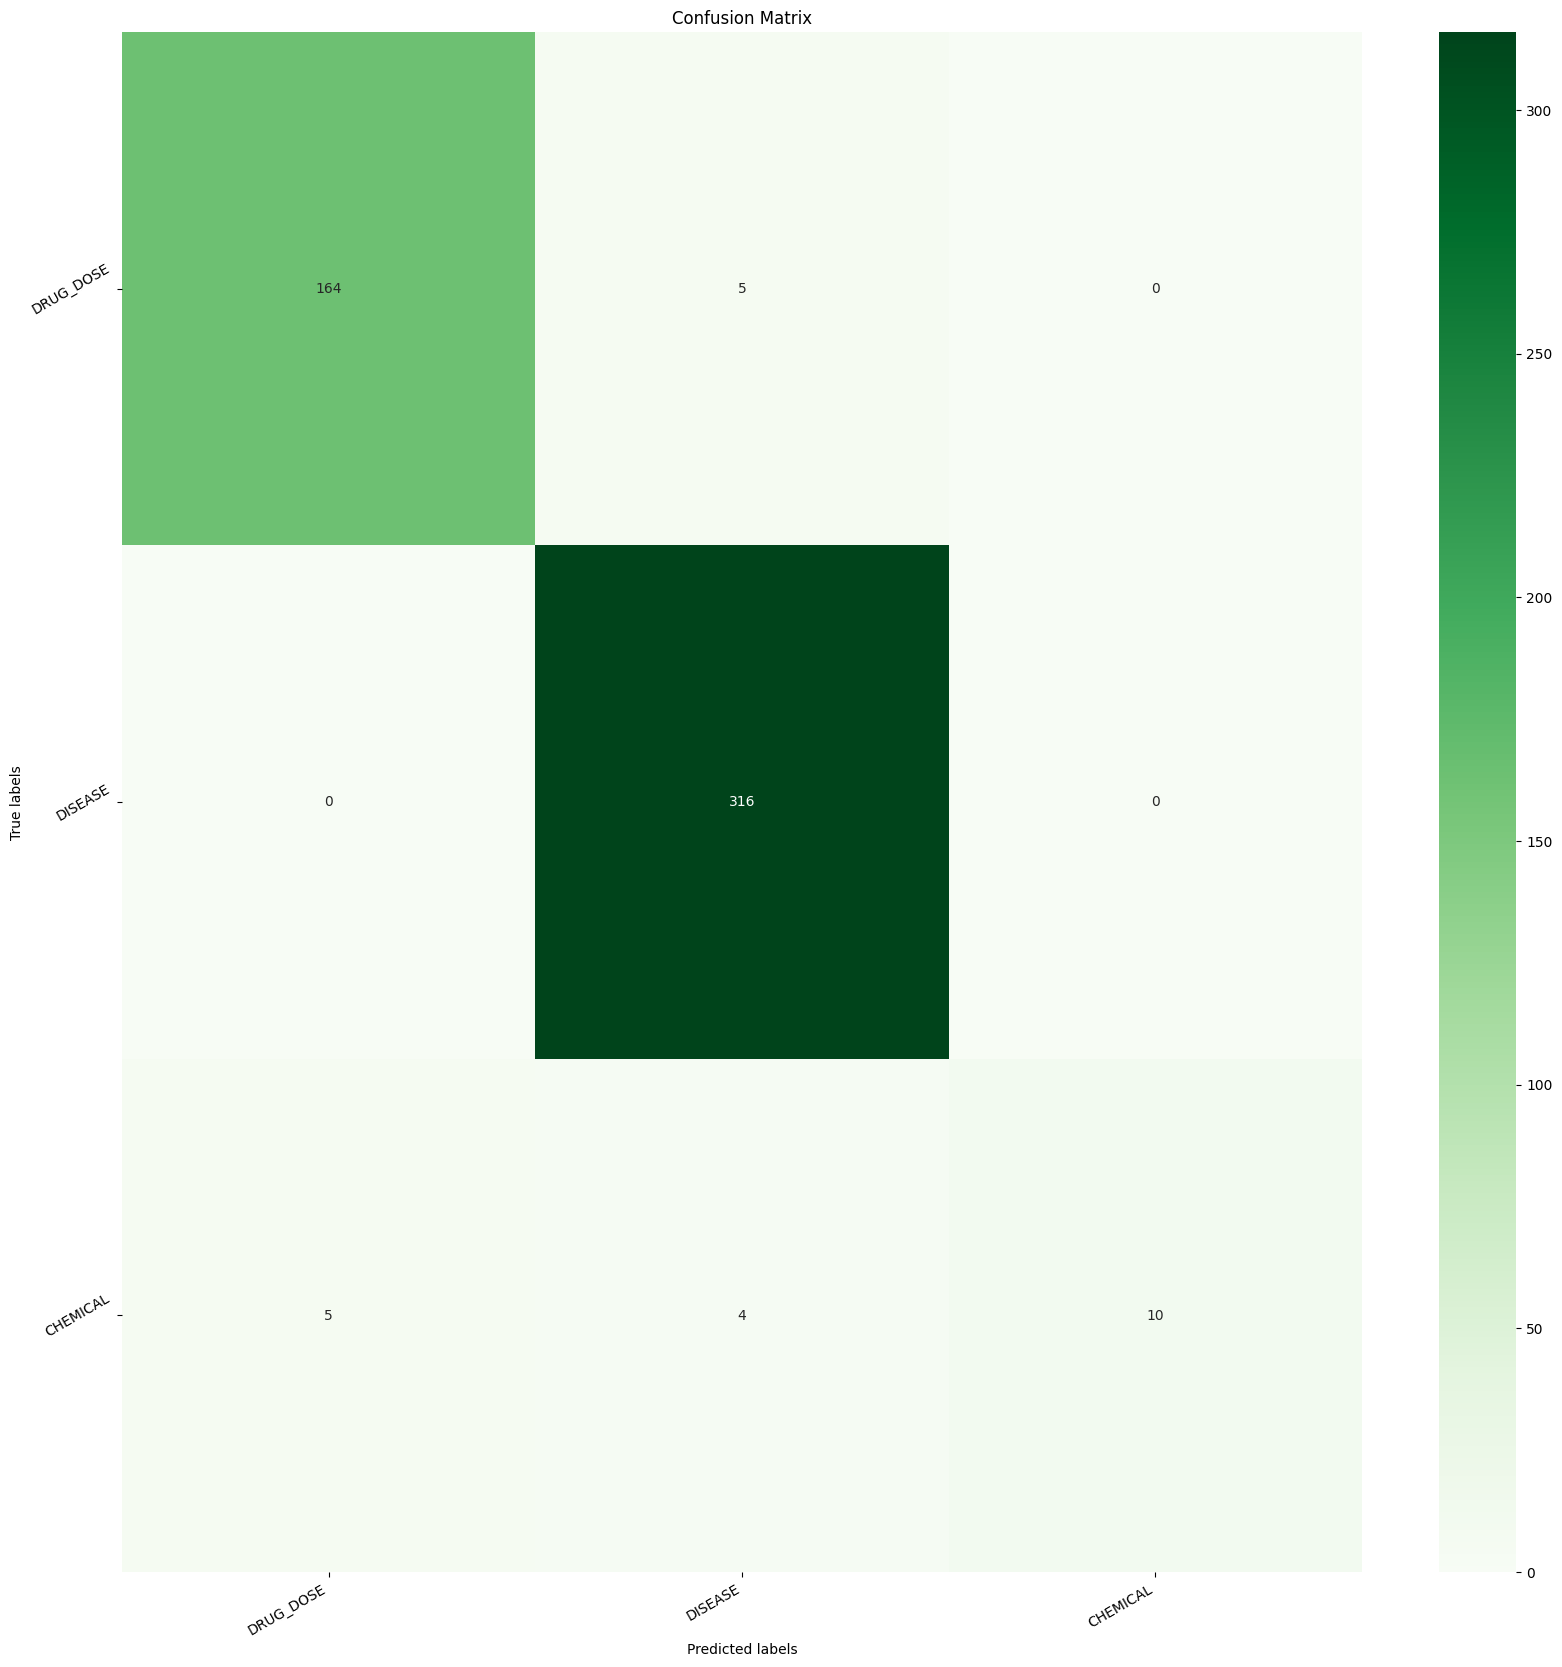

In [102]:
labels_cm_tfIdf_rf_2 = category_list_tfIdf_2
cm = confusion_matrix(y_test_tfIdf_2, y_pred_rf_tfIdf_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_rf_2); ax.yaxis.set_ticklabels(labels_cm_tfIdf_rf_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>3. XGBoost:</h5>

In [103]:
from sklearn.preprocessing import LabelEncoder

tfIdf_xgb_model_2 = xgb.XGBClassifier(random_state=1)
label_encoder = LabelEncoder()

# Sınıf etiketlerini sayısal değerlere dönüştürme
y_train_encoded_2 = label_encoder.fit_transform(y_train_tfIdf_2)
tfIdf_xgb_model_2.fit(X_train_tfIdf_2, y_train_encoded_2)

y_test_encoded_2 = label_encoder.transform(y_test_tfIdf_2)
y_pred_xgb_tfIdf_2 = tfIdf_xgb_model_2.predict(X_test_tfIdf_2)

print(classification_report(y_test_encoded_2, y_pred_xgb_tfIdf_2))

accuracy_xgb_tfIdf_2 = accuracy_score(y_test_encoded_2, y_pred_xgb_tfIdf_2)
print("Accuracy:", accuracy_xgb_tfIdf_2)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       169
           1       0.98      1.00      0.99       316
           2       1.00      0.63      0.77        19

    accuracy                           0.97       504
   macro avg       0.98      0.87      0.91       504
weighted avg       0.97      0.97      0.97       504

Accuracy: 0.9742063492063492


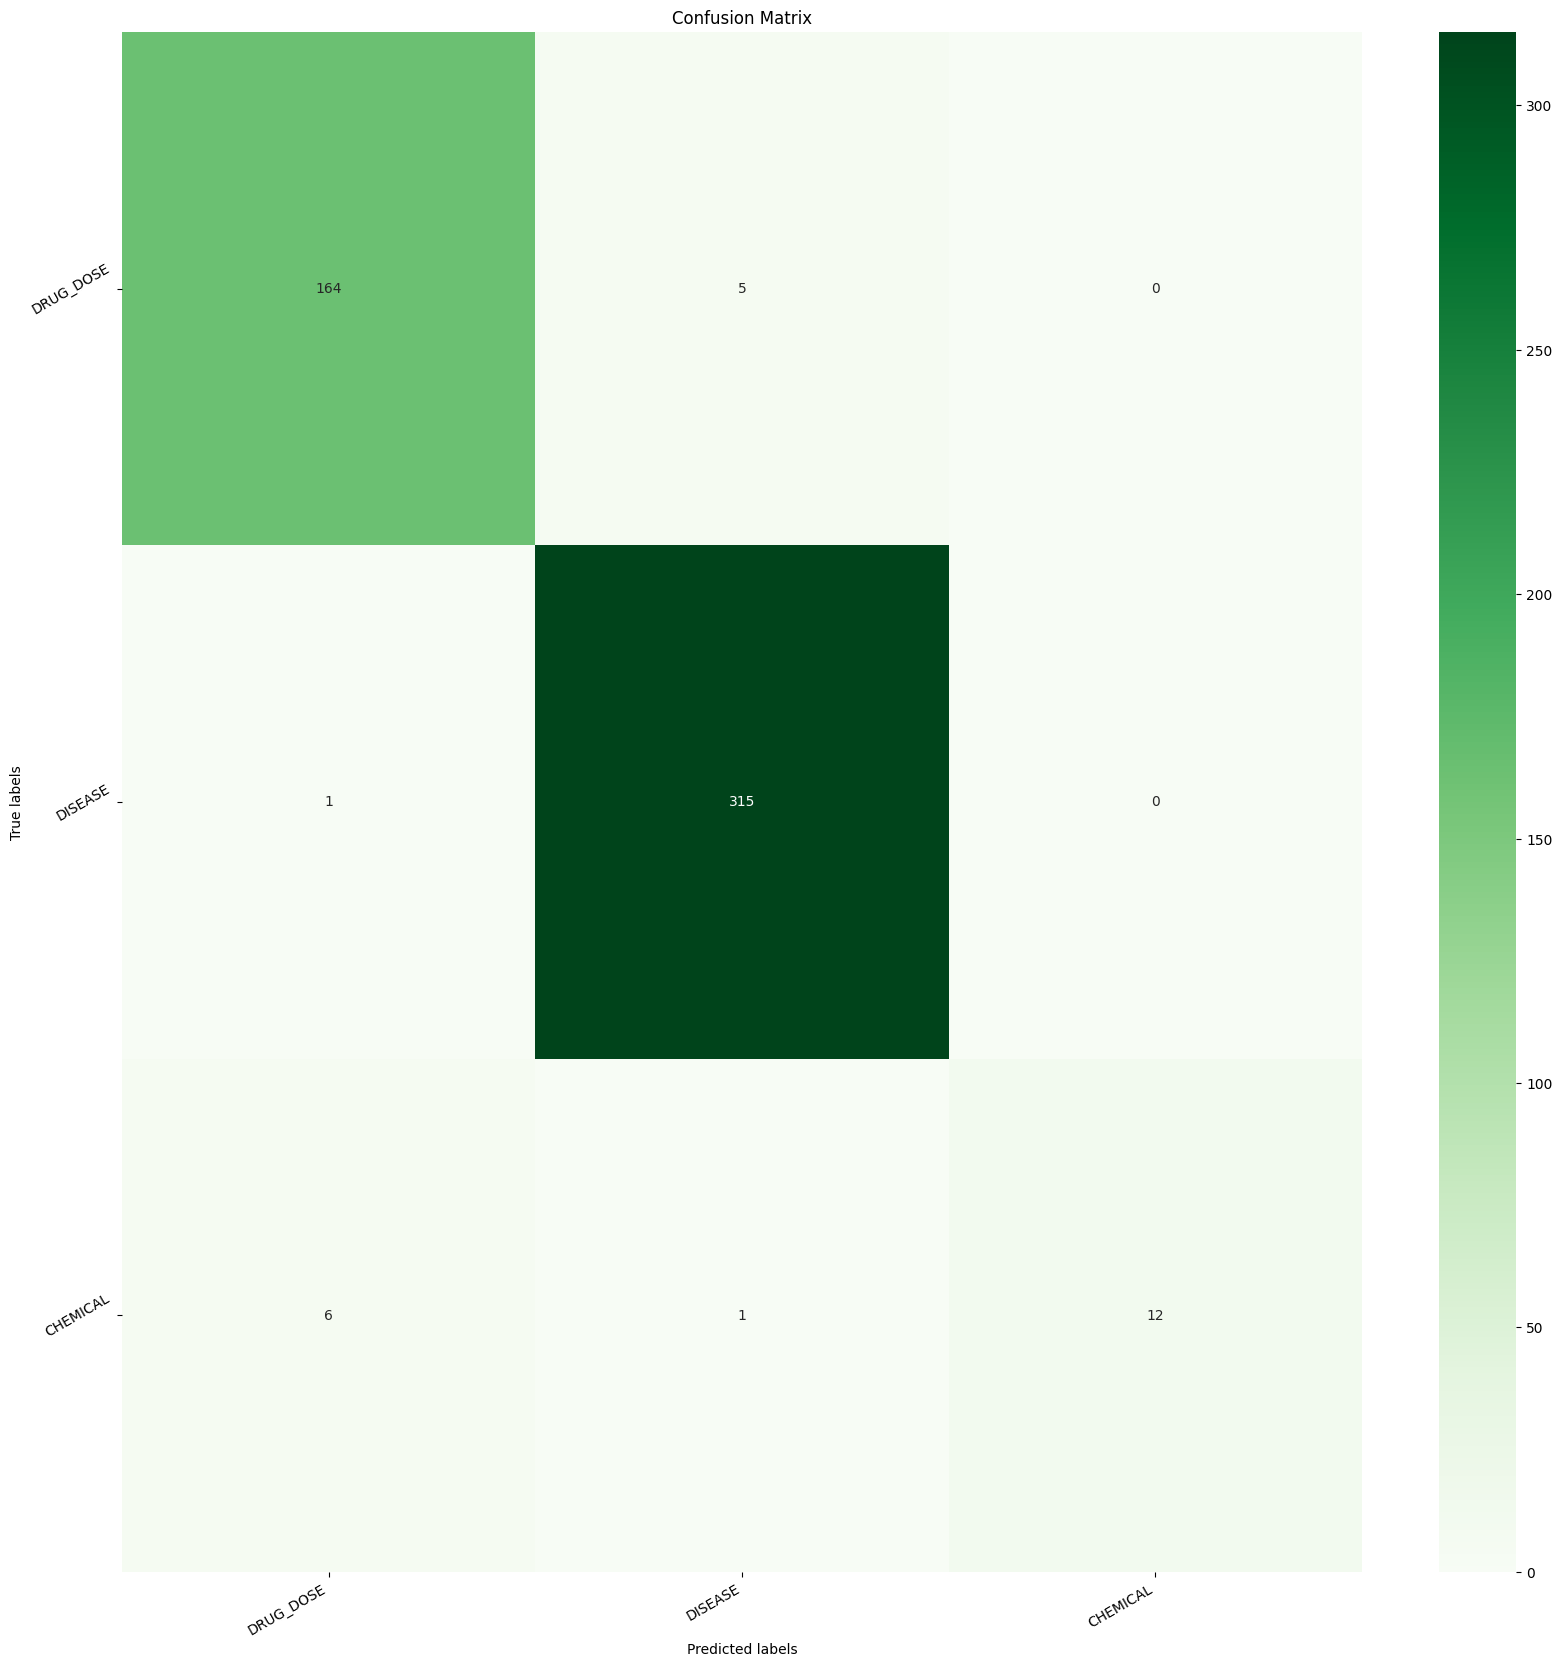

In [104]:
labels_cm_tfIdf_xgb_2 = category_list_tfIdf_2
cm = confusion_matrix(y_test_encoded_2, y_pred_xgb_tfIdf_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_xgb_2); ax.yaxis.set_ticklabels(labels_cm_tfIdf_xgb_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>4. LightGBM:</h5>

In [106]:
tfIdf_lgb_model_2 = lgb.LGBMClassifier(random_state=1)
tfIdf_lgb_model_2.fit(X_train_tfIdf_2, y_train_tfIdf_2)
y_pred_lgb_tfIdf_2 = tfIdf_lgb_model_2.predict(X_test_tfIdf_2)
print(classification_report(y_test_tfIdf_2, y_pred_lgb_tfIdf_2))

accuracy_lgb_tfIdf_2 = accuracy_score(y_test_tfIdf_2, y_pred_lgb_tfIdf_2)
print("Accuracy:", accuracy_lgb_tfIdf_2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 63193
[LightGBM] [Info] Number of data points in the train set: 1511, number of used features: 249
[LightGBM] [Info] Start training from score -1.095969
[LightGBM] [Info] Start training from score -0.465118
[LightGBM] [Info] Start training from score -3.277476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

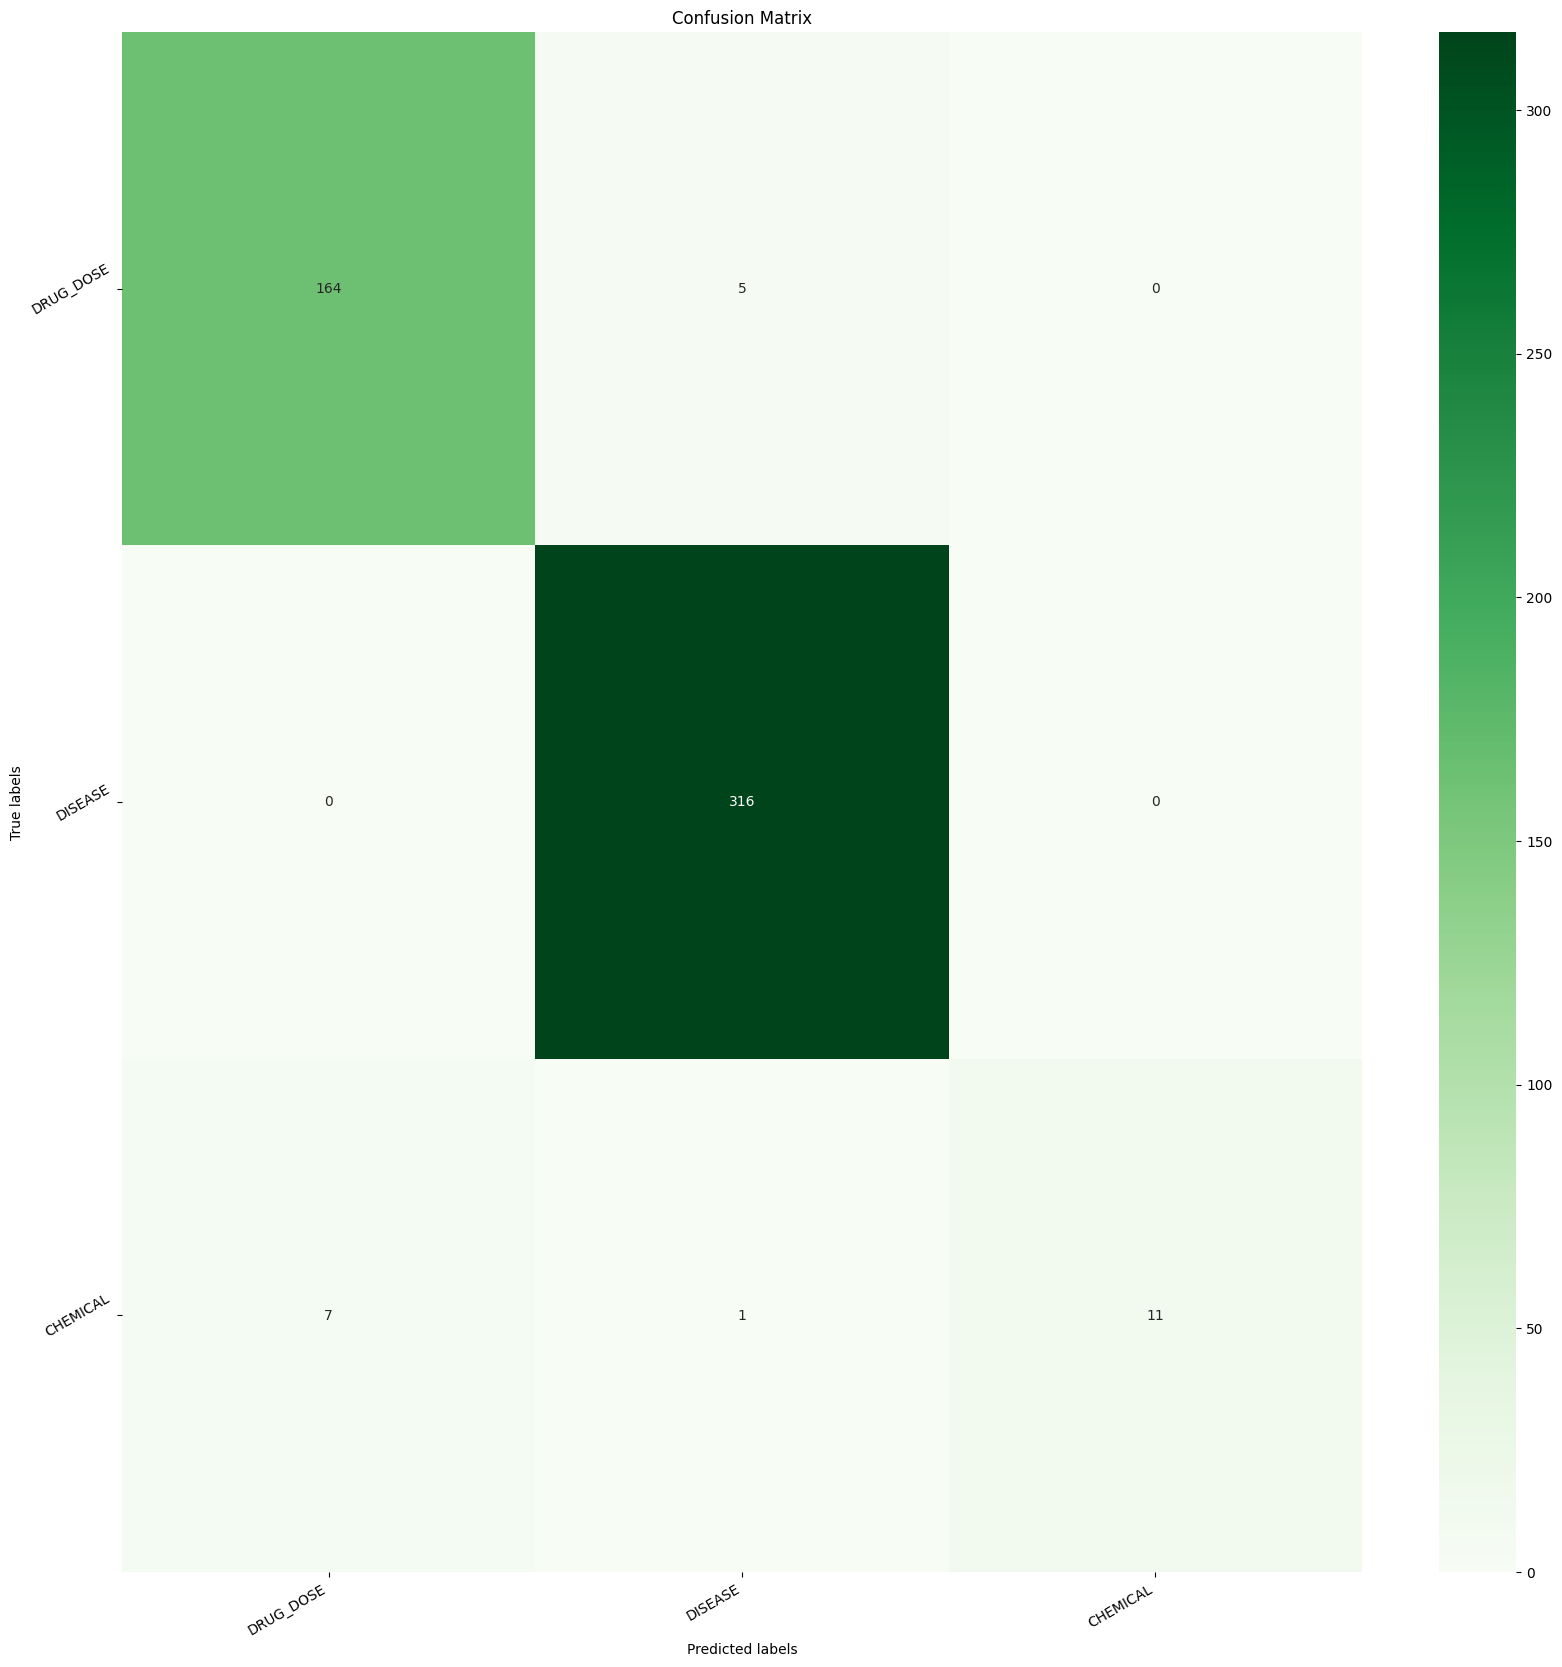

In [107]:
labels_cm_tfIdf_lgbm_2 = category_list_tfIdf_2
cm = confusion_matrix(y_test_tfIdf_2, y_pred_lgb_tfIdf_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_lgbm_2); ax.yaxis.set_ticklabels(labels_cm_tfIdf_lgbm_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>5. Multinomial NB:</h5>

In [108]:
X_train_nb_tfIdf_2, X_test_nb_tfIdf_2, y_train_nb_tfIdf_2, y_test_nb_tfIdf_2 = train_test_split(tfIdfMat_2.toarray(), labels_tfIdfMat_2, stratify=labels_tfIdfMat_2, random_state=1)

tfIdf_nb_model_2 = MultinomialNB()
tfIdf_nb_model_2.fit(X_train_nb_tfIdf_2, y_train_nb_tfIdf_2)
y_pred_nb_tfIdf_2 = tfIdf_nb_model_2.predict(X_test_nb_tfIdf_2)
print(classification_report(y_test_nb_tfIdf_2, y_pred_nb_tfIdf_2, zero_division=1))

accuracy_nb_tfIdf_2 = accuracy_score(y_test_nb_tfIdf_2, y_pred_nb_tfIdf_2)
print("Accuracy:", accuracy_nb_tfIdf_2)

              precision    recall  f1-score   support

    CHEMICAL       0.89      0.94      0.91       169
     DISEASE       0.97      1.00      0.98       316
   DRUG_DOSE       1.00      0.00      0.00        19

    accuracy                           0.94       504
   macro avg       0.95      0.65      0.63       504
weighted avg       0.94      0.94      0.92       504

Accuracy: 0.9404761904761905


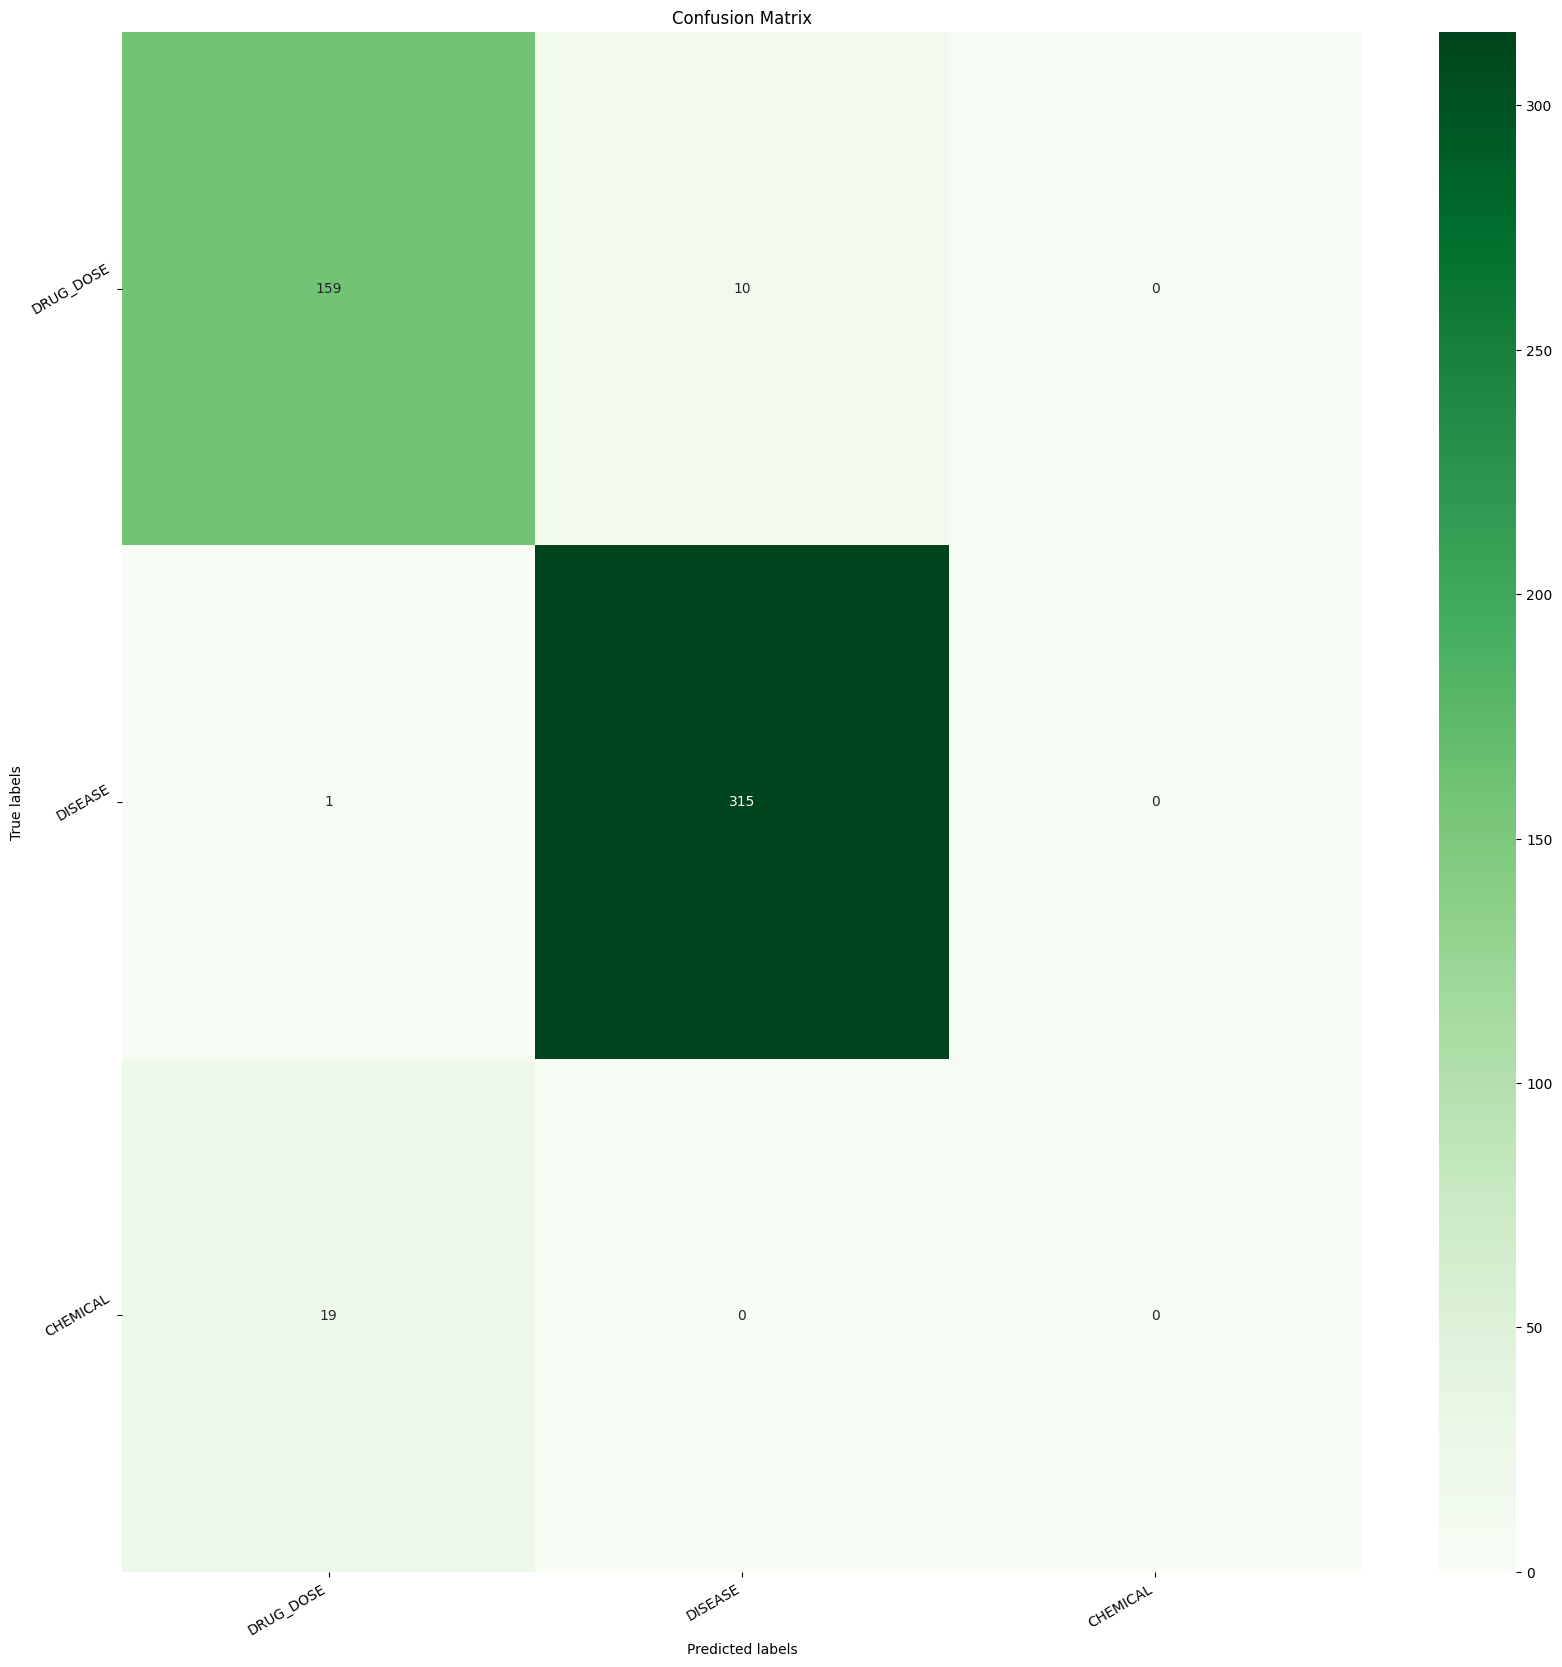

In [109]:
labels_cm_tfIdf_nb_2 = category_list_tfIdf_2
cm = confusion_matrix(y_test_nb_tfIdf_2, y_pred_nb_tfIdf_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_tfIdf_nb_2); ax.yaxis.set_ticklabels(labels_cm_tfIdf_nb_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h4>With BOW:</h4>

In [110]:
X_train_bow_2, X_test_bow_2, y_train_bow_2, y_test_bow_2 = train_test_split(bow_reduced_2, labels_bow_2, stratify=labels_bow_2, random_state=1)   
print('Train_Set_Size:'+str(X_train_bow_2.shape))
print('Test_Set_Size:'+str(X_test_bow_2.shape))

Train_Set_Size:(1511, 252)
Test_Set_Size:(504, 252)


<h5>Ensemble Learning</h5>

In [111]:
def create_cnn_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_lstm_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

def create_gru_bow(input_shape, num_classes):
    input_layer = Input(shape=(input_shape,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(64, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

# Ensemble modeli oluşturma
def create_ensemble_bow(input_shape, num_classes):
    cnn = create_cnn_bow(input_shape, num_classes)
    lstm = create_lstm_bow(input_shape, num_classes)
    gru = create_gru_bow(input_shape, num_classes)

    concatenated = concatenate([cnn.output, lstm.output, gru.output])
    x = Dense(100, activation='relu')(concatenated)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[cnn.input, lstm.input, gru.input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [112]:
input_shape = X_train_bow_2.shape[1]
num_classes = len(category_list_bow_2)

# Creating model
model_ensemble_bow_2 = create_ensemble_bow(input_shape, num_classes)
model_ensemble_bow_2.summary()

# LabelEncoder:
label_encoder = LabelEncoder()
y_train_encoded_ensemble_bow_2 = label_encoder.fit_transform(y_train_bow_2)
y_test_encoded_ensemble_bow_2 = label_encoder.transform(y_test_bow_2)

# Train model
history_ensemble_bow_2 = model_ensemble_bow_2.fit([X_train_bow_2, X_train_bow_2, X_train_bow_2], y_train_encoded_ensemble_bow_2, epochs=1, batch_size=32)

# Predict
y_pred_ensemble_bow_2 = model_ensemble_bow_2.predict([X_test_bow_2, X_test_bow_2, X_test_bow_2])
y_pred_ensemble_bow_2 = np.argmax(y_pred_ensemble_bow_2, axis=1)

print(classification_report(y_test_encoded_ensemble_bow_2, y_pred_ensemble_bow_2, target_names=category_list_bow_2, zero_division=1))


accuracy_ensemble_bow_2 = accuracy_score(y_test_encoded_ensemble_bow_2, y_pred_ensemble_bow_2)
print("Accuracy:", accuracy_ensemble_bow_2)

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 252)]                0         []                            
                                                                                                  
 dense_15 (Dense)            (None, 64)                   16192     ['input_13[0][0]']            
                                                                                                  
 input_14 (InputLayer)       [(None, 252)]                0         []                            
                                                                                                  
 input_15 (InputLayer)       [(None, 252)]                0         []                            
                                                                                           

<h5>1. LogisticRegression</h5>

In [113]:
bow_lr_model_2 = LogisticRegression(penalty= 'l1', solver= 'liblinear', random_state=1).fit(X_train_bow_2, y_train_bow_2)
y_pred_lr_bow_2 = bow_lr_model_2.predict(X_test_bow_2)
print(classification_report(y_test_bow_2, y_pred_lr_bow_2, labels=category_list_bow_2, zero_division=1))

accuracy_lr_bow_2 = accuracy_score(y_test_bow_2, y_pred_lr_bow_2)
print("Accuracy:", accuracy_lr_bow_2)

              precision    recall  f1-score   support

   DRUG_DOSE       1.00      0.58      0.73        19
     DISEASE       0.94      0.99      0.97       316
    CHEMICAL       0.95      0.90      0.92       169

    accuracy                           0.95       504
   macro avg       0.96      0.82      0.87       504
weighted avg       0.95      0.95      0.94       504

Accuracy: 0.9464285714285714


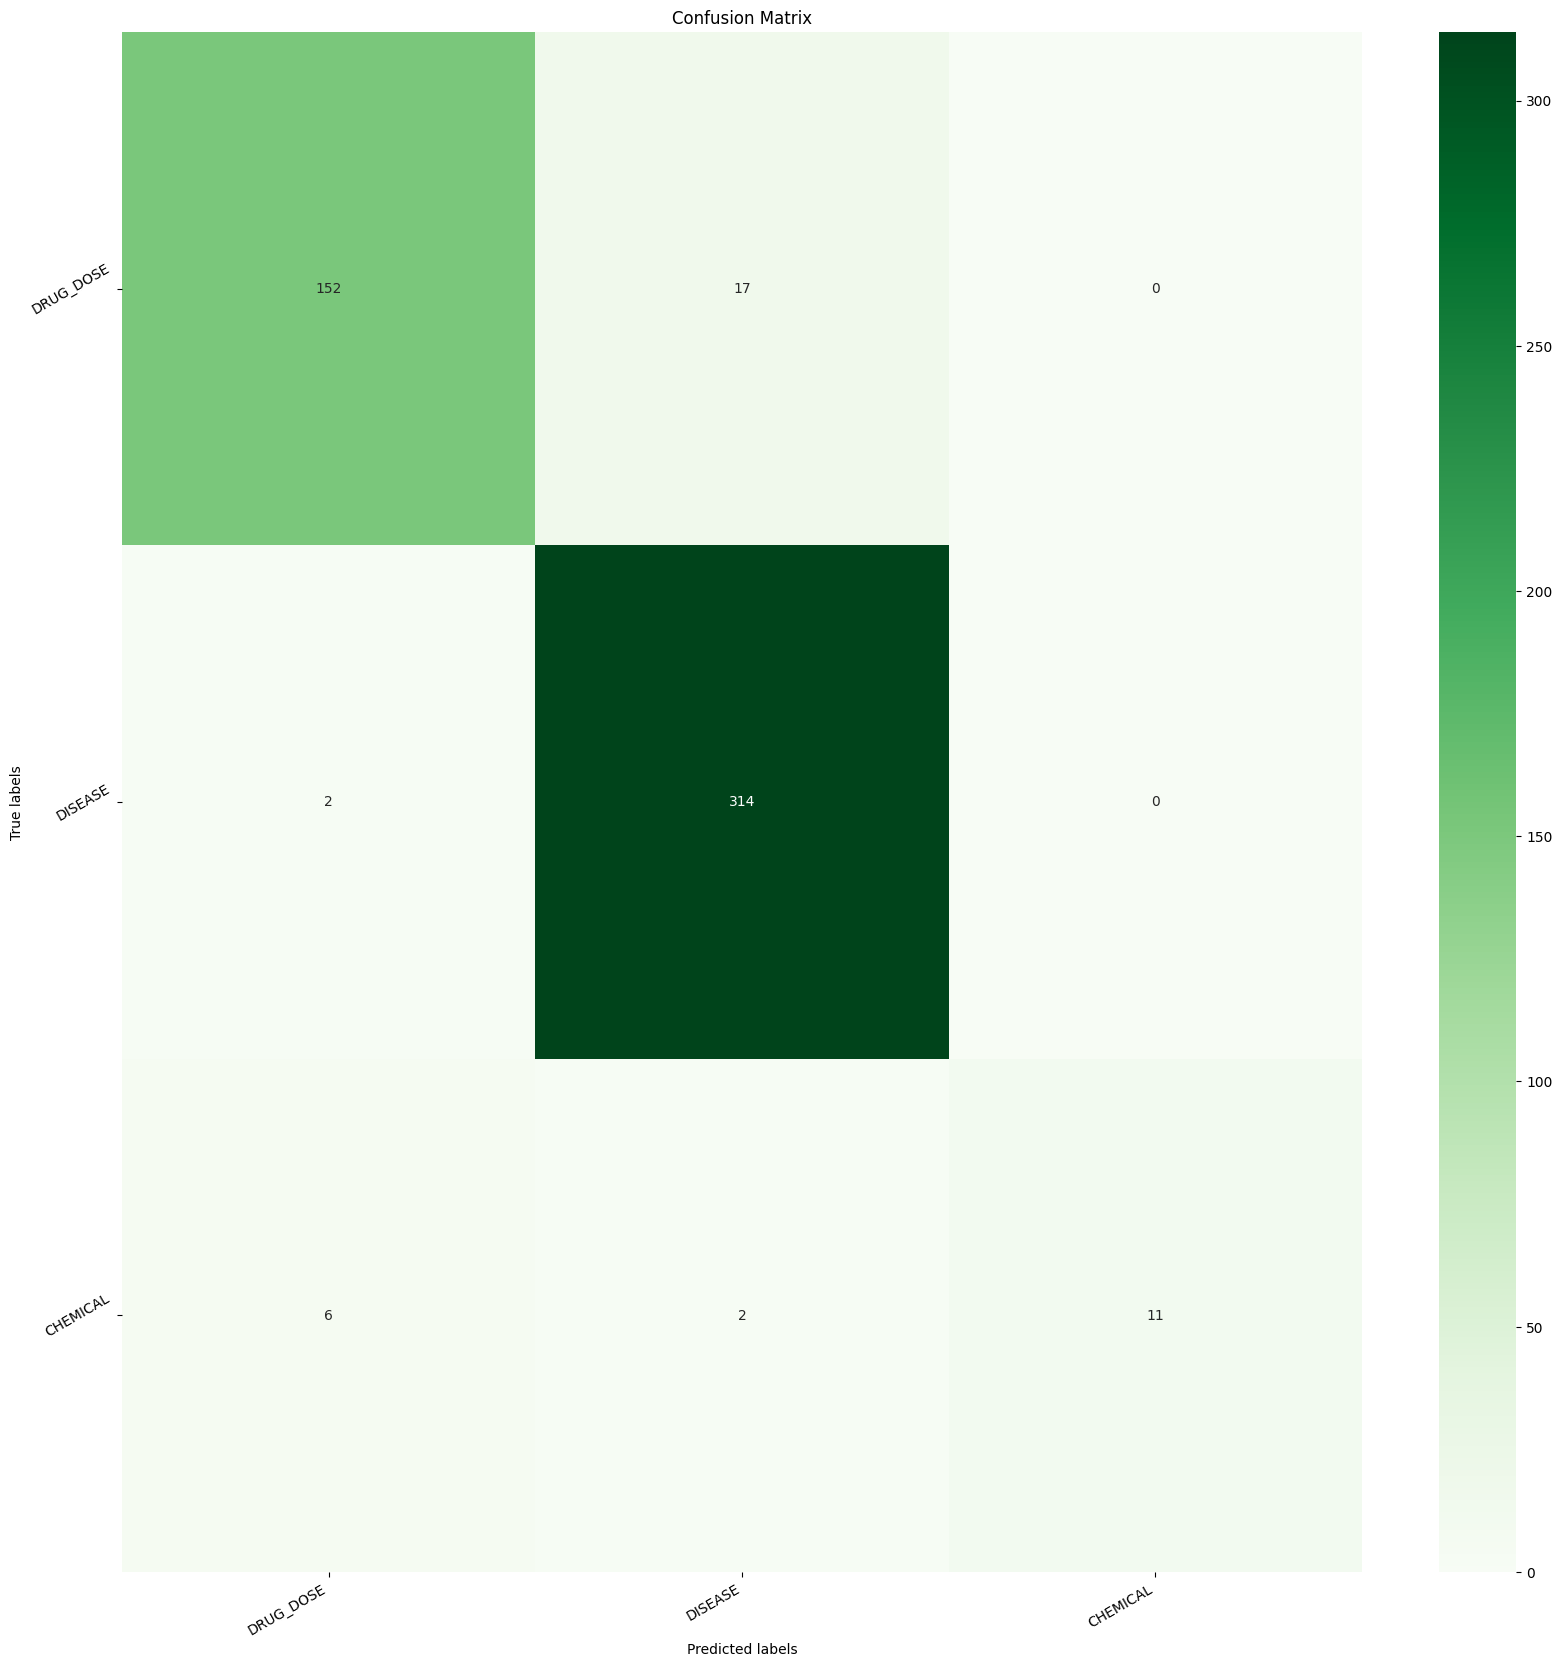

In [114]:
labels_cm_bow_lg_2 = category_list_bow_2
cm = confusion_matrix(y_test_bow_2, y_pred_lr_bow_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_lg_2); ax.yaxis.set_ticklabels(labels_cm_bow_lg_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>2. Random Forest</h5>

In [115]:
bow_rf_model_2 = RandomForestClassifier(random_state=1)
bow_rf_model_2.fit(X_train_bow_2, y_train_bow_2)
y_pred_rf_bow_2 = bow_rf_model_2.predict(X_test_bow_2)
print(classification_report(y_test_bow_2, y_pred_rf_bow_2))

accuracy_rf_bow_2 = accuracy_score(y_test_bow_2, y_pred_rf_bow_2)
print("Accuracy:", accuracy_rf_bow_2)

              precision    recall  f1-score   support

    CHEMICAL       0.94      0.98      0.96       169
     DISEASE       0.99      0.99      0.99       316
   DRUG_DOSE       1.00      0.53      0.69        19

    accuracy                           0.97       504
   macro avg       0.98      0.83      0.88       504
weighted avg       0.97      0.97      0.97       504

Accuracy: 0.9722222222222222


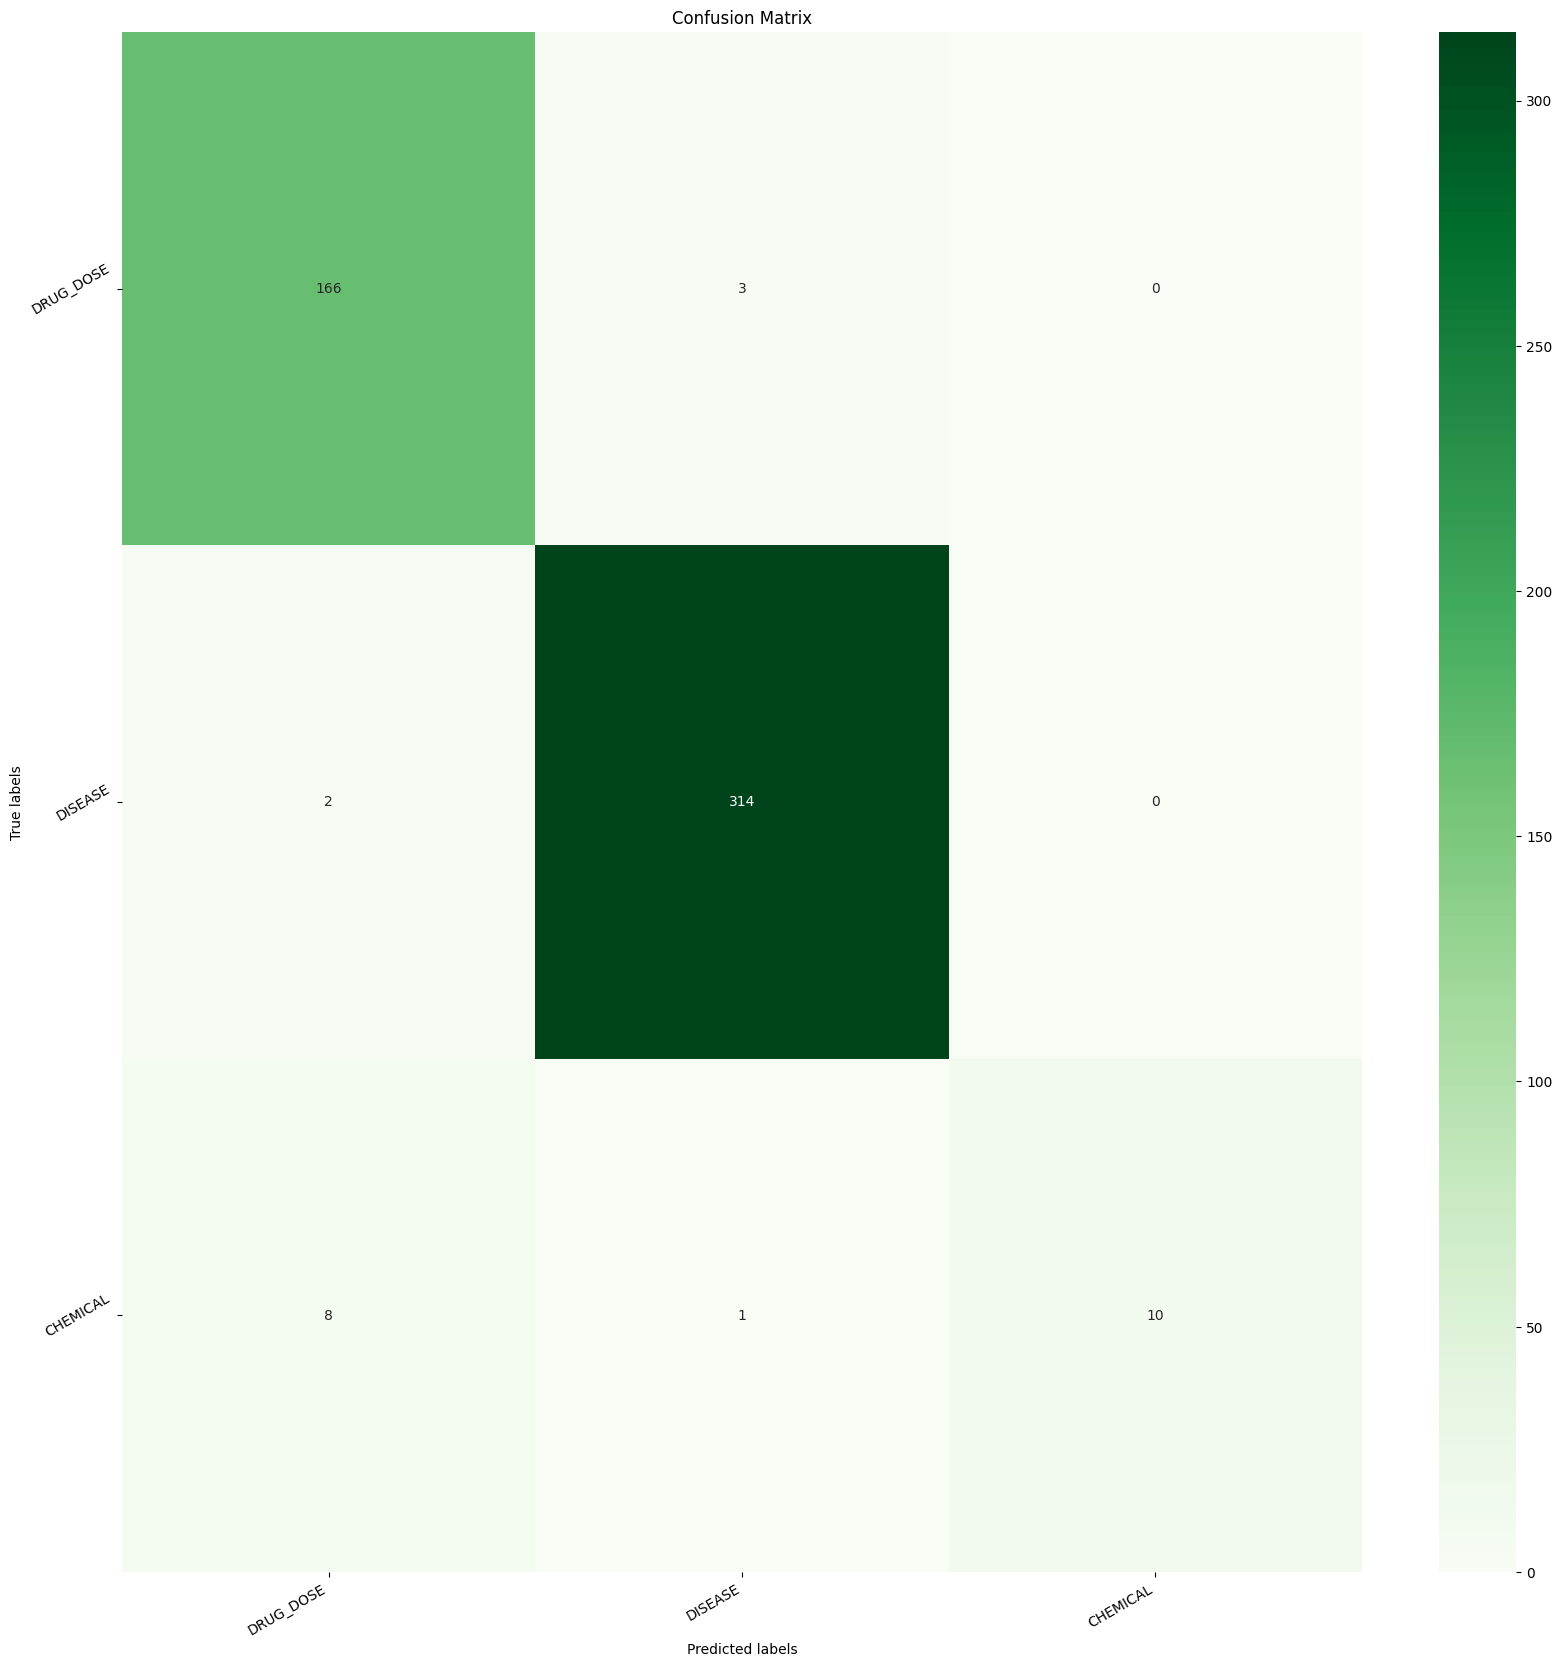

In [116]:
labels_cm_bow_rf_2 = category_list_bow_2
cm = confusion_matrix(y_test_bow_2, y_pred_rf_bow_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_rf_2); ax.yaxis.set_ticklabels(labels_cm_bow_rf_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>3. XGBoost</h5>

In [153]:
from sklearn.preprocessing import LabelEncoder

bow_xgb_model_2 = xgb.XGBClassifier(random_state=1)
label_encoder = LabelEncoder()

# Sınıf etiketlerini sayısal değerlere dönüştürme
y_train_encoded_2 = label_encoder.fit_transform(y_train_bow_2)
bow_xgb_model_2.fit(X_train_bow_2, y_train_encoded_2)

y_test_encoded_bow_2 = label_encoder.transform(y_test_bow_2)
y_pred_xgb_bow_2 = bow_xgb_model_2.predict(X_test_bow_2)

print(classification_report(y_test_encoded_bow_2, y_pred_xgb_bow_2))

accuracy_xgb_bow_2 = accuracy_score(y_test_encoded_bow_2, y_pred_xgb_bow_2)
print("Accuracy:", accuracy_xgb_bow_2)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       169
           1       0.99      1.00      1.00       316
           2       1.00      0.63      0.77        19

    accuracy                           0.98       504
   macro avg       0.98      0.87      0.91       504
weighted avg       0.98      0.98      0.98       504

Accuracy: 0.9801587301587301


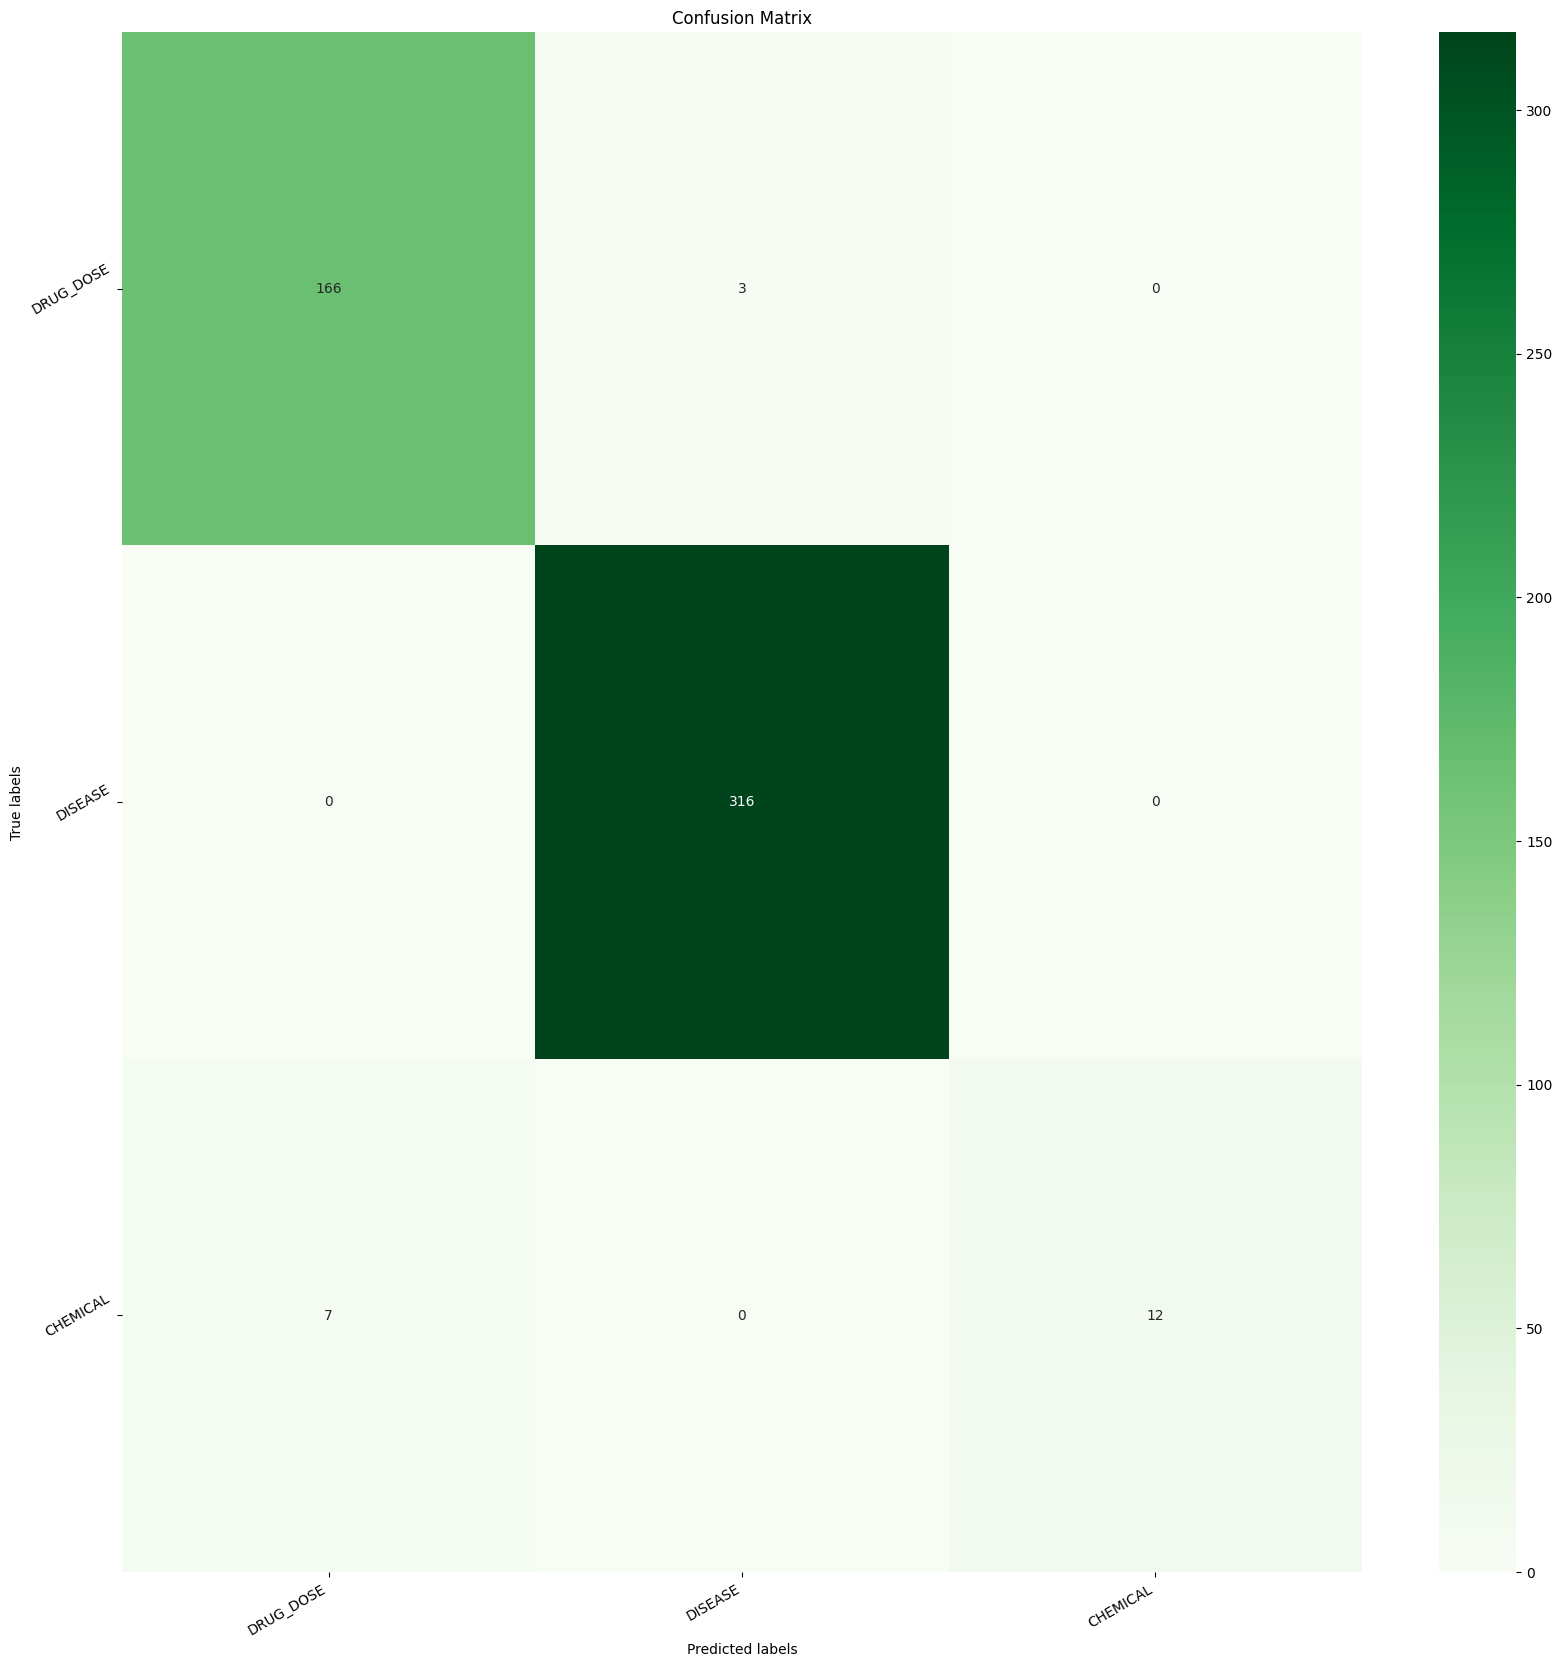

In [154]:
labels_cm_bow_xgb_2 = category_list_bow_2
cm = confusion_matrix(y_test_encoded_bow_2, y_pred_xgb_bow_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_xgb_2); ax.yaxis.set_ticklabels(labels_cm_bow_xgb_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>4. LightGBM:</h5>

In [119]:
bow_lgb_model_2 = lgb.LGBMClassifier(random_state=1)
bow_lgb_model_2.fit(X_train_bow_2, y_train_bow_2)
y_pred_lgb_bow_2 = bow_lgb_model_2.predict(X_test_bow_2)
print(classification_report(y_test_bow_2, y_pred_lgb_bow_2))

accuracy_lgb_bow_2 = accuracy_score(y_test_bow_2, y_pred_lgb_bow_2)
print("Accuracy:", accuracy_lgb_bow_2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64034
[LightGBM] [Info] Number of data points in the train set: 1511, number of used features: 252
[LightGBM] [Info] Start training from score -1.095969
[LightGBM] [Info] Start training from score -0.465118
[LightGBM] [Info] Start training from score -3.277476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

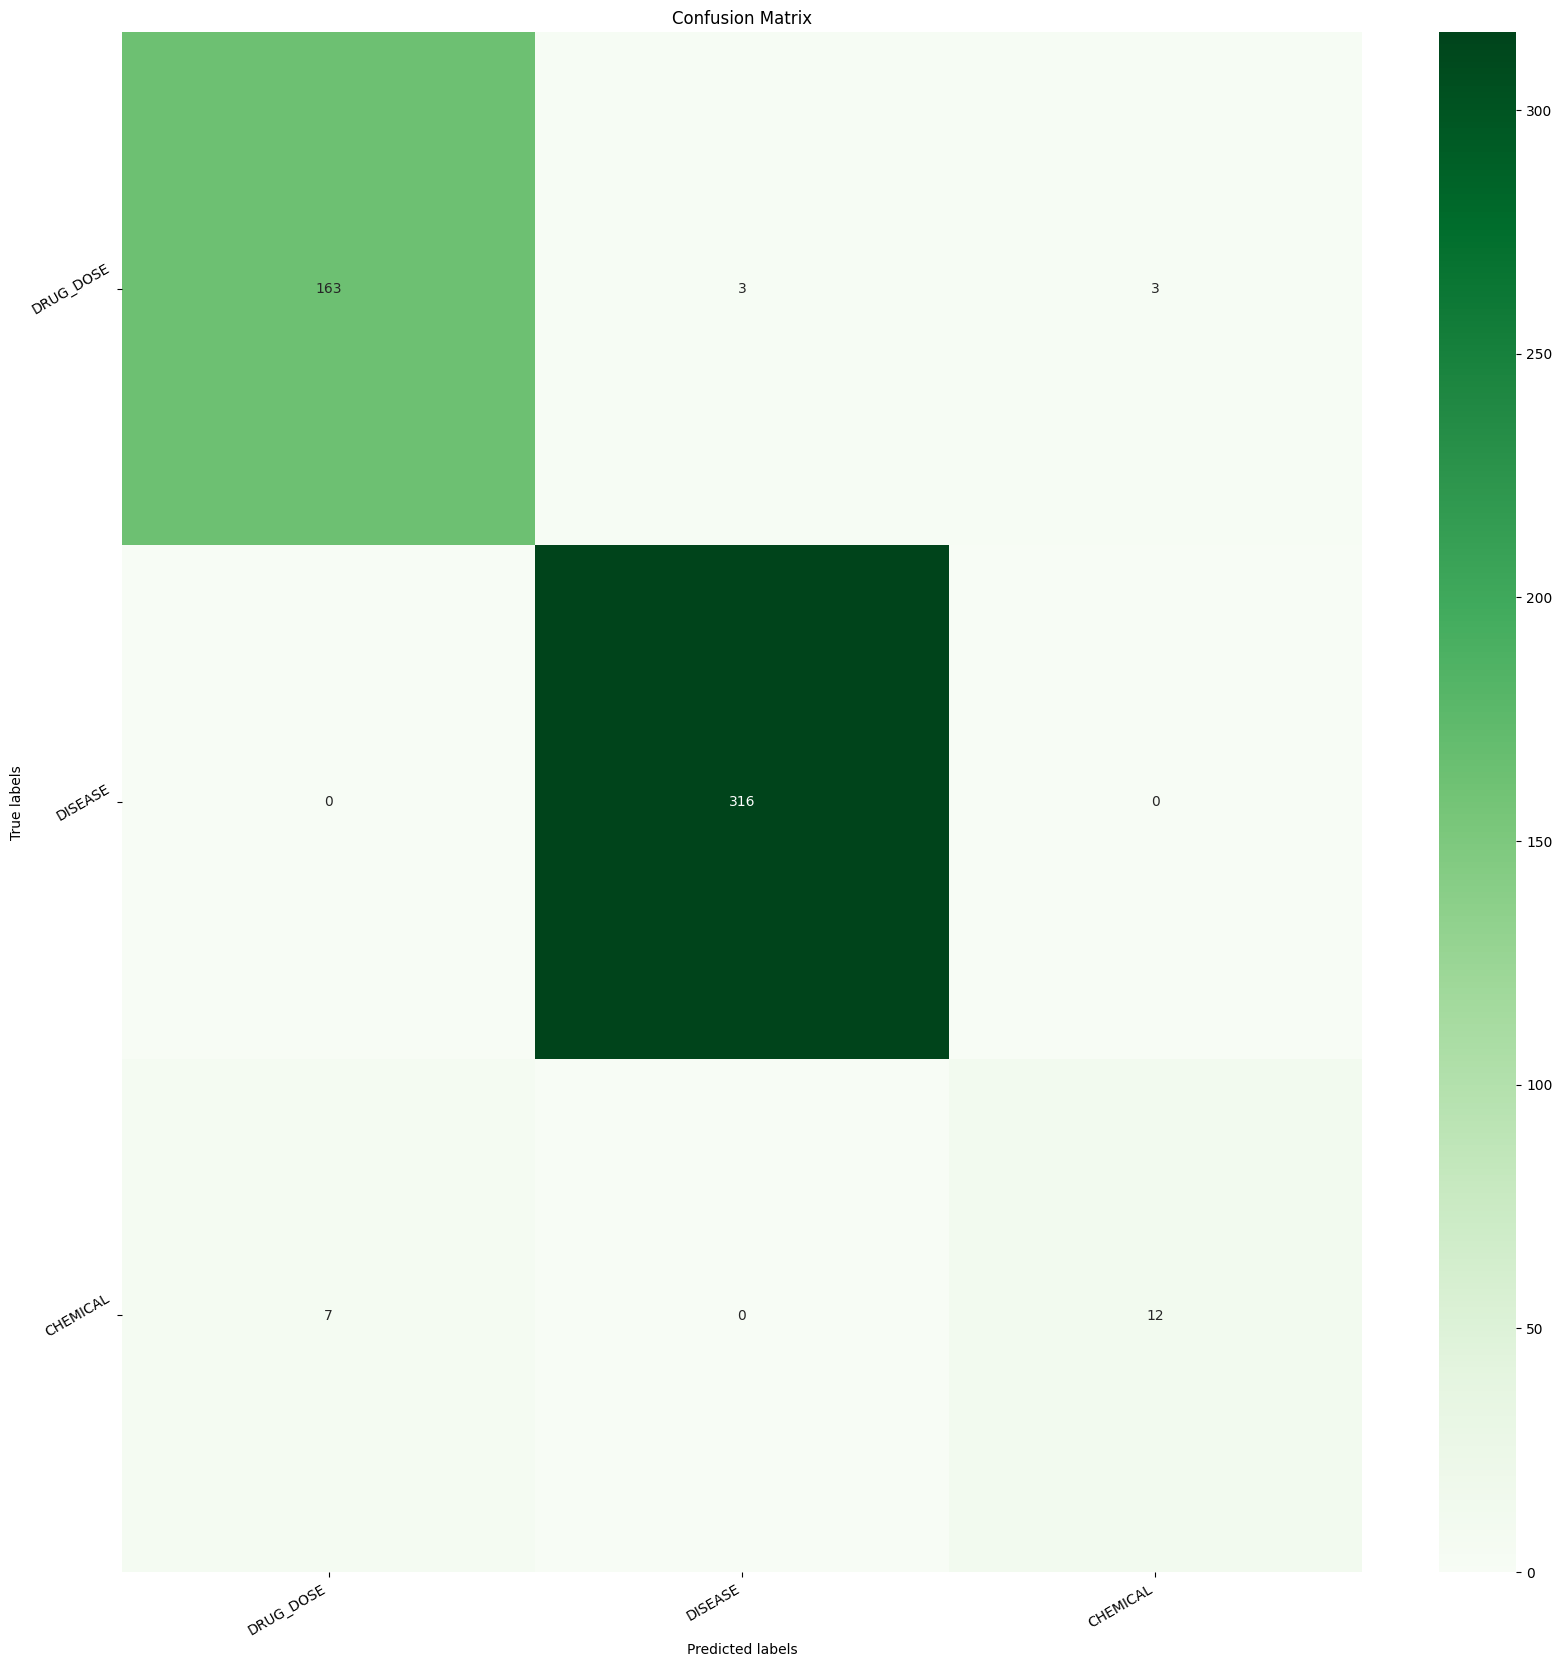

In [120]:
labels_cm_bow_lgbm_2 = category_list_bow_2
cm = confusion_matrix(y_test_bow_2, y_pred_lgb_bow_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_lgbm_2); ax.yaxis.set_ticklabels(labels_cm_bow_lgbm_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h5>5. Multinomial NB:</h5>

In [121]:
X_train_nb_bow_2, X_test_nb_bow_2, y_train_nb_bow_2, y_test_nb_bow_2 = train_test_split(bow_matrix_2.toarray(), labels_bow_2, stratify=labels_bow_2, random_state=1)

bow_nb_model_2 = MultinomialNB()
bow_nb_model_2.fit(X_train_nb_bow_2, y_train_nb_bow_2)
y_pred_nb_bow_2 = bow_nb_model_2.predict(X_test_nb_bow_2)
print(classification_report(y_test_nb_bow_2, y_pred_nb_bow_2, zero_division=1))

accuracy_nb_bow_2 = accuracy_score(y_test_nb_bow_2, y_pred_nb_bow_2)
print("Accuracy:", accuracy_nb_bow_2)

              precision    recall  f1-score   support

    CHEMICAL       0.88      0.96      0.92       169
     DISEASE       0.98      0.97      0.97       316
   DRUG_DOSE       0.83      0.26      0.40        19

    accuracy                           0.94       504
   macro avg       0.90      0.73      0.76       504
weighted avg       0.94      0.94      0.93       504

Accuracy: 0.9384920634920635


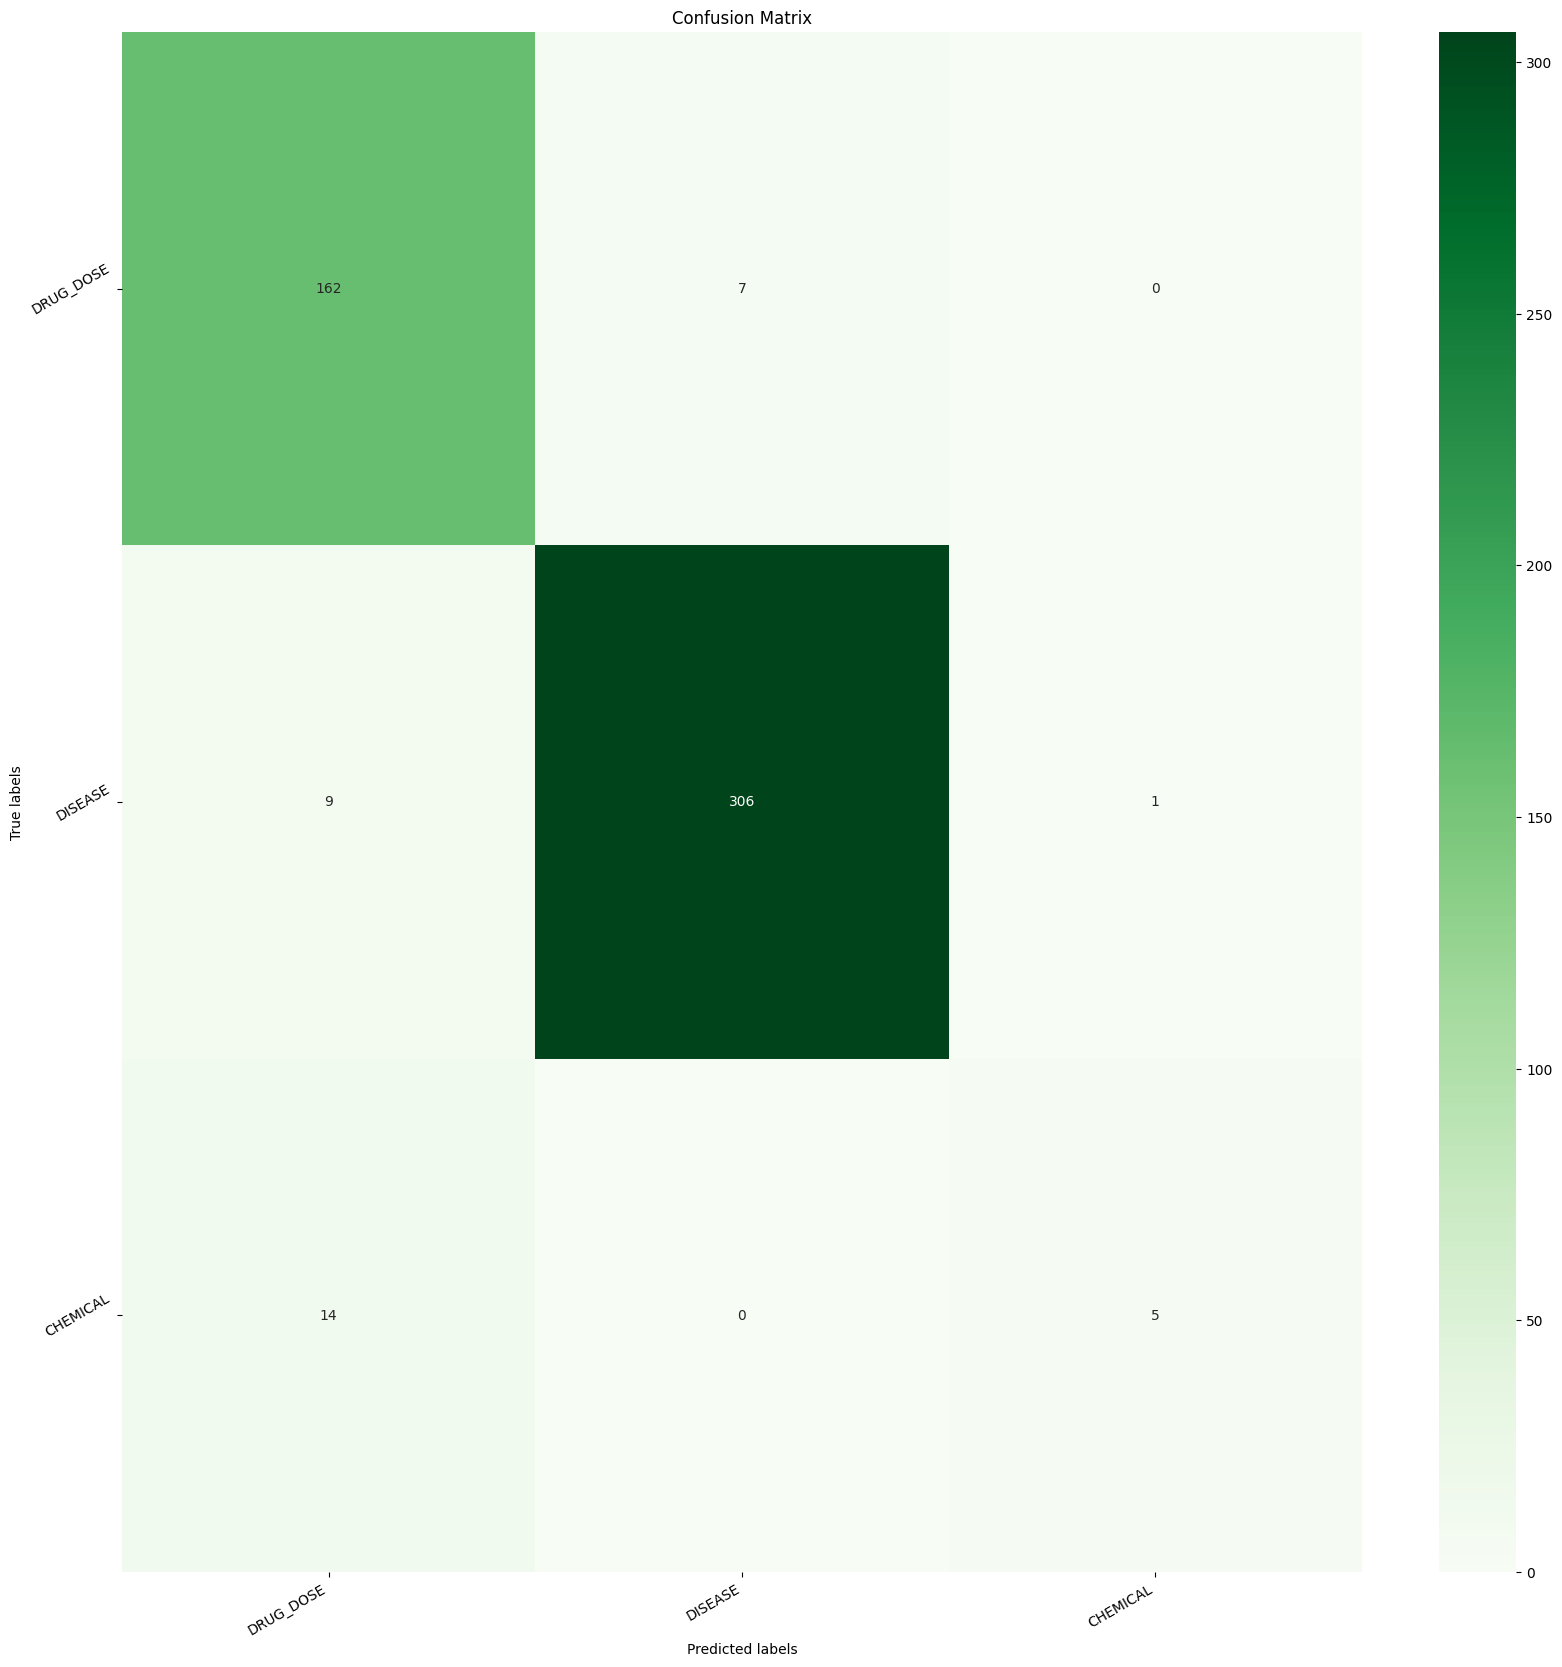

In [122]:
labels_cm_bow_nb_2 = category_list_bow_2
cm = confusion_matrix(y_test_nb_bow_2, y_pred_nb_bow_2)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_bow_nb_2); ax.yaxis.set_ticklabels(labels_cm_bow_nb_2);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h3>Phase-1 and Phase-2 Comparison</h3>

<h5>Phase-1</h5>

In [136]:
from IPython.display import display

# With TF-IDF
model_names = ['Ensemble Learning Model', 'LogisticRegression', 'Random Forest', 'XGBoost', 'LightGBM', 'Multinomial NB']

accuracy_values_tfIdf = [(accuracy_ensemble_tfIdf * 100), (accuracy_lr_tfIdf * 100),
                          (accuracy_rf_tfIdf * 100), (accuracy_xgb_tfIdf * 100),
                          (accuracy_lgb_tfIdf * 100), (accuracy_nb_tfIdf * 100)]

comparison_table_tfIdf = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_tfIdf
})

# With Bow
accuracy_values_bow = [(accuracy_ensemble_bow * 100), (accuracy_lr_bow * 100),
                        (accuracy_rf_bow * 100), (accuracy_xgb_bow * 100),
                        (accuracy_lgb_bow * 100), (accuracy_nb_bow * 100)]

comparison_table_bow = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_bow
})

comparison_table_phase_1 = pd.merge(comparison_table_tfIdf, comparison_table_bow, on='Model', suffixes=(' TF-IDF', ' BoW'))

display(comparison_table_phase_1)

Model  Accuracy TF-IDF  Accuracy BoW
0  Ensemble Learning Model        23.652174     37.130435
1       LogisticRegression        38.173913     27.217391
2            Random Forest        10.956522     10.782609
3                  XGBoost        12.000000     11.565217
4                 LightGBM        11.478261     11.478261
5           Multinomial NB        37.565217     33.739130

<h5>Phase-2</h5>

In [137]:
# With TF-IDF
model_names = ['Ensemble Learning Model', 'LogisticRegression', 'Random Forest', 'XGBoost', 'LightGBM', 'Multinomial NB']

accuracy_values_tfIdf_2 = [(accuracy_ensemble_tfIdf_2 * 100), (accuracy_lr_tfIdf_2 * 100),
                          (accuracy_rf_tfIdf_2 * 100), (accuracy_xgb_tfIdf_2 * 100),
                          (accuracy_lgb_tfIdf_2 * 100), (accuracy_nb_tfIdf_2 * 100)]

comparison_table_tfIdf_2 = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_tfIdf_2
})

# With BOW
accuracy_values_bow_2 = [(accuracy_ensemble_bow_2 * 100), (accuracy_lr_bow_2 * 100),
                        (accuracy_rf_bow_2 * 100), (accuracy_xgb_bow_2 * 100),
                        (accuracy_lgb_bow_2 * 100), (accuracy_nb_bow_2 * 100)]

comparison_table_bow_2 = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_bow_2
})

comparison_table_phase_2 = pd.merge(comparison_table_tfIdf_2, comparison_table_bow_2, on='Model', suffixes=(' TF-IDF', ' BoW'))

display(comparison_table_combined_2)

Model  Accuracy TF-IDF  Accuracy BoW
0  Ensemble Learning Model        62.698413     90.873016
1       LogisticRegression        95.238095     94.642857
2            Random Forest        97.222222     97.222222
3                  XGBoost        97.420635     98.015873
4                 LightGBM        97.420635     97.420635
5           Multinomial NB        94.047619     93.849206

In [138]:
comparison_table_combined = pd.merge(comparison_table_combined, comparison_table_combined_2, on='Model', suffixes=(' Phase 1', ' Phase 2'))
display(comparison_table_combined)

Model  Accuracy TF-IDF Phase 1  Accuracy BoW Phase 1  \
0  Ensemble Learning Model                23.652174             37.130435   
1       LogisticRegression                38.173913             27.217391   
2            Random Forest                10.956522             10.782609   
3                  XGBoost                12.000000             11.565217   
4                 LightGBM                11.478261             11.478261   
5           Multinomial NB                37.565217             33.739130   

   Accuracy TF-IDF Phase 2  Accuracy BoW Phase 2  
0                62.698413             90.873016  
1                95.238095             94.642857  
2                97.222222             97.222222  
3                97.420635             98.015873  
4                97.420635             97.420635  
5                94.047619             93.849206

In [143]:
# Finding the best model in Phase 1
best_model_phase1 = comparison_table_combined_final.loc[comparison_table_combined_final['Accuracy TF-IDF Phase 1'].idxmax(), 'Model']
best_accuracy_phase1 = comparison_table_combined_final['Accuracy TF-IDF Phase 1'].max()

best_model_phase1_bow = comparison_table_combined_final.loc[comparison_table_combined_final['Accuracy BoW Phase 1'].idxmax(), 'Model']
best_accuracy_phase1_bow = comparison_table_combined_final['Accuracy BoW Phase 1'].max()

# Finding the best model in Phase 2
best_model_phase2 = comparison_table_combined_final.loc[comparison_table_combined_final['Accuracy TF-IDF Phase 2'].idxmax(), 'Model']
best_accuracy_phase2 = comparison_table_combined_final['Accuracy TF-IDF Phase 2'].max()

best_model_phase2_bow = comparison_table_combined_final.loc[comparison_table_combined_final['Accuracy BoW Phase 2'].idxmax(), 'Model']
best_accuracy_phase2_bow = comparison_table_combined_final['Accuracy BoW Phase 2'].max()

# Printing the model with the highest accuracy and its phase information
if best_accuracy_phase1 > best_accuracy_phase1_bow and best_accuracy_phase1 > best_accuracy_phase2 and best_accuracy_phase1 > best_accuracy_phase2_bow:
    print(f"The model with the highest TF-IDF accuracy: {best_model_phase1}, Phase: 1, Accuracy: {best_accuracy_phase1}%")
elif best_accuracy_phase1_bow > best_accuracy_phase1 and best_accuracy_phase1_bow > best_accuracy_phase2 and best_accuracy_phase1_bow > best_accuracy_phase2_bow:
    print(f"The model with the highest BoW accuracy: {best_model_phase1_bow}, Phase: 1, Accuracy: {best_accuracy_phase1_bow}%")
elif best_accuracy_phase2 > best_accuracy_phase1 and best_accuracy_phase2 > best_accuracy_phase1_bow and best_accuracy_phase2 > best_accuracy_phase2_bow:
    print(f"The model with the highest TF-IDF accuracy: {best_model_phase2}, Phase: 2, Accuracy: {best_accuracy_phase2}%")
else:
    print(f"The model with the highest BoW accuracy: {best_model_phase2_bow}, Phase: 2, Accuracy: {best_accuracy_phase2_bow}%")


The model with the highest BoW accuracy: XGBoost, Phase: 2, Accuracy: 98.01587301587301%


<h2>Phase 3 (Third Paragraph)</h2>

In [171]:
smote_over_sample = SMOTE(sampling_strategy='minority')

labels_smote = ner_model_df['ner_category_label'].tolist()
X, y = smote_over_sample.fit_resample(bow_reduced_2, labels_smote)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)   
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(2403, 252)
Test_Set_Size:(801, 252)


In [172]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded_smote = label_encoder.fit_transform(y_train)
y_test_encoded_smote = label_encoder.transform(y_test)

# Train
xgb_model_smote = xgb.XGBClassifier()
xgb_model_smote.fit(X_train, y_train_encoded_smote)

# Predict
y_pred_smote = xgb_model.predict(X_test)

accuracy_xgb_smote = accuracy_score(y_test_encoded_smote, y_pred_smote)
print("Accuracy:", accuracy_xgb_smote)

Accuracy: 0.9850187265917603


In [173]:
print(classification_report(y_test_encoded_smote, y_pred_smote, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       169
           1       0.99      1.00      1.00       316
           2       0.98      0.99      0.99       316

    accuracy                           0.99       801
   macro avg       0.98      0.98      0.98       801
weighted avg       0.98      0.99      0.98       801



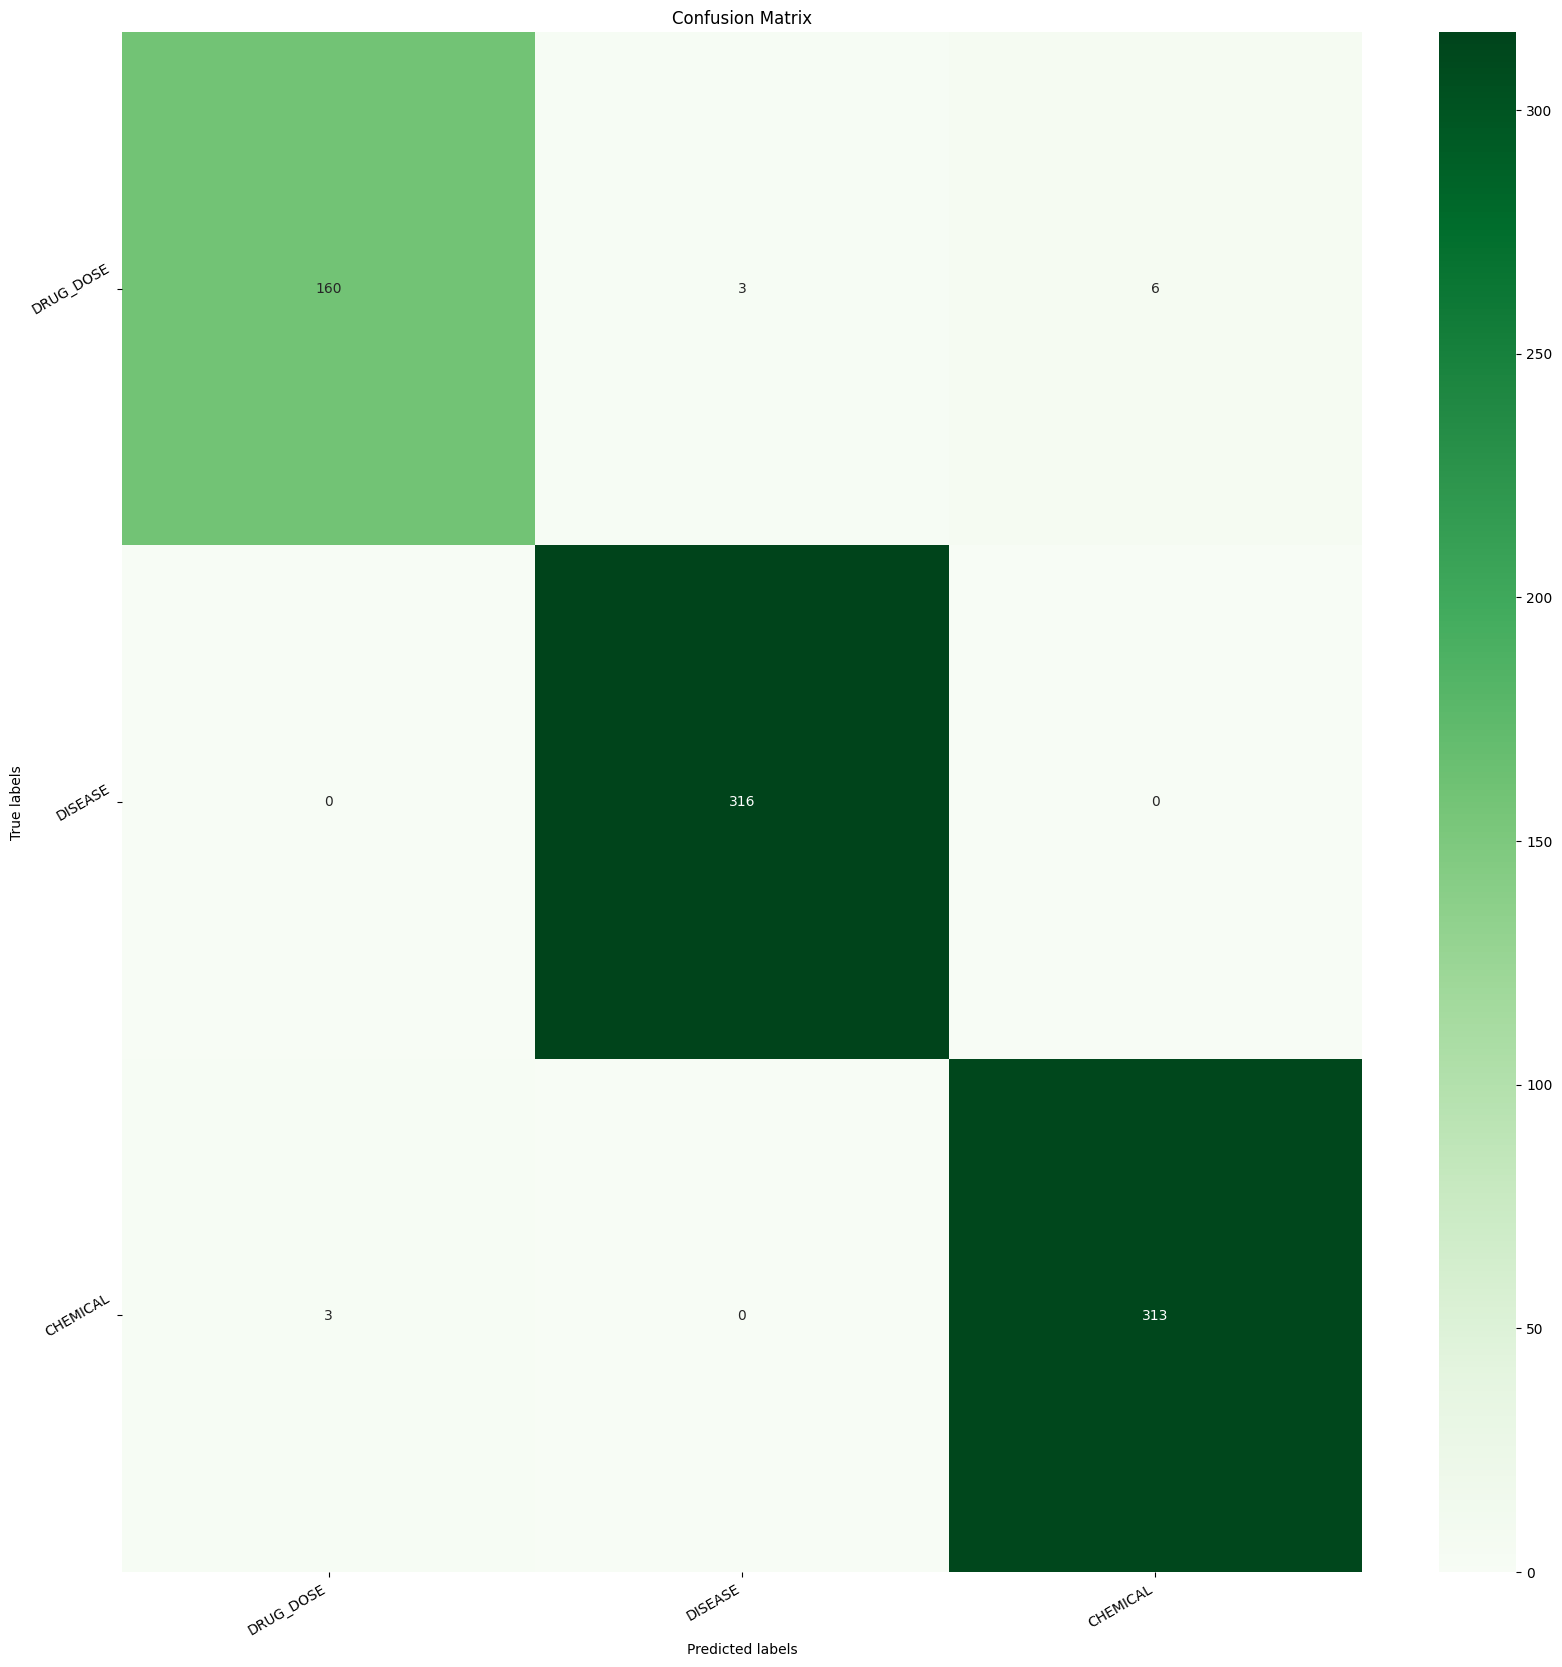

In [176]:
labels_cm_smote = category_list_bow_2
cm = confusion_matrix(y_test_encoded_smote, y_pred_smote)
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels_cm_smote); ax.yaxis.set_ticklabels(labels_cm_smote);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

<h3>Comparison for Phase 3</h3>

In [175]:
models_names_final = ['BoW XGBoost Phase 2', 'Bow XGBoost with SMOTE']
accuracy_values_final = [(accuracy_xgb_bow_2 * 100), (accuracy_xgb_smote * 100)]

comparison_table_final = pd.DataFrame({
    'Model': models_names_final,
    'Accuracy': accuracy_values_final
})

display(comparison_table_final)

Model   Accuracy
0     BoW XGBoost Phase 2  98.015873
1  Bow XGBoost with SMOTE  98.501873

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision_xgb_bow_2 = precision_score(y_test_encoded_bow_2, y_pred_xgb_bow_2, average='weighted')
recall_xgb_bow_2= recall_score(y_test_encoded_bow_2, y_pred_xgb_bow_2, average='weighted')
f1_xgb_bow_2 = f1_score(y_test_encoded_bow_2, y_pred_xgb_bow_2, average='weighted')


precision_xgb_smote = precision_score(y_test_encoded_smote, y_pred_smote, average='weighted')
recall_xgb_smote = recall_score(y_test_encoded_smote, y_pred_smote, average='weighted')
f1_xgb_smote = f1_score(y_test_encoded_smote, y_pred_smote, average='weighted')


metrics_1 = {
    "Accuracy": accuracy_xgb_bow_2 * 100,
    "Precision": precision_xgb_bow_2 * 100,
    "Recall": recall_xgb_bow_2 * 100,
    "F1 Score": f1_xgb_bow_2 * 100
}

metrics_2 = {
    "Accuracy": accuracy_xgb_smote * 100,
    "Precision": precision_xgb_smote * 100,
    "Recall": recall_xgb_smote * 100,
    "F1 Score": f1_xgb_smote * 100
}

df_result_table = pd.DataFrame([metrics_1, metrics_2], 
                          index=['BoW XGBoost Phase 2', 'BoW XGBoost with SMOTE'])
display(df_result_table)

Accuracy  Precision     Recall   F1 Score
BoW XGBoost Phase 2     98.015873  98.053584  98.015873  97.872072
BoW XGBoost with SMOTE  98.501873  98.498653  98.501873  98.491874